# Task5: Homography + RANSAC

In [29]:
import numpy as np
import scipy.linalg as linalg
import cv2
from PIL import Image
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import yaml
import cv2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

First of all, read im01 and im02, then find all the SIFT keypoints and descriptors:

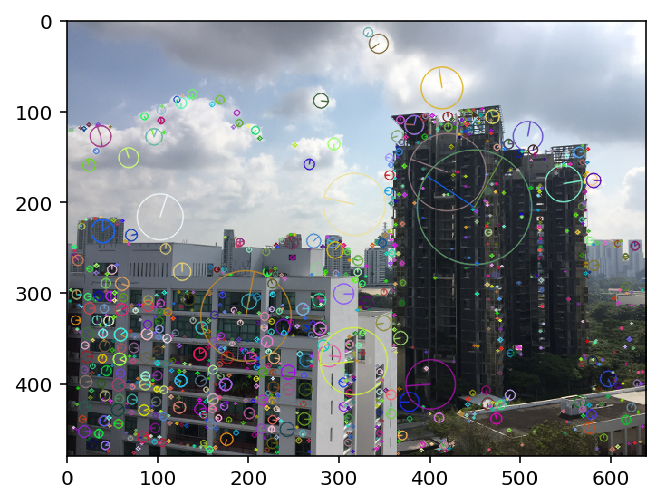

In [30]:
img1 = cv2.imread('im01.jpg')
img2 = cv2.imread('im02.jpg')
siftCreater = cv2.SIFT_create()

kps1, des1 = siftCreater.detectAndCompute(img1, None)
kps2, des2 = siftCreater.detectAndCompute(img2, None)

newImage1 = cv2.drawKeypoints(image=img1, keypoints=kps1, outImage=img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
newImage2 = cv2.drawKeypoints(image=img2, keypoints=kps2, outImage=img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(newImage1,cv2.COLOR_BGR2RGB), interpolation='none')
plt.imshow(cv2.cvtColor(newImage2,cv2.COLOR_BGR2RGB), interpolation='none')
plt.show()

Secondly, find all the matches based on SIFT keypoints and descriptors. The matches are found based on the 2-norm distance between members of kps1 and kps2.

In [31]:
# for each kp in kp1 of img1, find the match in kps2 of img2:
kpNum1 = des1.shape[0]
kpNum2 = des2.shape[0]
# print(kpNum1, kpNum2)

matches = np.zeros((kpNum1,5))
for i in range(0,kpNum1):
    minDist = np.linalg.norm(des1[i] - des2[0])
    matches[i][0] = kps1[i].pt[0]
    matches[i][1] = kps1[i].pt[1]
    matches[i][2] = kps2[0].pt[0]
    matches[i][3] = kps2[0].pt[1]
    matches[i][4] = minDist
    for j in range(1, kpNum2):
        newDist = np.linalg.norm(des1[i] - des2[j])
        if newDist < minDist:
            minDist = newDist
            matches[i][0] = kps1[i].pt[0]
            matches[i][1] = kps1[i].pt[1]
            matches[i][2] = kps2[j].pt[0]
            matches[i][3] = kps2[j].pt[1]
            matches[i][4] = minDist
print(matches)

[[  4.88361168 275.98434448  10.17795277 301.40032959 369.75396729]
 [  4.88361168 275.98434448  10.17795277 301.40032959 347.13973999]
 [  5.263659   464.07284546 360.88778687 340.03869629 135.13696289]
 ...
 [630.88708496 276.57781982 523.11322021 296.19488525 231.5987854 ]
 [630.88708496 276.57781982 584.45446777 471.37057495 261.6619873 ]
 [630.88708496 276.57781982 478.503479   422.78536987 315.93035889]]


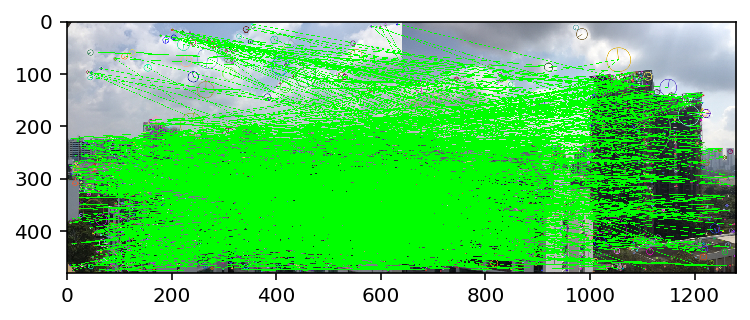

In [32]:
# prepare a new canvas
imgSizeY1 = img1.shape[0]
imgSizeX1 = img1.shape[1]
imgSizeY2 = img2.shape[0]
imgSizeX2 = img2.shape[1]
newImg = np.zeros((max(imgSizeY1, imgSizeY2), (imgSizeX1 + imgSizeX2), 3), dtype="uint8")
# paste the two images on the new canvas
newImg[0:imgSizeY1, 0:imgSizeX1] = img1
newImg[0:imgSizeY2, imgSizeX1:] = img2

for i in range(0, kpNum1):
    pt1 = (int(matches[i][0]), int(matches[i][1]))
    pt2 = ( (int(matches[i][2]) + imgSizeX1), int(matches[i][3]))
    cv2.line(newImg, pt1, pt2, (0, 255, 0), 1)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB), interpolation='none')
plt.show()

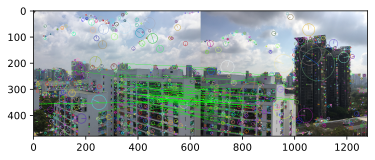

In [41]:
# Set a threshold = 100 to reduce the matches:
thres = 100
# prepare a new canvas
imgSizeY1 = img1.shape[0]
imgSizeX1 = img1.shape[1]
imgSizeY2 = img2.shape[0]
imgSizeX2 = img2.shape[1]
newImg = np.zeros((max(imgSizeY1, imgSizeY2), (imgSizeX1 + imgSizeX2), 3), dtype="uint8")
# paste the two images on the new canvas
newImg[0:imgSizeY1, 0:imgSizeX1] = img1
newImg[0:imgSizeY2, imgSizeX1:] = img2

for i in range(0, kpNum1):
    if(matches[i][4] <= thres):
        pt1 = (int(matches[i][0]), int(matches[i][1]))
        pt2 = ( (int(matches[i][2]) + imgSizeX1), int(matches[i][3]))
        cv2.line(newImg, pt1, pt2, (0, 255, 0), 1)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB), interpolation='none')
plt.show()

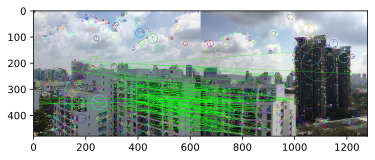

In [42]:
# Set a threshold = 120 to reduce the matches:
thres = 120
# prepare a new canvas
imgSizeY1 = img1.shape[0]
imgSizeX1 = img1.shape[1]
imgSizeY2 = img2.shape[0]
imgSizeX2 = img2.shape[1]
newImg = np.zeros((max(imgSizeY1, imgSizeY2), (imgSizeX1 + imgSizeX2), 3), dtype="uint8")
# paste the two images on the new canvas
newImg[0:imgSizeY1, 0:imgSizeX1] = img1
newImg[0:imgSizeY2, imgSizeX1:] = img2

for i in range(0, kpNum1):
    if(matches[i][4] <= thres):
        pt1 = (int(matches[i][0]), int(matches[i][1]))
        pt2 = ( (int(matches[i][2]) + imgSizeX1), int(matches[i][3]))
        cv2.line(newImg, pt1, pt2, (0, 255, 0), 1)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB), interpolation='none')
plt.show()

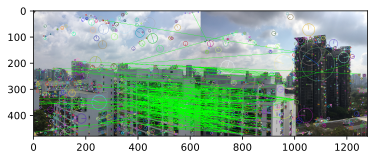

In [43]:
# Set a threshold = 150 to reduce the matches:
thres = 150
# prepare a new canvas
imgSizeY1 = img1.shape[0]
imgSizeX1 = img1.shape[1]
imgSizeY2 = img2.shape[0]
imgSizeX2 = img2.shape[1]
newImg = np.zeros((max(imgSizeY1, imgSizeY2), (imgSizeX1 + imgSizeX2), 3), dtype="uint8")
# paste the two images on the new canvas
newImg[0:imgSizeY1, 0:imgSizeX1] = img1
newImg[0:imgSizeY2, imgSizeX1:] = img2

for i in range(0, kpNum1):
    if(matches[i][4] <= thres):
        pt1 = (int(matches[i][0]), int(matches[i][1]))
        pt2 = ( (int(matches[i][2]) + imgSizeX1), int(matches[i][3]))
        cv2.line(newImg, pt1, pt2, (0, 255, 0), 1)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB), interpolation='none')
plt.show()

Now use RANSAC to computer the best homography. Two parameters to be set: the number of iterations T, and the parameter for inliner $\epsilon$

In [62]:
import random
def selectRandomMatches(matches):
    matchesSize = matches.shape[0]
    r0, r1, r2, r3, r4 = random.sample(range(0, matchesSize), 5)
    print(matches[r0], matches[r1], matches[r2], matches[r3], matches[r4])
    return matches[r0], matches[r1], matches[r2], matches[r3], matches[r4]

In [59]:
# Testing block:
selectRandomMatches(matches)

(array([323.19491577, 276.2361145 ,  22.41537476, 303.824646  ,
        182.18397522]),
 array([113.87405396, 343.83181763, 221.19197083, 458.41522217,
        218.70527649]),
 array([323.03878784, 322.05075073,  59.81142426, 360.34390259,
        245.03469849]),
 array([375.8538208 , 406.94235229,  86.17333221, 391.17172241,
        141.89785767]),
 array([150.51960754, 430.2767334 , 200.76132202, 432.32223511,
        344.66796875]))

In [56]:
def getHomography(x1, x2, x3, x4, x5, y1, y2, y3, y4, y5):
    print(x1, x2, x3, x4, x5, y1, y2, y3, y4, y5)
    A = np.array([[x1[0],x1[1],1, 0,0,0, -x1[0]*y1[0],-x1[1]*y1[0],-y1[0]],
                  [0,0,0, x1[0],x1[1],1, -x1[0]*y1[1],-x1[1]*y1[1],-y1[1]],
                  [x2[0],x2[1],1, 0,0,0, -x2[0]*y2[0],-x2[1]*y2[0],-y2[0]],
                  [0,0,0, x2[0],x2[1],1, -x2[0]*y2[1],-x2[1]*y2[1],-y2[1]],
                  [x3[0],x3[1],1, 0,0,0, -x3[0]*y3[0],-x3[1]*y3[0],-y3[0]],
                  [0,0,0, x3[0],x3[1],1, -x3[0]*y3[1],-x3[1]*y3[1],-y3[1]],
                  [x4[0],x4[1],1, 0,0,0, -x4[0]*y4[0],-x4[1]*y4[0],-y4[0]],
                  [0,0,0, x4[0],x4[1],1, -x4[0]*y4[1],-x4[1]*y4[1],-y4[1]],
                  [x5[0],x5[1],1, 0,0,0, -x5[0]*y5[0],-x5[1]*y5[0],-y5[0]],
                  [0,0,0, x5[0],x5[1],1, -x5[0]*y5[1],-x5[1]*y5[1],-y5[1]]])
#     print(A)
    U, D, Vt = linalg.svd(A)
    H = Vt[-1].reshape(3,3)
#     print(H)
    
    return H

In [65]:
def getRandomHomography():
    match1, match2, match3, match4, match5 = selectRandomMatches(matches)
    x1 = match1[0:2]
    y1 = match1[2:4]
    x2 = match2[0:2]
    y2 = match2[2:4]
    x3 = match3[0:2]
    y3 = match3[2:4]
    x4 = match4[0:2]
    y4 = match4[2:4]
    x5 = match5[0:2]
    y5 = match5[2:4]
    print(x1, x2, x3, x4, x5, y1, y2, y3, y4, y5)
    return getHomography(x1, x2, x3, x4, x5, y1, y2, y3, y4, y5)

In [66]:
# testing block:
getRandomHomography()

[552.04083252 361.97644043 234.32876587 377.38772583 116.68333435] [529.9699707  105.90644073 243.28213501 236.9577179  361.68218994] [428.70214844 365.65222168 176.60490417 370.86804199 320.29986572] [440.29418945 468.08151245 226.14585876 289.33828735 344.3399353 ] [127.49025726 233.7412262  547.40289307 179.01026917 240.24571228]
[552.04083252 361.97644043] [529.9699707  105.90644073] [428.70214844 365.65222168] [440.29418945 468.08151245] [127.49025726 233.7412262 ] [234.32876587 377.38772583] [243.28213501 236.9577179 ] [176.60490417 370.86804199] [226.14585876 289.33828735] [547.40289307 179.01026917]
[552.04083252 361.97644043] [529.9699707  105.90644073] [428.70214844 365.65222168] [440.29418945 468.08151245] [234.32876587 377.38772583] [243.28213501 236.9577179 ] [176.60490417 370.86804199] [226.14585876 289.33828735]


array([[ 1.06869933e-04,  2.26658282e-03, -7.88136596e-01],
       [-2.18583676e-04,  2.41646091e-03, -6.15486311e-01],
       [-9.14164708e-07,  9.28450081e-06, -2.50406814e-03]])

In [81]:
# Set epsilon to be
def computeTransformation(H, kps1, kps2):
    epsilon = 12
    inliners = []
    for i in range(0, kpNum1):
        pt1 = np.array([matches[i][0], matches[i][1], 1])
        transformedPt1 = H.dot(pt1)
        transformedPt1 = transformedPt1/transformedPt1[2]

        pt2 = np.array([matches[i][2], matches[i][3], 1])

        dist = np.linalg.norm(transformedPt1 - pt2)
        if dist <= epsilon:
            inliners.append([pt1, pt2])
    print(inliners)
    return inliners

In [84]:
# Testing block:
H = getRandomHomography()
computeTransformation(H, kps1, kps2)

[ 73.91537476 449.51306152 330.36047363 270.04000854 295.44204712] [375.13912964 279.70944214  89.2381134  307.37417603  96.69022369] [340.11016846 418.49325562  40.06131744 440.79824829 237.15817261] [268.74395752 273.15319824 220.64633179 272.45236206 366.2539978 ] [227.1759491   75.57648468 464.89047241 339.15072632 304.43884277]
[ 73.91537476 449.51306152] [375.13912964 279.70944214] [340.11016846 418.49325562] [268.74395752 273.15319824] [227.1759491   75.57648468] [330.36047363 270.04000854] [ 89.2381134  307.37417603] [ 40.06131744 440.79824829] [220.64633179 272.45236206] [464.89047241 339.15072632]
[ 73.91537476 449.51306152] [375.13912964 279.70944214] [340.11016846 418.49325562] [268.74395752 273.15319824] [330.36047363 270.04000854] [ 89.2381134  307.37417603] [ 40.06131744 440.79824829] [220.64633179 272.45236206]
[[array([ 73.91537476, 449.51306152,   1.        ]), array([330.36047363, 270.04000854,   1.        ])], [array([ 81.1962738 , 409.89596558,   1.        ]), arra

[[array([ 73.91537476, 449.51306152,   1.        ]),
  array([330.36047363, 270.04000854,   1.        ])],
 [array([ 81.1962738 , 409.89596558,   1.        ]),
  array([329.19952393, 281.32525635,   1.        ])],
 [array([139.65216064, 252.86549377,   1.        ]),
  array([359.01773071, 296.73382568,   1.        ])],
 [array([142.15673828, 285.58947754,   1.        ]),
  array([361.83209229, 289.71542358,   1.        ])]]

In [103]:
def getHomographyOfRandomSize(points):
    print(points)
    length = len(points)
    A = np.zeros((length, 9))
    
    i=0
    while i< (length-1):
        A[i][0:3] = np.array([points[i][0]])
        A[i][6:9] = np.array([-points[i][0][0]*points[i][1][0], -points[i][0][1]*points[i][1][0], -points[i][1][0]])
        A[i+1][3:6] = np.array([points[i+1][0]])
        A[i+1][6:9] = np.array([-points[i+1][0][0]*points[i+1][1][1], -points[i+1][0][1]*points[i+1][1][1], -points[i+1][1][1]])
        i+=2
#     A = np.array([[x1[0],x1[1],1, 0,0,0, -x1[0]*y1[0],-x1[1]*y1[0],-y1[0]],
#                   [0,0,0, x1[0],x1[1],1, -x1[0]*y1[1],-x1[1]*y1[1],-y1[1]],
#                   [x2[0],x2[1],1, 0,0,0, -x2[0]*y2[0],-x2[1]*y2[0],-y2[0]],
#                   [0,0,0, x2[0],x2[1],1, -x2[0]*y2[1],-x2[1]*y2[1],-y2[1]],
#                   [x3[0],x3[1],1, 0,0,0, -x3[0]*y3[0],-x3[1]*y3[0],-y3[0]],
#                   [0,0,0, x3[0],x3[1],1, -x3[0]*y3[1],-x3[1]*y3[1],-y3[1]],
#                   [x4[0],x4[1],1, 0,0,0, -x4[0]*y4[0],-x4[1]*y4[0],-y4[0]],
#                   [0,0,0, x4[0],x4[1],1, -x4[0]*y4[1],-x4[1]*y4[1],-y4[1]],
#                   [x5[0],x5[1],1, 0,0,0, -x5[0]*y5[0],-x5[1]*y5[0],-y5[0]],
#                   [0,0,0, x5[0],x5[1],1, -x5[0]*y5[1],-x5[1]*y5[1],-y5[1]]])
#     print(A)
    U, D, Vt = linalg.svd(A)
    H = Vt[-1].reshape(3,3)
#     print(H)
    
    return H

In [114]:
def ransac():
    T = 1000
    maxInliners = []
    maxInlinersNum = 0
    for i in range(0, T):
        H = getRandomHomography()
        inliners = computeTransformation(H, kps1, kps2)
#         print("**************")
#         print(inliners)
#         print("--------------")
#         print(len(inliners))
#         print("--------------")
        if maxInlinersNum < len(inliners):
            maxInliners = inliners
            maxInlinersNum = len(inliners)
    
    superH = getHomographyOfRandomSize(maxInliners)
    return superH

In [115]:
# testing block:
ransac()

[456.85995483 228.45750427 482.70529175 140.25328064 263.82571411] [156.17201233 401.30664062  77.57049561 469.94122314 197.49937439] [297.70925903 400.17349243  52.17585754 299.35876465 363.71005249] [524.43414307 105.34248352 316.6803894  201.92926025 370.70877075] [489.47640991 421.37350464 152.58796692 469.47164917 139.20129395]
[456.85995483 228.45750427] [156.17201233 401.30664062] [297.70925903 400.17349243] [524.43414307 105.34248352] [489.47640991 421.37350464] [482.70529175 140.25328064] [ 77.57049561 469.94122314] [ 52.17585754 299.35876465] [316.6803894  201.92926025] [152.58796692 469.47164917]
[456.85995483 228.45750427] [156.17201233 401.30664062] [297.70925903 400.17349243] [524.43414307 105.34248352] [482.70529175 140.25328064] [ 77.57049561 469.94122314] [ 52.17585754 299.35876465] [316.6803894  201.92926025]
[[array([38.73255157, 97.10659027,  1.        ]), array([159.97143555, 427.83102417,   1.        ])], [array([ 96.0044632 , 333.96105957,   1.        ]), array([

[[array([181.59042358, 382.86624146,   1.        ]), array([269.11135864, 369.55224609,   1.        ])], [array([368.91256714, 462.48666382,   1.        ]), array([307.87774658, 363.46929932,   1.        ])], [array([548.21484375, 319.80740356,   1.        ]), array([321.26699829, 357.66174316,   1.        ])], [array([558.27142334, 423.5447998 ,   1.        ]), array([310.99353027, 347.97058105,   1.        ])], [array([605.48388672, 341.08505249,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([605.48388672, 341.08505249,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([619.32489014, 343.42373657,   1.        ]), array([321.26699829, 357.66174316,   1.        ])], [array([625.77880859, 355.53417969,   1.        ]), array([325.74246216, 366.12670898,   1.        ])]]
[196.61218262 262.19284058 204.56352234 418.72842407 305.3899231 ] [ 81.38465881 385.63217163 348.91268921 332.91738892 317.54684448] [ 11.96587181 268.12173462 402.61

[ 60.3184433  402.12887573 410.3081665  471.89419556 357.08682251] [ 72.95385742 228.64273071 567.76751709 218.95054626 246.96356201] [630.88708496 276.57781982 523.11322021 296.19488525 231.5987854 ] [616.50091553 329.51733398 281.81936646 248.54707336 278.37924194] [339.26589966 346.95037842  41.10963821 440.85684204 266.07141113]
[ 60.3184433  402.12887573] [ 72.95385742 228.64273071] [630.88708496 276.57781982] [616.50091553 329.51733398] [339.26589966 346.95037842] [410.3081665  471.89419556] [567.76751709 218.95054626] [523.11322021 296.19488525] [281.81936646 248.54707336] [ 41.10963821 440.85684204]
[ 60.3184433  402.12887573] [ 72.95385742 228.64273071] [630.88708496 276.57781982] [616.50091553 329.51733398] [410.3081665  471.89419556] [567.76751709 218.95054626] [523.11322021 296.19488525] [281.81936646 248.54707336]
[[array([ 35.60247803, 234.03118896,   1.        ]), array([568.82702637, 223.01651001,   1.        ])], [array([ 72.95385742, 228.64273071,   1.        ]), arra

[ 81.38465881 385.63217163] [548.21484375 319.80740356] [189.74633789  27.36592484] [444.13845825 316.27813721] [155.74964905 284.02044678] [348.91268921 332.91738892] [435.20376587 121.75180054] [219.20857239 254.21253967] [167.04310608 342.45562744] [321.26699829 357.66174316]
[ 81.38465881 385.63217163] [548.21484375 319.80740356] [189.74633789  27.36592484] [444.13845825 316.27813721] [348.91268921 332.91738892] [435.20376587 121.75180054] [219.20857239 254.21253967] [167.04310608 342.45562744]
[[array([ 49.88021851, 314.29229736,   1.        ]), array([324.00219727, 318.63577271,   1.        ])], [array([189.74633789,  27.36592484,   1.        ]), array([219.20857239, 254.21253967,   1.        ])]]
[428.70214844 365.65222168 147.09391785 396.78182983 131.33163452] [417.88537598  82.83656311 467.56561279 123.44238281 368.5078125 ] [524.49914551 391.26623535 243.93341064 406.16586304 166.49624634] [524.31134033 220.57574463 373.35424805 127.61947632 316.1423645 ] [169.37342834 195.1

[  5.66255283 287.96386719] [407.04064941 467.56347656] [ 81.03507996 323.2171936 ] [477.52230835 240.79745483] [ 24.71595955 297.47518921] [ 75.19112396 319.0284729 ] [200.76132202 432.32223511] [ 47.75364685 303.27734375] [262.5970459  406.02792358] [164.98590088 273.83840942]
[  5.66255283 287.96386719] [407.04064941 467.56347656] [ 81.03507996 323.2171936 ] [477.52230835 240.79745483] [ 75.19112396 319.0284729 ] [200.76132202 432.32223511] [ 47.75364685 303.27734375] [262.5970459  406.02792358]
[[array([ 15.45020962, 299.29684448,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([ 88.93871307, 263.84759521,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([100.31941986, 297.89123535,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([123.66308594, 268.88708496,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([167.14797974, 439.0255127 ,   1.        ]), array([262.5970459 , 406.02

[[array([ 98.8458252 , 256.97970581,   1.        ]), array([408.46948242, 118.9260788 ,   1.        ])], [array([ 98.96813202, 265.6072998 ,   1.        ]), array([408.46948242, 118.9260788 ,   1.        ])]]
[103.70772552 377.22088623 123.61101532 386.04925537 279.40115356] [483.95303345 146.31010437 477.62664795 423.525177   275.87496948] [210.02642822 299.92709351  10.17795277 301.40032959 369.59436035] [418.06851196 319.70471191 185.50244141 421.4095459   89.66046906] [159.07307434 408.82940674  59.54241943 318.04580688 363.68392944]
[103.70772552 377.22088623] [483.95303345 146.31010437] [210.02642822 299.92709351] [418.06851196 319.70471191] [159.07307434 408.82940674] [123.61101532 386.04925537] [477.62664795 423.525177  ] [ 10.17795277 301.40032959] [185.50244141 421.4095459 ] [ 59.54241943 318.04580688]
[103.70772552 377.22088623] [483.95303345 146.31010437] [210.02642822 299.92709351] [418.06851196 319.70471191] [123.61101532 386.04925537] [477.62664795 423.525177  ] [ 10.177

[[array([ 26.42806816, 233.00878906,   1.        ]), array([225.36051941, 450.00164795,   1.        ])], [array([237.54911804, 271.50717163,   1.        ]), array([253.36982727, 447.64529419,   1.        ])], [array([325.69503784, 333.63677979,   1.        ]), array([ 21.22677422, 370.06396484,   1.        ])], [array([433.80889893, 374.90466309,   1.        ]), array([153.05064392, 406.19107056,   1.        ])], [array([439.87698364, 383.41729736,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([457.07901001, 392.05831909,   1.        ]), array([176.18241882, 420.355896  ,   1.        ])], [array([536.17724609, 364.19021606,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])]]
[374.90426636 313.48071289  86.54644775 371.19805908 144.04165649] [514.14880371 417.24484253 232.59919739 437.97418213 137.        ] [ 84.89159393 230.46020508 452.05123901 300.51730347 320.21554565] [608.72729492 220.85012817 186.17449951 247.83563232 168.90826416] [44

[[array([  5.66255283, 287.96386719,   1.        ]), array([ 75.19112396, 319.0284729 ,   1.        ])], [array([ 77.25798798, 291.54690552,   1.        ]), array([ 75.19112396, 319.0284729 ,   1.        ])], [array([104.36854553, 239.63961792,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([201.58300781, 356.04769897,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([229.58453369, 302.52053833,   1.        ]), array([ 51.26289749, 326.19219971,   1.        ])], [array([325.71987915, 287.64743042,   1.        ]), array([ 24.58917999, 316.55554199,   1.        ])]]
[346.40036011 346.74246216  65.8910675  421.59155273 126.4080658 ] [ 88.84035492 324.90646362  59.54241943 318.04580688 344.99130249] [213.27639771 432.11322021 220.64633179 272.45236206 349.64123535] [190.55603027 342.65783691 440.712677   108.03410339 340.37478638] [313.34262085 274.58233643  10.17795277 301.40032959 299.33093262]
[346.40036011 346.74246216] [ 88.8403549

[504.33004761 300.82818604] [434.65914917  97.90907288] [490.37103271 452.90084839] [503.95507812 315.66223145] [113.87405396 343.83181763] [260.22775269 421.90939331] [304.97909546 247.0267334 ] [157.77008057 299.24209595] [468.96194458 315.45687866] [221.19197083 458.41522217]
[504.33004761 300.82818604] [434.65914917  97.90907288] [490.37103271 452.90084839] [503.95507812 315.66223145] [260.22775269 421.90939331] [304.97909546 247.0267334 ] [157.77008057 299.24209595] [468.96194458 315.45687866]
[[array([ 64.52239227, 316.09960938,   1.        ]), array([221.19197083, 458.41522217,   1.        ])], [array([ 85.07196045, 406.40997314,   1.        ]), array([221.19197083, 458.41522217,   1.        ])], [array([113.87405396, 343.83181763,   1.        ]), array([221.19197083, 458.41522217,   1.        ])], [array([113.87405396, 343.83181763,   1.        ]), array([221.19197083, 458.41522217,   1.        ])], [array([128.09712219, 389.38891602,   1.        ]), array([221.19197083, 458.41

[[array([128.16896057, 284.92034912,   1.        ]), array([435.49337769, 108.86932373,   1.        ])], [array([580.99230957, 356.70333862,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([580.99230957, 356.70333862,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([581.23840332, 375.00265503,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([581.23840332, 375.00265503,   1.        ]), array([220.64633179, 272.45236206,   1.        ])]]
[310.11151123 309.27481079 579.35064697 439.91647339 346.06213379] [210.901474   315.84204102 357.22665405 412.01907349 317.21759033] [549.0368042  424.53863525 204.568573   301.03741455 207.10383606] [386.40753174 378.34405518 101.40261078 330.60705566 200.42205811] [521.06945801 266.09902954 310.99353027 347.97058105 373.12063599]
[310.11151123 309.27481079] [210.901474   315.84204102] [549.0368042  424.53863525] [386.40753174 378.34405518] [521.06945801 266.09902954] [579

[ 22.99973869 376.7182312 ] [552.04083252 361.97644043] [455.69299316 106.40192413] [123.64707947 228.86730957] [428.70214844 365.65222168] [284.15612793 278.7677002 ] [234.32876587 377.38772583] [478.73065186 360.96716309] [ 47.42457581 116.13321686] [147.09391785 396.78182983]
[ 22.99973869 376.7182312 ] [552.04083252 361.97644043] [455.69299316 106.40192413] [123.64707947 228.86730957] [284.15612793 278.7677002 ] [234.32876587 377.38772583] [478.73065186 360.96716309] [ 47.42457581 116.13321686]
[[array([ 22.99973869, 376.7182312 ,   1.        ]), array([284.15612793, 278.7677002 ,   1.        ])], [array([455.69299316, 106.40192413,   1.        ]), array([478.73065186, 360.96716309,   1.        ])], [array([455.69299316, 106.40192413,   1.        ]), array([478.73065186, 360.96716309,   1.        ])]]
[297.99530029 283.93118286 220.64633179 272.45236206 358.81332397] [ 17.18847847 270.52334595 433.44152832 430.09515381 392.51751709] [ 91.63212585  71.89595032 439.12362671 121.37767

[386.64328003 361.11636353] [155.74964905 284.02044678] [249.94152832 453.30834961] [ 68.22161102 281.09329224] [151.17160034 399.34689331] [101.48795319 339.53439331] [321.26699829 357.66174316] [ 77.41958618 393.98303223] [611.449646   338.55667114] [315.61837769 419.91308594]
[386.64328003 361.11636353] [155.74964905 284.02044678] [249.94152832 453.30834961] [ 68.22161102 281.09329224] [101.48795319 339.53439331] [321.26699829 357.66174316] [ 77.41958618 393.98303223] [611.449646   338.55667114]
[[array([151.17160034, 399.34689331,   1.        ]), array([315.61837769, 419.91308594,   1.        ])], [array([167.32084656, 407.0770874 ,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([192.19950867, 249.95704651,   1.        ]), array([283.02276611, 330.51861572,   1.        ])], [array([249.94152832, 453.30834961,   1.        ]), array([ 77.41958618, 393.98303223,   1.        ])], [array([322.98062134, 437.72415161,   1.        ]), array([ 59.81142426, 360.34

[[array([103.70772552, 377.22088623,   1.        ]), array([123.61101532, 386.04925537,   1.        ])], [array([167.14889526, 429.98300171,   1.        ]), array([ 99.37614441, 377.18612671,   1.        ])], [array([378.86322021, 274.50326538,   1.        ]), array([121.85740662, 375.99105835,   1.        ])], [array([399.00631714, 344.34890747,   1.        ]), array([115.05007172, 376.27383423,   1.        ])], [array([411.33859253, 346.42944336,   1.        ]), array([129.27708435, 377.41860962,   1.        ])], [array([412.17703247, 328.00683594,   1.        ]), array([128.85742188, 386.01675415,   1.        ])], [array([414.3677063 , 381.84545898,   1.        ]), array([128.85742188, 386.01675415,   1.        ])], [array([417.10290527, 372.2492981 ,   1.        ]), array([129.27708435, 377.41860962,   1.        ])], [array([459.21990967, 383.85806274,   1.        ]), array([129.27708435, 377.41860962,   1.        ])], [array([515.52362061, 279.9598999 ,   1.        ]), array([121.

[[array([ 27.10944557, 252.63288879,   1.        ]), array([ 58.53992844, 388.10452271,   1.        ])], [array([ 87.08547211, 295.92211914,   1.        ]), array([ 57.40044785, 416.32177734,   1.        ])], [array([329.36138916, 371.71401978,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([329.61236572, 348.47988892,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([330.07034302, 341.64093018,   1.        ]), array([ 27.85868263, 380.35748291,   1.        ])], [array([330.22024536, 365.18716431,   1.        ]), array([ 27.85868263, 380.35748291,   1.        ])], [array([346.03652954, 415.72354126,   1.        ]), array([ 49.60179138, 379.90231323,   1.        ])]]
[125.37584686 471.52676392 126.1164856  445.27947998 266.56893921] [585.08612061 215.91758728 360.88778687 340.03869629 188.38523865] [ 93.26992798 474.05767822 464.89047241 339.15072632 387.69961548] [199.31658936 339.51138306 357.0168457  425.7038269  327.1421814 ] [19

[ 64.9546814  377.72241211] [423.82992554 320.32043457] [353.52792358 399.59811401] [150.12539673 472.38980103] [434.20892334 331.3338623 ] [629.77630615 430.99835205] [129.17277527 348.10858154] [ 56.43783951 443.96536255] [307.92520142 396.09164429] [155.16395569 359.56008911]
[ 64.9546814  377.72241211] [423.82992554 320.32043457] [353.52792358 399.59811401] [150.12539673 472.38980103] [629.77630615 430.99835205] [129.17277527 348.10858154] [ 56.43783951 443.96536255] [307.92520142 396.09164429]
[[array([ 64.9546814 , 377.72241211,   1.        ]), array([629.77630615, 430.99835205,   1.        ])], [array([150.12539673, 472.38980103,   1.        ]), array([307.92520142, 396.09164429,   1.        ])], [array([386.64328003, 361.11636353,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([438.69113159, 326.01956177,   1.        ]), array([161.04168701, 354.15090942,   1.        ])], [array([444.10415649, 323.41061401,   1.        ]), array([166.80506897, 350.13

[[array([483.95303345, 146.31010437,   1.        ]), array([477.62664795, 423.525177  ,   1.        ])]]
[229.58453369 302.52053833  51.26289749 326.19219971 339.91616821] [ 77.36410522 287.36367798 174.05735779 238.08580017 295.79385376] [138.67910767 238.16389465 567.3482666  378.03445435 305.24417114] [297.8878479  295.5062561  308.04190063 441.71279907 351.15951538] [385.72137451 300.28494263 101.40261078 330.60705566 145.48883057]
[229.58453369 302.52053833] [ 77.36410522 287.36367798] [138.67910767 238.16389465] [297.8878479 295.5062561] [385.72137451 300.28494263] [ 51.26289749 326.19219971] [174.05735779 238.08580017] [567.3482666  378.03445435] [308.04190063 441.71279907] [101.40261078 330.60705566]
[229.58453369 302.52053833] [ 77.36410522 287.36367798] [138.67910767 238.16389465] [297.8878479 295.5062561] [ 51.26289749 326.19219971] [174.05735779 238.08580017] [567.3482666  378.03445435] [308.04190063 441.71279907]
[[array([138.67910767, 238.16389465,   1.        ]), array([

[313.1729126  320.83462524] [346.03652954 415.72354126] [125.86894989 375.62512207] [610.43444824 346.24542236] [569.17572021 435.07470703] [ 49.60179138 379.90231323] [169.35395813 391.84191895] [153.67573547 447.84274292]
[[array([ 26.42806816, 233.00878906,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([ 26.73976707, 236.96429443,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([111.92657471, 402.73129272,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([111.92657471, 402.73129272,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([142.15673828, 285.58947754,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([151.15333557, 412.58575439,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([158.20274353, 358.11373901,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([158.2212677 , 232.35699463,   1.       

[[array([ 88.30435181, 326.86883545,   1.        ]), array([570.88110352, 368.22769165,   1.        ])], [array([619.52502441, 334.66503906,   1.        ]), array([549.15435791, 276.03726196,   1.        ])], [array([630.88708496, 276.57781982,   1.        ]), array([523.11322021, 296.19488525,   1.        ])]]
[ 23.47414017 326.87670898 360.03814697 333.49545288 170.37605286] [ 88.84035492 324.90646362  59.54241943 318.04580688 344.99130249] [114.91811371 463.90710449 278.81326294 338.73590088 298.34042358] [182.62898254 217.95791626 125.24027252 396.49990845 392.27032471] [568.16241455 326.30886841 269.11135864 369.55224609 268.27597046]
[ 23.47414017 326.87670898] [ 88.84035492 324.90646362] [114.91811371 463.90710449] [182.62898254 217.95791626] [568.16241455 326.30886841] [360.03814697 333.49545288] [ 59.54241943 318.04580688] [278.81326294 338.73590088] [125.24027252 396.49990845] [269.11135864 369.55224609]
[ 23.47414017 326.87670898] [ 88.84035492 324.90646362] [114.91811371 46

[[array([105.80434418, 399.73587036,   1.        ]), array([357.22665405, 412.01907349,   1.        ])], [array([297.52053833, 459.52441406,   1.        ]), array([308.04190063, 441.71279907,   1.        ])], [array([426.00073242, 358.21801758,   1.        ]), array([145.87200928, 417.82931519,   1.        ])], [array([479.09628296, 406.37557983,   1.        ]), array([200.76132202, 432.32223511,   1.        ])]]
[513.45648193 391.80685425 232.88995361 412.824646   126.46343231] [261.92004395 458.29196167  34.68399048 390.34695435 190.00788879] [399.64785767 458.62805176 113.1389389  443.25064087 231.97413635] [115.4196701  279.46520996 464.14575195 306.79269409 270.01852417] [503.95507812 315.66223145 468.96194458 315.45687866 279.78564453]
[513.45648193 391.80685425] [261.92004395 458.29196167] [399.64785767 458.62805176] [115.4196701  279.46520996] [503.95507812 315.66223145] [232.88995361 412.824646  ] [ 34.68399048 390.34695435] [113.1389389  443.25064087] [464.14575195 306.792694

[489.47640991 421.37350464] [312.03634644 261.53158569] [341.78103638  15.70879364] [ 36.02087021 230.63960266] [ 24.3166523  349.87155151] [152.58796692 469.47164917] [ 55.67164993 428.75994873] [501.60562134 143.10046387] [367.71316528 349.38458252] [360.88778687 340.03869629]
[489.47640991 421.37350464] [312.03634644 261.53158569] [341.78103638  15.70879364] [ 36.02087021 230.63960266] [152.58796692 469.47164917] [ 55.67164993 428.75994873] [501.60562134 143.10046387] [367.71316528 349.38458252]
[[array([430.75759888, 378.4465332 ,   1.        ]), array([147.20758057, 469.39685059,   1.        ])], [array([446.66851807, 378.77642822,   1.        ]), array([163.19328308, 470.04418945,   1.        ])]]
[162.42808533 229.56614685 320.51248169 263.85192871 389.75762939] [ 85.11582184 266.56439209 262.66784668 327.47875977 289.57901001] [540.21618652 295.79354858 259.71115112 317.45101929 210.74629211] [188.5717926  290.93109131  87.83556366 345.07830811 330.87307739] [567.38049316 282.0

[[array([65.21248627, 90.04248047,  1.        ]), array([320.51248169, 263.85192871,   1.        ])], [array([65.21248627, 90.04248047,  1.        ]), array([320.51248169, 263.85192871,   1.        ])], [array([203.71807861, 235.30458069,   1.        ]), array([336.71505737, 246.96199036,   1.        ])], [array([208.38711548,  20.63824844,   1.        ]), array([320.51248169, 263.85192871,   1.        ])], [array([303.64807129,  56.7062149 ,   1.        ]), array([320.51248169, 263.85192871,   1.        ])], [array([452.73364258, 226.27932739,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([549.82080078, 210.12815857,   1.        ]), array([310.4196167 , 251.01387024,   1.        ])], [array([566.159729 , 228.3396759,   1.       ]), array([308.84146118, 254.2696991 ,   1.        ])], [array([569.70678711, 214.75518799,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([569.70678711, 214.75518799,   1.        ]), array([304.97909546,

[506.98046875 380.66082764] [385.9928894  344.02172852] [213.27639771 432.11322021] [ 88.93871307 263.84759521] [227.41322327 403.4414978 ] [ 97.20085144 434.63845825] [220.64633179 272.45236206] [262.5970459  406.02792358]
[[array([ 88.93871307, 263.84759521,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([100.19280243, 426.48626709,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([123.66308594, 268.88708496,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([139.36758423, 422.55892944,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([163.45179749, 371.94772339,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([165.32632446, 372.26428223,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([174.78756714, 294.33865356,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([201.5526886, 292.7038269,   1.       ])

[539.82275391 219.28948975] [115.49677277 382.21157837] [115.11560059 382.4276123 ] [606.84381104 270.18319702] [345.83486938 245.16345215] [247.58122253 244.19244385] [169.35395813 391.84191895] [169.35395813 391.84191895] [304.69277954 425.32110596] [ 54.44433594 268.22677612]
[539.82275391 219.28948975] [115.49677277 382.21157837] [115.11560059 382.4276123 ] [606.84381104 270.18319702] [247.58122253 244.19244385] [169.35395813 391.84191895] [169.35395813 391.84191895] [304.69277954 425.32110596]
[[array([ 76.3921051 , 403.50714111,   1.        ]), array([163.72183228, 400.45596313,   1.        ])], [array([106.71111298, 307.87957764,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([115.11560059, 382.4276123 ,   1.        ]), array([169.35395813, 391.84191895,   1.        ])], [array([115.49677277, 382.21157837,   1.        ]), array([169.35395813, 391.84191895,   1.        ])], [array([117.81809998, 377.1151123 ,   1.        ]), array([160.55049133, 384.45

[[array([159.07307434, 408.82940674,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([386.40753174, 378.34405518,   1.        ]), array([101.40261078, 330.60705566,   1.        ])], [array([386.64328003, 361.11636353,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([386.68774414, 387.55273438,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([386.82852173, 413.78277588,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([597.71124268, 387.38449097,   1.        ]), array([304.46368408, 398.34698486,   1.        ])]]
[608.72729492 220.85012817 231.78991699 248.42698669 186.35986328] [120.12107086 466.45144653 225.42420959 317.77127075 356.92434692] [107.52174377 413.01742554  99.38317108 390.76638794 302.74246216] [ 52.15632629 281.52365112 630.05554199 387.08770752 281.33078003] [364.29489136 352.53775024  97.98435211 419.5552063  235.23605347]
[608.72729492 220.85012817] [120.1210708

[ 76.34078217 430.92993164] [125.52640533 348.60665894] [619.32489014 343.42373657] [343.18606567 214.63369751] [208.03819275 472.29064941] [111.61972809 463.57128906] [321.26699829 357.66174316] [360.47888184 357.30108643]
[[array([343.18606567, 214.63369751,   1.        ]), array([360.47888184, 357.30108643,   1.        ])], [array([368.91256714, 462.48666382,   1.        ]), array([307.87774658, 363.46929932,   1.        ])], [array([378.8487854, 449.4647522,   1.       ]), array([316.59460449, 368.82885742,   1.        ])], [array([548.21484375, 319.80740356,   1.        ]), array([321.26699829, 357.66174316,   1.        ])], [array([605.48388672, 341.08505249,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([605.48388672, 341.08505249,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([619.32489014, 343.42373657,   1.        ]), array([321.26699829, 357.66174316,   1.        ])], [array([625.77880859, 355.53417969,   1.        ])

[[array([ 62.0851059 , 476.83874512,   1.        ]), array([478.503479  , 422.78536987,   1.        ])], [array([133.01876831, 370.02362061,   1.        ]), array([146.41299438, 427.95758057,   1.        ])], [array([269.18435669, 392.14416504,   1.        ]), array([146.08166504, 367.01916504,   1.        ])], [array([428.20001221, 449.46063232,   1.        ]), array([146.41299438, 427.95758057,   1.        ])], [array([429.7755127 , 470.16146851,   1.        ]), array([145.87200928, 417.82931519,   1.        ])], [array([434.67446899, 416.197052  ,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([434.70733643, 387.99719238,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([435.79232788, 415.4291687 ,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([435.89901733, 472.86346436,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([436.06759644, 472.66644287,   1.        ]), array([153.

[408.81539917 390.45925903] [605.01239014 214.63104248] [ 43.31643677 384.21322632] [513.12811279 345.30172729] [132.75733948 296.40011597] [123.77822113 425.91290283] [300.85638428 242.87953186] [547.87329102 158.90756226] [232.90003967 429.57980347] [435.03158569  98.62945557]
[408.81539917 390.45925903] [605.01239014 214.63104248] [ 43.31643677 384.21322632] [513.12811279 345.30172729] [123.77822113 425.91290283] [300.85638428 242.87953186] [547.87329102 158.90756226] [232.90003967 429.57980347]
[[array([469.21292114, 366.79922485,   1.        ]), array([186.12120056, 453.8092041 ,   1.        ])], [array([499.35055542, 340.69515991,   1.        ]), array([222.11865234, 364.31210327,   1.        ])], [array([499.35055542, 340.69515991,   1.        ]), array([222.11865234, 364.31210327,   1.        ])], [array([605.01239014, 214.63104248,   1.        ]), array([300.85638428, 242.87953186,   1.        ])]]
[385.92398071 284.67202759 102.77934265 311.05822754 113.04424286] [ 26.4280681

[[array([287.9770813 ,  48.51645279,   1.        ]), array([ 47.42457581, 116.13321686,   1.        ])], [array([287.9770813 ,  48.51645279,   1.        ]), array([ 47.42457581, 116.13321686,   1.        ])], [array([288.32058716,  48.36141205,   1.        ]), array([ 47.42457581, 116.13321686,   1.        ])], [array([308.98330688, 279.91802979,   1.        ]), array([  2.97011662, 308.54327393,   1.        ])], [array([325.71987915, 287.64743042,   1.        ]), array([ 24.58917999, 316.55554199,   1.        ])], [array([326.07302856, 311.05215454,   1.        ]), array([ 22.92926788, 344.42279053,   1.        ])], [array([337.19439697, 311.66210938,   1.        ]), array([ 39.1613884 , 344.46224976,   1.        ])], [array([337.30331421, 358.92416382,   1.        ]), array([ 39.1613884 , 344.46224976,   1.        ])], [array([337.34942627, 335.31072998,   1.        ]), array([ 39.1613884 , 344.46224976,   1.        ])], [array([398.81787109, 290.71401978,   1.        ]), array([166.

[[array([ 88.93871307, 263.84759521,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([104.06734467, 473.52783203,   1.        ]), array([172.79989624, 350.94268799,   1.        ])], [array([452.73364258, 226.27932739,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([515.35699463, 255.21511841,   1.        ]), array([350.79611206, 230.11598206,   1.        ])], [array([549.82080078, 210.12815857,   1.        ]), array([310.4196167 , 251.01387024,   1.        ])], [array([569.70678711, 214.75518799,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([569.70678711, 214.75518799,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])]]
[ 66.83055878 297.10501099 452.65194702 358.45797729 252.34896851] [456.12069702 460.33465576 148.11569214 337.96542358 316.70648193] [  5.263659   464.07284546 360.88778687 340.03869629 135.13696289] [297.72085571 471.47723389 220.64633179 272.45236206 359.80273438] [63

[[array([ 35.63212204, 265.88803101,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 66.71084595, 290.89071655,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 73.57582092, 290.37789917,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 84.34889221, 404.30938721,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([ 93.50608826, 298.15603638,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 94.06501007, 289.45632935,   1.        ]), array([261.

[271.1663208  448.56671143] [533.74414062 211.35394287] [283.0362854  389.09402466] [289.58169556  43.99630737] [ 47.75364685 303.27734375] [632.57598877 313.1817627 ] [304.01306152 384.61523438] [516.28436279 148.46722412]
[]
[449.09869385 295.05325317 173.41012573 320.48916626 124.33020782] [617.81835938 224.1502533  310.4196167  251.01387024  94.66783905] [ 46.19906235  98.33338928 448.92678833 357.63665771 358.97213745] [329.42550659 466.00320435  27.04900932 387.87664795 282.19320679] [607.04528809 357.98101807 310.51638794 372.91766357 329.54360962]
[449.09869385 295.05325317] [617.81835938 224.1502533 ] [46.19906235 98.33338928] [329.42550659 466.00320435] [607.04528809 357.98101807] [173.41012573 320.48916626] [310.4196167  251.01387024] [448.92678833 357.63665771] [ 27.04900932 387.87664795] [310.51638794 372.91766357]
[449.09869385 295.05325317] [617.81835938 224.1502533 ] [46.19906235 98.33338928] [329.42550659 466.00320435] [173.41012573 320.48916626] [310.4196167  251.0138

[[array([ 31.9452858 , 228.43484497,   1.        ]), array([269.43963623, 279.3598938 ,   1.        ])], [array([131.77372742, 288.28936768,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.7094574 , 463.59985352,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.7094574 , 463.59985352,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([213.09880066, 443.16748047,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([213.09880066, 443.16748047,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([213.27639771, 432.11322021,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([213.43139648, 412.50320435,   1.        ]), array([220.

[482.33633423 437.20782471] [ 79.0901947  393.72167969] [ 60.3184433  402.12887573] [199.46539307 352.39987183] [559.69012451 304.37127686] [158.22129822 271.11126709] [452.05123901 300.51730347] [501.32617188 215.47828674] [443.04473877  97.85965729] [259.67886353 454.45498657]
[482.33633423 437.20782471] [ 79.0901947  393.72167969] [ 60.3184433  402.12887573] [199.46539307 352.39987183] [158.22129822 271.11126709] [452.05123901 300.51730347] [501.32617188 215.47828674] [443.04473877  97.85965729]
[[array([400.14404297, 347.50952148,   1.        ]), array([168.06306458, 414.72283936,   1.        ])], [array([446.39379883, 350.29797363,   1.        ]), array([168.14610291, 378.27886963,   1.        ])], [array([482.33633423, 437.20782471,   1.        ]), array([158.22129822, 271.11126709,   1.        ])]]
[201.58300781 356.04769897  31.66070747 277.30499268 260.93295288] [454.57608032 343.36779785 146.41299438 427.95758057 210.65611267] [ 24.07808113 356.88446045 360.88778687 340.03869

[454.57608032 343.36779785] [385.9928894  344.02172852] [159.27526855 189.92236328] [108.61831665 441.74447632] [185.83532715 241.855896  ] [176.60490417 370.86804199] [ 98.41296387 405.72195435] [574.50549316 140.86755371] [ 73.42041016 360.03521729] [462.2210083  214.41452026]
[454.57608032 343.36779785] [385.9928894  344.02172852] [159.27526855 189.92236328] [108.61831665 441.74447632] [176.60490417 370.86804199] [ 98.41296387 405.72195435] [574.50549316 140.86755371] [ 73.42041016 360.03521729]
[[array([108.61831665, 441.74447632,   1.        ]), array([ 73.42041016, 360.03521729,   1.        ])], [array([167.0604248 , 353.05557251,   1.        ]), array([168.43412781, 312.7088623 ,   1.        ])], [array([510.01965332, 273.14456177,   1.        ]), array([ 34.68399048, 390.34695435,   1.        ])]]
[129.04029846 340.71380615 243.93341064 406.16586304 247.64491272] [297.9586792  330.85498047 220.64633179 272.45236206 352.30810547] [580.99230957 356.70333862 220.64633179 272.45236

[563.71899414 373.96112061] [351.83551025 264.26495361] [121.26868439 439.35171509] [191.44184875 279.28875732] [ 88.83215332 387.76779175] [ 87.83556366 345.07830811] [214.97497559 417.96942139] [225.42420959 317.77127075] [344.44989014 408.77435303] [473.03878784 318.56774902]
[563.71899414 373.96112061] [351.83551025 264.26495361] [121.26868439 439.35171509] [191.44184875 279.28875732] [ 87.83556366 345.07830811] [214.97497559 417.96942139] [225.42420959 317.77127075] [344.44989014 408.77435303]
[[array([180.94122314, 285.68206787,   1.        ]), array([344.55593872, 431.47186279,   1.        ])], [array([247.78315735, 314.44934082,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])], [array([301.1378479 , 336.61102295,   1.        ]), array([198.76228333, 383.00045776,   1.        ])], [array([386.68774414, 387.55273438,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([424.82876587, 337.85113525,   1.        ]), array([146.08166504, 367.01

[191.44184875 279.28875732] [101.91183472 418.77130127] [313.41461182 365.47210693] [323.19491577 276.2361145 ] [630.32092285   5.78303862] [344.44989014 408.77435303] [619.57891846 465.85992432] [261.56600952 438.82208252] [ 22.41537476 303.824646  ] [395.06231689 104.35140991]
[191.44184875 279.28875732] [101.91183472 418.77130127] [313.41461182 365.47210693] [323.19491577 276.2361145 ] [344.44989014 408.77435303] [619.57891846 465.85992432] [261.56600952 438.82208252] [ 22.41537476 303.824646  ]
[]
[371.9206543  425.54455566  78.10455322 471.20700073 229.527771  ] [537.87219238 347.0617981  256.39254761 366.98348999 198.99246216] [170.65245056 244.42549133 472.90637207 245.90467834 381.02755737] [385.9928894  344.02172852  98.41296387 405.72195435  89.71064758] [355.54574585  11.23772812 250.99517822 136.3236084  359.17684937]
[371.9206543  425.54455566] [537.87219238 347.0617981 ] [170.65245056 244.42549133] [385.9928894  344.02172852] [355.54574585  11.23772812] [ 78.10455322 471.

[135.23526001 311.35421753] [110.34185791 272.86923218] [341.78103638  15.70879364] [  9.89340782 423.70452881] [131.77372742 288.28936768] [ 85.71891785 400.46768188] [357.22665405 412.01907349] [501.60562134 143.10046387] [611.449646   338.55667114] [ 31.66070747 277.30499268]
[135.23526001 311.35421753] [110.34185791 272.86923218] [341.78103638  15.70879364] [  9.89340782 423.70452881] [ 85.71891785 400.46768188] [357.22665405 412.01907349] [501.60562134 143.10046387] [611.449646   338.55667114]
[[array([237.85954285, 299.06161499,   1.        ]), array([226.59907532, 393.99609375,   1.        ])], [array([341.78103638,  15.70879364,   1.        ]), array([501.60562134, 143.10046387,   1.        ])], [array([364.7930603 , 335.49215698,   1.        ]), array([226.59907532, 393.99609375,   1.        ])], [array([368.05181885, 435.84265137,   1.        ]), array([231.99804688, 411.71398926,   1.        ])], [array([368.05181885, 435.84265137,   1.        ]), array([231.99804688, 411.71

[[array([ 15.39630795, 256.56549072,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([345.94287109, 254.6552887 ,   1.        ]), array([ 75.04959106, 455.48455811,   1.        ])]]
[526.62341309 292.25680542 222.01164246 379.57641602 302.94058228] [506.83007812 428.21640015 225.36051941 450.00164795 179.61625671] [457.77554321 430.65222168 148.11569214 337.96542358 262.07058716] [315.80181885 352.03689575 435.20376587 121.75180054 356.46038818] [477.59384155 427.8578186  143.51417542 388.13458252 200.1999054 ]
[526.62341309 292.25680542] [506.83007812 428.21640015] [457.77554321 430.65222168] [315.80181885 352.03689575] [477.59384155 427.8578186 ] [222.01164246 379.57641602] [225.36051941 450.00164795] [148.11569214 337.96542358] [435.20376587 121.75180054] [143.51417542 388.13458252]
[526.62341309 292.25680542] [506.83007812 428.21640015] [457.77554321 430.65222168] [315.80181885 352.03689575] [222.01164246 379.57641602] [225.36051941 450.00164795] [148.115

[111.30870056 371.30142212] [ 93.26992798 474.05767822] [134.27043152 261.34454346] [188.27935791  35.8913269 ] [128.85742188 386.01675415] [448.92678833 357.63665771] [102.77934265 311.05822754] [104.48125458  93.66634369]
[[array([ 93.26992798, 474.05767822,   1.        ]), array([448.92678833, 357.63665771,   1.        ])], [array([ 94.84051514, 442.67227173,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([307.72903442, 214.58082581,   1.        ]), array([632.57598877, 313.1817627 ,   1.        ])], [array([310.36807251,  47.9705925 ,   1.        ]), array([632.57598877, 313.1817627 ,   1.        ])], [array([533.03936768, 210.96586609,   1.        ]), array([632.57598877, 313.1817627 ,   1.        ])], [array([533.74414062, 211.35394287,   1.        ]), array([632.57598877, 313.1817627 ,   1.        ])]]
[486.7338562  297.35803223 155.56646729 379.10223389 145.1068573 ] [559.0881958  322.21142578 616.08129883 292.6484375  369.18966675] [606.98052979 388

[[array([ 35.63212204, 265.88803101,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 66.71084595, 290.89071655,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 73.57582092, 290.37789917,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 93.50608826, 298.15603638,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 94.06501007, 289.45632935,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([106.09551239, 297.39361572,   1.        ]), array([261.

[[array([ 69.18109131, 456.06689453,   1.        ]), array([439.36703491, 170.90364075,   1.        ])], [array([186.98121643, 216.18814087,   1.        ]), array([419.2711792 , 166.30979919,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([325.80438232, 356.73223877,   1.        ]), array([ 20.42765236, 397.42004395,   1.        ])], [array([452.73364258, 226.27932739,   1.        ]), array([486.7401123 , 135.31242371,   1.        ])], [array([456.85995483, 228.45750427,   1.        ]), array([482.70529175, 140.25328064,   1.        ])], [array([473.73406982, 222.19422913,   1.        ]), array([482.70529175, 140.25328064,   1.        ])], [array([473.73406982, 222.19422913,   1.        ]), array([486.7401123 , 135.31242371,   1.        ])], [array([474.15527344, 221.70663452,   1.        ]), array([482.

[364.18713379 440.10073853] [136.668396   378.04647827] [ 62.0851059  476.83874512] [188.5717926  290.93109131] [ 70.64317322 431.58859253] [221.19197083 458.41522217] [391.66925049 467.12921143] [108.03451538 378.00003052]
[[array([ 24.66169167, 310.90722656,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([ 86.69133759, 289.70321655,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([115.70415497, 428.61407471,   1.        ]), array([369.6741333 , 456.80932617,   1.        ])], [array([120.02246857, 351.11938477,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([141.20365906, 260.26956177,   1.        ]), array([113.20149231, 405.8631897 ,   1.        ])], [array([364.03448486, 389.85101318,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.03448486, 389.85101318,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.18713379, 440.10073853,   1.       

[[array([ 27.04195404, 256.46755981,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([154.4624939 , 203.48327637,   1.        ]), array([307.63626099, 389.67425537,   1.        ])], [array([410.59454346, 282.20941162,   1.        ]), array([229.6411438 , 278.82119751,   1.        ])], [array([606.98052979, 388.20333862,   1.        ]), array([310.51638794, 372.91766357,   1.        ])], [array([607.04528809, 357.98101807,   1.        ]), array([310.51638794, 372.91766357,   1.        ])]]
[452.73364258 226.27932739 486.7401123  135.31242371 347.57589722] [120.17670441 463.82818604  86.54644775 371.19805908 372.6244812 ] [237.32608032 302.49472046  52.08947372 307.73248291 221.44073486] [105.80434418 399.73587036 181.76531982 355.53826904 235.78167725] [340.51239014 467.23599243  40.06131744 440.79824829 303.89801025]
[452.73364258 226.27932739] [120.17670441 463.82818604] [237.32608032 302.49472046] [105.80434418 399.73587036] [340.51239014 467.23599243] [486

[297.99911499 307.61688232] [141.04455566 383.79974365] [449.09869385 295.05325317] [445.165802   333.20809937] [ 17.18847847 270.52334595] [220.64633179 272.45236206] [157.77008057 299.24209595] [173.41012573 320.48916626] [114.48192596 414.23803711] [497.22622681 163.86579895]
[297.99911499 307.61688232] [141.04455566 383.79974365] [449.09869385 295.05325317] [445.165802   333.20809937] [220.64633179 272.45236206] [157.77008057 299.24209595] [173.41012573 320.48916626] [114.48192596 414.23803711]
[[array([ 17.18847847, 270.52334595,   1.        ]), array([497.22622681, 163.86579895,   1.        ])], [array([ 26.53601837, 306.61807251,   1.        ]), array([ 74.44475555, 347.15054321,   1.        ])], [array([139.54924011, 472.88143921,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([139.72509766, 442.97589111,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([141.04455566, 383.79974365,   1.        ]), array([157.77008057, 299.24

[359.37225342 223.88119507] [340.56448364 200.42454529] [405.15057373 329.3026123 ] [ 44.38069153 393.27963257] [495.14883423 456.32049561] [473.97360229 138.76687622] [354.51565552 187.20890808] [221.38665771 410.13525391] [361.83209229 289.71542358] [ 87.83556366 345.07830811]
[359.37225342 223.88119507] [340.56448364 200.42454529] [405.15057373 329.3026123 ] [ 44.38069153 393.27963257] [473.97360229 138.76687622] [354.51565552 187.20890808] [221.38665771 410.13525391] [361.83209229 289.71542358]
[[array([ 44.38069153, 393.27963257,   1.        ]), array([361.83209229, 289.71542358,   1.        ])], [array([ 45.0930481 , 467.56030273,   1.        ]), array([361.83209229, 289.71542358,   1.        ])], [array([139.65216064, 252.86549377,   1.        ]), array([359.01773071, 296.73382568,   1.        ])], [array([142.15673828, 285.58947754,   1.        ]), array([361.83209229, 289.71542358,   1.        ])]]
[343.18606567 214.63369751  39.00109863 231.35040283 250.47554016] [317.5683593

[[array([ 73.67498779, 418.9006958 ,   1.        ]), array([364.04150391, 158.443573  ,   1.        ])], [array([178.29847717,  27.56384087,   1.        ]), array([361.40438843, 164.84078979,   1.        ])], [array([185.36073303, 365.61727905,   1.        ]), array([356.96893311, 158.34884644,   1.        ])], [array([185.76242065, 365.58328247,   1.        ]), array([356.96893311, 158.34884644,   1.        ])], [array([260.30706787, 211.55480957,   1.        ]), array([356.96893311, 158.34884644,   1.        ])], [array([265.39923096,  36.93917847,   1.        ]), array([364.04150391, 158.443573  ,   1.        ])]]
[ 99.9515686  295.05767822 383.10092163 200.28916931 240.06040955] [398.67138672 351.6550293  113.1389389  443.25064087 103.03882599] [303.64807129  56.7062149  320.51248169 263.85192871 334.91192627] [537.79626465 362.44851685 230.75590515 427.66238403 198.86175537] [464.31280518 215.65974426 292.83908081 243.92185974 298.81265259]
[ 99.9515686  295.05767822] [398.6713867

[]
[237.85954285 299.06161499 226.59907532 393.99609375 182.57875061] [514.63720703 437.43768311  92.09590912 457.49557495 188.23390198] [405.15057373 329.3026123  221.38665771 410.13525391 206.88401794] [ 31.9452858  228.43484497 269.43963623 279.3598938  263.45776367] [ 94.84051514 442.67227173 227.41322327 403.4414978  352.12780762]
[237.85954285 299.06161499] [514.63720703 437.43768311] [405.15057373 329.3026123 ] [ 31.9452858  228.43484497] [ 94.84051514 442.67227173] [226.59907532 393.99609375] [ 92.09590912 457.49557495] [221.38665771 410.13525391] [269.43963623 279.3598938 ] [227.41322327 403.4414978 ]
[237.85954285 299.06161499] [514.63720703 437.43768311] [405.15057373 329.3026123 ] [ 31.9452858  228.43484497] [226.59907532 393.99609375] [ 92.09590912 457.49557495] [221.38665771 410.13525391] [269.43963623 279.3598938 ]
[[array([ 76.47188568, 390.47399902,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([ 84.34889221, 404.30938721,   1.        ]), a

[[array([ 46.98252869, 235.92166138,   1.        ]), array([396.04135132, 382.85150146,   1.        ])], [array([523.6348877, 362.4432373,   1.       ]), array([243.93341064, 406.16586304,   1.        ])], [array([541.4072876 , 221.01173401,   1.        ]), array([ 39.3467598 , 417.38265991,   1.        ])]]
[516.3850708  343.95770264  77.57049561 469.94122314 134.42469788] [ 81.1962738  409.89596558 329.19952393 281.32525635 303.11218262] [109.83921051 460.00704956 185.56031799 320.89859009 215.63626099] [ 11.40985489 475.12783813 573.65655518 155.65855408 250.26785278] [325.80432129 403.60064697  20.42765236 397.42004395 335.74691772]
[516.3850708  343.95770264] [ 81.1962738  409.89596558] [109.83921051 460.00704956] [ 11.40985489 475.12783813] [325.80432129 403.60064697] [ 77.57049561 469.94122314] [329.19952393 281.32525635] [185.56031799 320.89859009] [573.65655518 155.65855408] [ 20.42765236 397.42004395]
[516.3850708  343.95770264] [ 81.1962738  409.89596558] [109.83921051 460.0

[190.55603027 342.65783691] [351.83551025 264.26495361] [102.77107239 469.46707153] [171.57333374 364.08532715] [439.72161865 355.35687256] [243.93341064 406.16586304] [214.97497559 417.96942139] [246.54734802 331.96636963] [571.93804932 270.30899048] [160.55049133 384.45227051]
[190.55603027 342.65783691] [351.83551025 264.26495361] [102.77107239 469.46707153] [171.57333374 364.08532715] [243.93341064 406.16586304] [214.97497559 417.96942139] [246.54734802 331.96636963] [571.93804932 270.30899048]
[[array([  7.58852386, 278.68078613,   1.        ]), array([155.6434021 , 393.82403564,   1.        ])], [array([ 73.91537476, 449.51306152,   1.        ]), array([330.36047363, 270.04000854,   1.        ])], [array([434.20169067, 321.24221802,   1.        ]), array([155.56646729, 379.10223389,   1.        ])], [array([439.72161865, 355.35687256,   1.        ]), array([160.55049133, 384.45227051,   1.        ])], [array([446.39379883, 350.29797363,   1.        ]), array([168.14610291, 378.27

[ 23.1257515  221.42713928 573.65655518 155.65855408 225.02444458] [258.81222534 418.1100769  168.43412781 312.7088623  291.42410278] [455.69299316 106.40192413 478.73065186 360.96716309 342.66748047] [618.51269531 266.80441284 593.79406738 244.37918091 160.8477478 ] [115.4196701  279.46520996 464.14575195 306.79269409 270.01852417]
[ 23.1257515  221.42713928] [258.81222534 418.1100769 ] [455.69299316 106.40192413] [618.51269531 266.80441284] [115.4196701  279.46520996] [573.65655518 155.65855408] [168.43412781 312.7088623 ] [478.73065186 360.96716309] [593.79406738 244.37918091] [464.14575195 306.79269409]
[ 23.1257515  221.42713928] [258.81222534 418.1100769 ] [455.69299316 106.40192413] [618.51269531 266.80441284] [573.65655518 155.65855408] [168.43412781 312.7088623 ] [478.73065186 360.96716309] [593.79406738 244.37918091]
[[array([306.64141846,  71.43592072,   1.        ]), array([522.14111328, 256.38729858,   1.        ])]]
[103.18930054 391.97143555 202.22079468 371.36737061 341

[ 80.21593475 298.98876953] [ 41.14351654 227.66436768] [432.09619141 105.26490784] [193.87469482 282.18212891] [261.56600952 438.82208252] [230.37068176 247.04270935] [419.2711792  166.30979919] [451.96914673 266.87713623]
[[array([ 88.9533844 , 425.34011841,   1.        ]), array([478.73065186, 360.96716309,   1.        ])], [array([ 93.26992798, 474.05767822,   1.        ]), array([448.92678833, 357.63665771,   1.        ])], [array([ 94.32589722, 411.64239502,   1.        ]), array([474.80200195, 363.24902344,   1.        ])], [array([432.09619141, 105.26490784,   1.        ]), array([419.2711792 , 166.30979919,   1.        ])]]
[345.06976318 272.48416138  52.17585754 299.35876465 102.32302094] [255.90625    424.93179321  47.75364685 303.27734375 334.7611084 ] [224.55282593 299.20431519 317.88381958 344.36575317 343.29141235] [ 93.26992798 474.05767822 464.89047241 339.15072632 387.69961548] [ 77.25798798 291.54690552  75.19112396 319.0284729  300.64929199]
[345.06976318 272.484161

[[array([ 35.60247803, 234.03118896,   1.        ]), array([568.82702637, 223.01651001,   1.        ])], [array([ 72.95385742, 228.64273071,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([ 97.33667755, 242.84034729,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([194.45220947, 197.73077393,   1.        ]), array([574.51312256, 232.33177185,   1.        ])], [array([217.88949585,  29.17704582,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([239.86791992,  29.83049393,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([471.56491089, 210.8948822 ,   1.        ]), array([574.50549316, 140.86755371,   1.        ])], [array([505.93170166, 223.38095093,   1.        ]), array([573.65655518, 155.65855408,   1.        ])]]
[581.76879883 388.59118652 569.17572021 435.07470703 388.72225952] [100.06907654 399.53414917 113.1389389  443.25064087 304.12661743] [617.81835938 224.1502533  310.41

[[array([363.90487671, 339.93450928,   1.        ]), array([ 71.70433807, 403.32601929,   1.        ])], [array([385.9928894 , 344.02172852,   1.        ]), array([ 98.41296387, 405.72195435,   1.        ])], [array([399.29394531, 352.29519653,   1.        ]), array([115.05036163, 385.20870972,   1.        ])], [array([400.76330566, 123.77761078,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([439.87698364, 383.41729736,   1.        ]), array([161.04168701, 354.15090942,   1.        ])]]
[368.91256714 462.48666382 367.46710205 108.75374603 217.97706604] [297.72424316 423.93841553  52.17585754 299.35876465 363.36621094] [466.82833862 306.67199707 190.7878418  332.43786621 121.86057281] [503.95507812 315.66223145 468.96194458 315.45687866 279.78564453] [60

[[array([439.98907471, 410.97848511,   1.        ]), array([158.73970032, 443.98995972,   1.        ])], [array([447.6187439 , 407.61245728,   1.        ]), array([166.85212708, 437.5874939 ,   1.        ])], [array([526.62341309, 292.25680542,   1.        ]), array([222.01164246, 379.57641602,   1.        ])]]
[505.3168335  365.0289917  225.36051941 450.00164795 125.22380066] [144.37939453 254.89425659 463.3374939  202.67662048 292.90612793] [386.64328003 361.11636353 101.48795319 339.53439331 169.74981689] [315.80181885 352.03689575  10.10271931 340.58325195 276.07244873] [147.21116638 228.37600708 360.88778687 340.03869629  94.40338898]
[505.3168335 365.0289917] [144.37939453 254.89425659] [386.64328003 361.11636353] [315.80181885 352.03689575] [147.21116638 228.37600708] [225.36051941 450.00164795] [463.3374939  202.67662048] [101.48795319 339.53439331] [ 10.10271931 340.58325195] [360.88778687 340.03869629]
[505.3168335 365.0289917] [144.37939453 254.89425659] [386.64328003 361.11

[409.15435791 443.76321411] [105.46253967 277.72912598] [458.94866943 329.31610107] [339.99642944 442.95703125] [125.24027252 396.49990845] [553.0043335  306.54772949] [181.76531982 355.53826904] [ 40.06131744 440.79824829]
[[array([458.94866943, 329.31610107,   1.        ]), array([181.76531982, 355.53826904,   1.        ])]]
[ 66.71084595 290.89071655 261.56600952 438.82208252 286.03146362] [334.93536377 251.15815735 127.63037872 306.80599976 294.24310303] [368.50158691 430.21414185  42.85557938 298.36566162 194.65867615] [170.65245056 244.42549133 472.90637207 245.90467834 381.02755737] [166.36888123 287.49026489 102.0526886  320.09896851 284.48022461]
[ 66.71084595 290.89071655] [334.93536377 251.15815735] [368.50158691 430.21414185] [170.65245056 244.42549133] [166.36888123 287.49026489] [261.56600952 438.82208252] [127.63037872 306.80599976] [ 42.85557938 298.36566162] [472.90637207 245.90467834] [102.0526886  320.09896851]
[ 66.71084595 290.89071655] [334.93536377 251.15815735] 

[606.81085205 429.83190918] [536.93029785 430.38433838] [349.51339722  38.60652542] [618.72851562 246.93208313] [ 86.83544159 436.03707886] [310.93411255 410.18557739] [253.36982727 447.64529419] [435.03158569  98.62945557] [473.97360229 138.76687622] [294.16415405 135.13700867]
[606.81085205 429.83190918] [536.93029785 430.38433838] [349.51339722  38.60652542] [618.72851562 246.93208313] [310.93411255 410.18557739] [253.36982727 447.64529419] [435.03158569  98.62945557] [473.97360229 138.76687622]
[[array([ 86.83544159, 436.03707886,   1.        ]), array([294.16415405, 135.13700867,   1.        ])], [array([349.51339722,  38.60652542,   1.        ]), array([435.03158569,  98.62945557,   1.        ])]]
[121.84441376 323.01504517 242.70204163 326.88519287 319.56689453] [217.88949585  29.17704582 567.76751709 218.95054626 251.98413086] [126.4009552  276.50933838 464.26000977 187.25627136 375.14929199] [135.23526001 311.35421753  85.71891785 400.46768188 352.44006348] [ 92.09172821 347.3

[[array([128.94091797, 259.32196045,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([153.76478577,  88.62754822,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([263.30181885, 409.14682007,   1.        ]), array([ 38.51212311, 371.97360229,   1.        ])], [array([306.64141846,  71.43592072,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([346.03652954, 415.72354126,   1.        ]), array([ 49.60179138, 379.90231323,   1.        ])], [array([505.94519043, 372.04370117,   1.        ]), array([226.59907532, 393.99609375,   1.        ])]]
[552.55456543 447.9760437  287.02151489 237.90614319 130.38021851] [ 33.20511627 256.34924316 451.96914673 266.87713623 359.34524536] [551.99163818 350.7744751  366.19122314 452.98718262 172.40939331] [443.33514404  48.6031456  468.30422974 258.30267334 371.87094116] [489.08364868 420.50878906 152.58796692 469.47164917 164.21327209]
[552.55456543 447.9760437 ] [ 33.2051162

[[array([ 56.47152328, 231.12886047,   1.        ]), array([410.3081665 , 471.89419556,   1.        ])], [array([138.67910767, 238.16389465,   1.        ]), array([418.00860596, 473.80773926,   1.        ])]]
[323.96987915 250.33711243  24.71251488 273.0383606  245.03672791] [408.89273071 443.71295166 125.24027252 396.49990845 230.56452942] [457.77554321 430.65222168 148.11569214 337.96542358 262.07058716] [544.11108398 471.13247681 413.36627197  73.37704468 306.47186279] [618.72851562 246.93208313 473.97360229 138.76687622 225.68783569]
[323.96987915 250.33711243] [408.89273071 443.71295166] [457.77554321 430.65222168] [544.11108398 471.13247681] [618.72851562 246.93208313] [ 24.71251488 273.0383606 ] [125.24027252 396.49990845] [148.11569214 337.96542358] [413.36627197  73.37704468] [473.97360229 138.76687622]
[323.96987915 250.33711243] [408.89273071 443.71295166] [457.77554321 430.65222168] [544.11108398 471.13247681] [ 24.71251488 273.0383606 ] [125.24027252 396.49990845] [148.115

[329.52706909 394.9239502 ] [371.9206543  425.54455566] [316.50201416 397.72158813] [552.55456543 447.9760437 ] [192.01281738 300.6857605 ] [ 27.04900932 387.87664795] [ 78.10455322 471.20700073] [ 10.92795563 339.69717407] [287.02151489 237.90614319] [435.20376587 121.75180054]
[329.52706909 394.9239502 ] [371.9206543  425.54455566] [316.50201416 397.72158813] [552.55456543 447.9760437 ] [ 27.04900932 387.87664795] [ 78.10455322 471.20700073] [ 10.92795563 339.69717407] [287.02151489 237.90614319]
[[array([ 26.28057671, 292.51547241,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.57675171, 412.2383728 ,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([464.31280518, 215.65974426,   1.        ]), array([292.83908081, 243.92185974,   1.        ])], [array([552.55456543, 447.9760437 ,   1.        ]), array([287.02151489, 237.90614319,   1.        ])], [array([616.50091553, 329.51733398,   1.        ]), array([281.81936646, 248.54

[44.39863586 59.62523651] [330.01327515 459.30133057] [212.10229492  35.41095734] [ 58.00420761 438.71838379] [316.10739136 284.1635437 ] [279.77774048  87.56543732] [ 23.990448   461.44891357] [508.03292847 126.59572601] [616.02069092 259.45858765] [369.72241211 223.30607605]
[44.39863586 59.62523651] [330.01327515 459.30133057] [212.10229492  35.41095734] [ 58.00420761 438.71838379] [279.77774048  87.56543732] [ 23.990448   461.44891357] [508.03292847 126.59572601] [616.02069092 259.45858765]
[[array([210.49978638, 236.9730835 ,   1.        ]), array([427.27780151, 117.12744141,   1.        ])]]
[182.54948425 335.46118164 155.05870056 410.04104614 264.00378418] [ 71.86374664 323.79705811  47.75364685 303.27734375 287.52740479] [213.43139648 412.50320435 220.64633179 272.45236206 368.25942993] [ 11.84162426 264.59954834 607.84619141 310.82476807 294.7303772 ] [351.83551025 264.26495361 214.97497559 417.96942139 335.41912842]
[182.54948425 335.46118164] [ 71.86374664 323.79705811] [213

[[array([104.59737396, 243.85630798,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([114.47522736, 454.13522339,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([125.13683319, 415.87643433,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([146.55059814, 371.1517334 ,   1.        ]), array([217.19630432, 337.75756836,   1.        ])], [array([475.89639282, 326.64498901,   1.        ]), array([198.87194824, 352.03991699,   1.        ])], [array([481.20150757, 337.89801025,   1.        ]), array([204.42840576, 362.73983765,   1.        ])], [array([482.33633423, 437.20782471,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([485.97625732, 326.99658203,   1.        ]), array([209.13642883, 350.97842407,   1.        ])], [array([487.48648071, 338.98431396,   1.        ]), array([210.54902649, 363.084198  ,   1.        ])], [array([496.77816772, 329.79205322,   1.        ]), array([220.

[[array([ 82.6724472 , 326.78067017,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([ 88.69041443, 451.06539917,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([107.52174377, 413.01742554,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([120.00892639, 435.67086792,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([306.64141846,  71.43592072,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([375.06188965, 387.24282837,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.8538208 , 406.94235229,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.8538208 , 406.94235229,   1.        ]), array([ 86.

[510.50894165 330.35067749] [364.87716675 427.72146606] [ 85.55458069 276.47900391] [114.83169556 436.56570435] [ 61.83976364 304.71755981] [ 97.98435211 419.5552063 ] [243.93341064 406.16586304] [278.81326294 338.73590088]
[[array([ 27.04195404, 256.46755981,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([ 64.14755249, 231.0594635 ,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([ 85.55458069, 276.47900391,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([ 90.19952393, 257.13955688,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([ 90.50747681, 225.36831665,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([108.19566345, 265.51568604,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([126.13970184, 293.92297363,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([198.81600952, 290.31646729,   1.       

[[array([ 99.9864502 , 452.38302612,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([121.26868439, 439.35171509,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([169.13742065, 187.89054871,   1.        ]), array([574.50549316, 140.86755371,   1.        ])], [array([237.54911804, 271.50717163,   1.        ]), array([310.4196167 , 251.01387024,   1.        ])], [array([378.91421509, 299.91680908,   1.        ]), array([155.91844177, 342.08099365,   1.        ])], [array([393.37057495, 319.36904907,   1.        ]), array([110.04058838, 349.83605957,   1.        ])], [array([401.74926758, 314.30383301,   1.        ]), array([119.08462524, 343.72375488,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])]]
[ 85.55458069 276.47900391 243.93341064 406.16586304 300.885345

[524.43414307 105.34248352 567.3482666  378.03445435 391.89285278] [105.57709503 346.62692261 168.06306458 414.72283936 283.6758728 ] [ 86.69133759 289.70321655 123.77822113 425.91290283 306.11108398] [192.19950867 249.95704651 283.02276611 330.51861572 297.45083618] [ 62.0851059  476.83874512 391.66925049 467.12921143 338.72555542]
[524.43414307 105.34248352] [105.57709503 346.62692261] [ 86.69133759 289.70321655] [192.19950867 249.95704651] [ 62.0851059  476.83874512] [567.3482666  378.03445435] [168.06306458 414.72283936] [123.77822113 425.91290283] [283.02276611 330.51861572] [391.66925049 467.12921143]
[524.43414307 105.34248352] [105.57709503 346.62692261] [ 86.69133759 289.70321655] [192.19950867 249.95704651] [567.3482666  378.03445435] [168.06306458 414.72283936] [123.77822113 425.91290283] [283.02276611 330.51861572]
[[array([ 82.6724472 , 326.78067017,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([103.87547302, 230.60081482,   1.        ]), arra

[ 92.51335144 227.53765869] [340.56448364 200.42454529] [ 23.47414017 326.87670898] [119.64846802 297.11291504] [325.80438232 356.73223877] [364.04150391 158.443573  ] [354.51565552 187.20890808] [360.03814697 333.49545288] [261.56600952 438.82208252] [ 20.42765236 397.42004395]
[ 92.51335144 227.53765869] [340.56448364 200.42454529] [ 23.47414017 326.87670898] [119.64846802 297.11291504] [364.04150391 158.443573  ] [354.51565552 187.20890808] [360.03814697 333.49545288] [261.56600952 438.82208252]
[[array([315.10379028, 306.90335083,   1.        ]), array([435.20376587, 121.75180054,   1.        ])], [array([340.56448364, 200.42454529,   1.        ]), array([354.51565552, 187.20890808,   1.        ])]]
[386.44729614 448.11871338  99.37614441 377.18612671 259.36654663] [150.51960754 430.2767334  101.48795319 339.53439331 308.39422607] [ 93.79338074 462.07559204 474.80200195 363.24902344 320.12496948] [515.35699463 255.21511841 350.79611206 230.11598206 347.91952515] [146.37025452 359.3

[[array([307.72903442, 214.58082581,   1.        ]), array([ 31.81019211, 143.07348633,   1.        ])]]
[  7.19422865 223.38723755 570.85821533 181.16592407 210.0333252 ] [385.02035522 278.49609375 369.72241211 223.30607605 345.72821045] [297.69384766 447.71307373 220.64633179 272.45236206 322.98297119] [ 96.0044632  333.96105957 120.73058319 443.6600647  119.32727814] [229.58453369 302.52053833  51.26289749 326.19219971 339.91616821]
[  7.19422865 223.38723755] [385.02035522 278.49609375] [297.69384766 447.71307373] [ 96.0044632  333.96105957] [229.58453369 302.52053833] [570.85821533 181.16592407] [369.72241211 223.30607605] [220.64633179 272.45236206] [120.73058319 443.6600647 ] [ 51.26289749 326.19219971]
[  7.19422865 223.38723755] [385.02035522 278.49609375] [297.69384766 447.71307373] [ 96.0044632  333.96105957] [570.85821533 181.16592407] [369.72241211 223.30607605] [220.64633179 272.45236206] [120.73058319 443.6600647 ]
[[array([309.33074951, 236.381073  ,   1.        ]), arr

[[array([134.27043152, 261.34454346,   1.        ]), array([102.77934265, 311.05822754,   1.        ])], [array([166.36888123, 287.49026489,   1.        ]), array([102.0526886 , 320.09896851,   1.        ])], [array([169.66955566, 349.98379517,   1.        ]), array([ 30.99378967, 306.51644897,   1.        ])], [array([537.87219238, 347.0617981 ,   1.        ]), array([256.39254761, 366.98348999,   1.        ])]]
[ 87.45095062 298.6000061   73.42041016 360.03521729 278.73822021] [368.91256714 462.48666382 367.46710205 108.75374603 217.97706604] [345.85021973 376.04177856  46.47026443 446.11862183 131.41917419] [297.79614258 365.43011475 474.80200195 363.24902344 373.21307373] [569.70678711 214.75518799 304.97909546 247.0267334  236.96835327]
[ 87.45095062 298.6000061 ] [368.91256714 462.48666382] [345.85021973 376.04177856] [297.79614258 365.43011475] [569.70678711 214.75518799] [ 73.42041016 360.03521729] [367.46710205 108.75374603] [ 46.47026443 446.11862183] [474.80200195 363.249023

[[array([173.39529419, 194.26605225,   1.        ]), array([246.50247192, 235.45579529,   1.        ])], [array([219.56863403, 291.4362793 ,   1.        ]), array([224.38705444, 275.06240845,   1.        ])], [array([268.70233154, 298.19659424,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.8878479, 295.5062561,   1.       ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([313.26577759, 298.09240723,   1.        ]), array([236.19889832, 279.77319336,   1.        ])], [array([335.40151978, 436.22467041,   1.        ]), array([155.6434021 , 393.82403564,   1.        ])]]
[301.1378479  336.61102295 198.76228333 383.00045776 311.44662476] [125.03665924 403.19995117 169.35395813 391.84191895 345.78173828] [175.30458069 373.82443237 127.63037

[[array([139.36758423, 422.55892944,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([146.55059814, 371.1517334 ,   1.        ]), array([217.19630432, 337.75756836,   1.        ])], [array([249.96310425, 461.65249634,   1.        ]), array([367.46710205, 108.75374603,   1.        ])], [array([462.86196899, 385.43087769,   1.        ]), array([185.56031799, 320.89859009,   1.        ])], [array([541.03106689, 365.65252686,   1.        ]), array([204.568573  , 301.03741455,   1.        ])]]
[250.40312195 390.97814941 287.02151489 237.90614319  99.37806702] [115.36646271 473.93572998 189.84199524 321.27981567 120.26221466] [567.38049316 282.03585815 232.90003967 429.57980347 152.42375183] [192.19950867 249.95704651 283.02276611 330.51861572 297.45083618] [325.69503784 333.63677979  21.22677422 370.06396484 321.86798096]
[250.40312195 390.97814941] [115.36646271 473.93572998] [567.38049316 282.03585815] [192.19950867 249.95704651] [325.69503784 333.63677979] [287

[ 27.73492241 465.58694458] [167.14797974 439.0255127 ] [158.20109558 287.10470581] [490.38183594 447.72769165] [568.55853271 330.90829468] [262.5970459  406.02792358] [615.56799316 358.98681641] [208.03819275 472.29064941]
[[array([295.14151001, 341.37295532,   1.        ]), array([230.96376038, 458.80514526,   1.        ])], [array([338.4798584 , 245.10025024,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([390.81225586, 429.29974365,   1.        ]), array([220.15333557, 473.12149048,   1.        ])], [array([486.81799316, 369.96420288,   1.        ]), array([206.57270813, 456.32839966,   1.        ])], [array([490.38183594, 447.72769165,   1.        ]), array([208.03819275, 472.29064941,   1.        ])]]
[138.53005981 263.29876709 467.56561279 123.44238281 361.75958252] [313.26577759 298.09240723 236.19889832 279.77319336 349.42095947] [438.79220581 297.43685913 162.27772522 323.91268921 139.57794189] [428.20001221 449.46063232 146.41299438 427.95758057 2

[[array([ 23.91768074, 266.4630127 ,   1.        ]), array([220.43421936, 279.99404907,   1.        ])], [array([ 26.28057671, 292.51547241,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([ 56.95356369, 325.67172241,   1.        ]), array([220.51304626, 276.46990967,   1.        ])], [array([ 71.00723267, 315.47857666,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([ 85.46150208, 322.7855835 ,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([ 94.84051514, 442.67227173,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([100.19280243, 426.48626709,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.7094574 , 463.59985352,   1.        ]), array([220.

[[array([ 86.2896347 , 314.33282471,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([166.49153137, 461.88290405,   1.        ]), array([ 99.37614441, 377.18612671,   1.        ])], [array([265.39923096,  36.93917847,   1.        ]), array([364.04150391, 158.443573  ,   1.        ])], [array([282.37518311,  35.87537384,   1.        ]), array([420.31518555, 116.61688232,   1.        ])], [array([490.37103271, 452.90084839,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([513.77612305, 454.74386597,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([514.05426025, 455.00119019,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([515.69036865, 289.84973145,   1.        ]), array([106.02953339, 359.07324219,   1.        ])]]
[313.26577759 298.09240723 262.5970459  406.02792358 306.1355896 ] [477.59384155 427.8578186  143.51417542 388.13458252 200.1999054 ] [114.83169556 436.56570435 278.81

[[array([ 76.3921051 , 403.50714111,   1.        ]), array([163.72183228, 400.45596313,   1.        ])], [array([102.29758453, 397.4022522 ,   1.        ]), array([168.06306458, 414.72283936,   1.        ])], [array([105.57709503, 346.62692261,   1.        ]), array([168.06306458, 414.72283936,   1.        ])], [array([119.40380096, 272.12960815,   1.        ]), array([163.72183228, 400.45596313,   1.        ])], [array([120.00892639, 435.67086792,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([120.02246857, 351.11938477,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([142.15673828, 285.58947754,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([146.37025452, 359.31069946,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([149.83047485, 385.28253174,   1.        ]), array([160.57748413, 416.59854126,   1.        ])], [array([158.2212677 , 232.35699463,   1.        ]), array([174.

[[array([ 86.2896347 , 314.33282471,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([113.7247467 , 355.81573486,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([154.15852356, 364.24005127,   1.        ]), array([155.7441864 , 348.25567627,   1.        ])], [array([349.51339722,  38.60652542,   1.        ]), array([435.03158569,  98.62945557,   1.        ])], [array([535.2434082 , 344.54763794,   1.        ]), array([ 96.98990631, 326.41305542,   1.        ])], [array([536.40338135, 410.35119629,   1.        ]), array([ 96.98990631, 326.41305542,   1.        ])]]
[506.96115112 459.74478149 225.36051941 450.00164795 209.94761658] [ 16.98481369 281.11175537 512.01806641 281.93917847 385.45037842] [239.86791992  29.83049393 567.76751709 218.95054626 165.36021423] [343.18606567 214.63369751  39.00109863 231.35040283 250.47554016] [352.93759155   5.44651318 134.19725037  84.09570312 213.22055054]
[506.96115112 459.74478149] [ 16.9848136

[]
[552.44573975 385.09429932 567.94158936 204.09658813 138.66867065] [ 86.13755798 280.06347656 477.85189819 376.51052856 244.22120667] [ 48.67918777 322.50497437 482.70529175 140.25328064 284.85784912] [300.61761475 387.85430908  39.39077377 408.17776489 332.33416748] [200.89633179  16.89376068 396.04135132 382.85150146 356.13900757]
[552.44573975 385.09429932] [ 86.13755798 280.06347656] [ 48.67918777 322.50497437] [300.61761475 387.85430908] [200.89633179  16.89376068] [567.94158936 204.09658813] [477.85189819 376.51052856] [482.70529175 140.25328064] [ 39.39077377 408.17776489] [396.04135132 382.85150146]
[552.44573975 385.09429932] [ 86.13755798 280.06347656] [ 48.67918777 322.50497437] [300.61761475 387.85430908] [567.94158936 204.09658813] [477.85189819 376.51052856] [482.70529175 140.25328064] [ 39.39077377 408.17776489]
[[array([200.89633179,  16.89376068,   1.        ]), array([396.04135132, 382.85150146,   1.        ])], [array([200.89633179,  16.89376068,   1.        ]), a

[[array([38.73255157, 97.10659027,  1.        ]), array([159.97143555, 427.83102417,   1.        ])], [array([ 62.62281799, 263.37335205,   1.        ]), array([186.12120056, 453.8092041 ,   1.        ])], [array([132.58006287, 426.20965576,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([364.56872559, 452.3560791 ,   1.        ]), array([ 97.98435211, 419.5552063 ,   1.        ])], [array([364.56872559, 452.3560791 ,   1.        ]), array([ 97.98435211, 419.5552063 ,   1.        ])], [array([459.10333252, 352.43380737,   1.        ]), array([178.27365112, 439.57302856,   1.        ])], [array([514.14880371, 417.24484253,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([536.93029785, 430.38433838,   1.        ]), array([253.36982727, 447.64529419,   1.        ])], [array([607.33843994, 459.05380249,   1.        ]), array([310.09011841, 464.64630127,   1.        ])]]
[ 85.55458069 276.47900391 383.10092163 200.28916931 330.81112671]

[ 64.10825348 324.447052  ] [541.4072876  221.01173401] [ 64.14755249 231.0594635 ] [399.23013306 391.08731079] [154.15852356 364.24005127] [ 47.75364685 303.27734375] [249.31494141 247.59062195] [243.93341064 406.16586304] [163.04925537 463.50924683] [155.7441864  348.25567627]
[ 64.10825348 324.447052  ] [541.4072876  221.01173401] [ 64.14755249 231.0594635 ] [399.23013306 391.08731079] [ 47.75364685 303.27734375] [249.31494141 247.59062195] [243.93341064 406.16586304] [163.04925537 463.50924683]
[[array([ 64.14755249, 231.0594635 ,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([105.80434418, 399.73587036,   1.        ]), array([181.76531982, 355.53826904,   1.        ])], [array([113.7247467 , 355.81573486,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([151.17160034, 399.34689331,   1.        ]), array([176.60490417, 370.86804199,   1.        ])], [array([172.26792908, 345.56069946,   1.        ]), array([135.30145264, 378.58

[206.80537415 287.33346558 175.84107971 461.03942871 302.8729248 ] [303.64807129  56.7062149  320.51248169 263.85192871 334.91192627] [  4.88361168 275.98434448  10.17795277 301.40032959 369.75396729] [116.02947235 286.21276855 123.77822113 425.91290283 328.44940186] [375.12173462 465.10348511  83.29263306 458.58639526 244.39312744]
[206.80537415 287.33346558] [303.64807129  56.7062149 ] [  4.88361168 275.98434448] [116.02947235 286.21276855] [375.12173462 465.10348511] [175.84107971 461.03942871] [320.51248169 263.85192871] [ 10.17795277 301.40032959] [123.77822113 425.91290283] [ 83.29263306 458.58639526]
[206.80537415 287.33346558] [303.64807129  56.7062149 ] [  4.88361168 275.98434448] [116.02947235 286.21276855] [175.84107971 461.03942871] [320.51248169 263.85192871] [ 10.17795277 301.40032959] [123.77822113 425.91290283]
[[array([276.81570435, 424.82516479,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([276.81570435, 424.82516479,   1.        ]), arra

[607.04528809 357.98101807] [ 48.67918777 322.50497437] [582.06359863 439.79672241] [ 24.07808113 356.88446045] [283.0362854  389.09402466] [310.51638794 372.91766357] [ 63.79355621 242.53643799] [357.0168457 425.7038269] [360.88778687 340.03869629] [304.01306152 384.61523438]
[607.04528809 357.98101807] [ 48.67918777 322.50497437] [582.06359863 439.79672241] [ 24.07808113 356.88446045] [310.51638794 372.91766357] [ 63.79355621 242.53643799] [357.0168457 425.7038269] [360.88778687 340.03869629]
[[array([ 83.64805603, 442.2953186 ,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([309.30505371,  99.8961792 ,   1.        ]), array([282.46212769, 357.65032959,   1.        ])], [array([544.69384766, 421.87896729,   1.        ]), array([344.44989014, 408.77435303,   1.        ])], [array([582.06359863, 439.79672241,   1.        ]), array([357.0168457, 425.7038269,   1.       ])], [array([606.98052979, 388.20333862,   1.        ]), array([310.51638794, 372.91766357,

[[array([102.16120911, 443.89865112,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([186.29678345, 288.77905273,   1.        ]), array([222.01164246, 379.57641602,   1.        ])], [array([282.99588013,  38.71623993,   1.        ]), array([572.19134521, 238.80625916,   1.        ])], [array([356.90063477, 348.02911377,   1.        ]), array([210.44889832, 378.7507019 ,   1.        ])], [array([380.07369995, 224.01660156,   1.        ]), array([360.88778687, 340.03869629,   1.        ])], [array([429.7755127 , 470.16146851,   1.        ]), array([145.87200928, 417.82931519,   1.        ])], [array([487.77096558, 378.16195679,   1.        ]), array([208.74777222, 402.53109741,   1.        ])], [array([493.87097168, 363.84622192,   1.        ]), array([215.77438354, 387.35568237,   1.        ])], [array([523.6348877, 362.4432373,   1.       ]), array([243.81195068, 387.09866333,   1.        ])]]
[364.10229492 365.0819397   70.64317322 431.58859253 117.93218231]

[[array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([103.87547302, 230.60081482,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([107.52174377, 413.01742554,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([133.95663452, 266.3744812 ,   1.        ]), array([200.76132202, 432.32223511,   1.        ])], [array([196.61218262, 262.19284058,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([196.61218262, 262.19284058,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([405.2951355 , 344.78848267,   1.        ]), array([145.

[[array([120.17670441, 463.82818604,   1.        ]), array([ 86.54644775, 371.19805908,   1.        ])], [array([182.71104431, 348.54376221,   1.        ]), array([ 99.91408539, 363.39059448,   1.        ])], [array([261.92004395, 458.29196167,   1.        ]), array([ 34.68399048, 390.34695435,   1.        ])], [array([263.30181885, 409.14682007,   1.        ]), array([ 38.51212311, 371.97360229,   1.        ])], [array([263.78967285, 437.25479126,   1.        ]), array([ 38.51212311, 371.97360229,   1.        ])], [array([308.96069336, 381.91964722,   1.        ]), array([ 34.68399048, 390.34695435,   1.        ])], [array([329.08535767, 442.08987427,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([329.36138916, 371.71401978,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([329.42550659, 466.00320435,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([329.52706909, 394.9239502 ,   1.        ]), array([ 27.

[198.81600952 290.31646729] [146.37025452 359.31069946] [ 91.0022049  295.39404297] [239.86791992  29.83049393] [552.17382812 296.06518555] [435.20376587 121.75180054] [160.57748413 416.59854126] [ 87.83556366 345.07830811] [567.76751709 218.95054626] [ 97.61638641 314.95239258]
[198.81600952 290.31646729] [146.37025452 359.31069946] [ 91.0022049  295.39404297] [239.86791992  29.83049393] [435.20376587 121.75180054] [160.57748413 416.59854126] [ 87.83556366 345.07830811] [567.76751709 218.95054626]
[[array([ 15.39630795, 256.56549072,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([ 58.04123306, 300.58026123,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([ 62.29249954, 296.61819458,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([ 91.0022049 , 295.39404297,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([106.71111298, 307.87957764,   1.        ]), array([ 87.83556366, 345.07

[ 46.98252869 235.92166138] [ 33.20511627 256.34924316] [315.80181885 352.03689575] [155.06463623 295.52035522] [396.04135132 382.85150146] [451.96914673 266.87713623] [435.20376587 121.75180054] [ 24.07159996 158.64370728]
[[array([  7.19422865, 223.38723755,   1.        ]), array([360.47888184, 357.30108643,   1.        ])], [array([313.04104614, 434.17749023,   1.        ]), array([262.5970459 , 406.02792358,   1.        ])]]
[370.97640991 373.22503662  77.57049561 469.94122314 107.0980835 ] [607.93933105   6.82692194  23.5588131  114.05841064 144.70314026] [ 75.89227295 444.38839722  70.9005661  313.58755493 318.81341553] [449.32995605 229.72663879 360.61917114 324.25421143 302.92904663] [ 82.4026413  331.07388306 344.34698486 454.1628418  378.35565186]
[370.97640991 373.22503662] [607.93933105   6.82692194] [ 75.89227295 444.38839722] [449.32995605 229.72663879] [ 82.4026413  331.07388306] [ 77.57049561 469.94122314] [ 23.5588131  114.05841064] [ 70.9005661  313.58755493] [360.619

[412.87322998 114.57537079] [363.83444214 465.15621948] [299.76950073  39.81861115] [186.04154968 234.73652649] [433.94796753 274.02838135] [ 47.42457581 116.13321686] [ 69.50402069 460.06677246] [360.47888184 357.30108643] [357.22665405 412.01907349] [157.77008057 299.24209595]
[412.87322998 114.57537079] [363.83444214 465.15621948] [299.76950073  39.81861115] [186.04154968 234.73652649] [ 47.42457581 116.13321686] [ 69.50402069 460.06677246] [360.47888184 357.30108643] [357.22665405 412.01907349]
[[array([105.80434418, 399.73587036,   1.        ]), array([357.22665405, 412.01907349,   1.        ])], [array([110.34185791, 272.86923218,   1.        ]), array([357.22665405, 412.01907349,   1.        ])], [array([175.64706421, 279.84326172,   1.        ]), array([344.44989014, 408.77435303,   1.        ])], [array([185.99630737, 227.06834412,   1.        ]), array([357.22665405, 412.01907349,   1.        ])], [array([186.04154968, 234.73652649,   1.        ]), array([357.22665405, 412.01

[385.92398071 284.67202759] [ 99.9864502  452.38302612] [224.55282593 299.20431519] [ 51.53414154 279.85101318] [102.77934265 311.05822754] [225.42420959 317.77127075] [317.88381958 344.36575317] [630.05554199 387.08770752]
[[array([ 99.9864502 , 452.38302612,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([100.19280243, 426.48626709,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([120.12107086, 466.45144653,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([121.26868439, 439.35171509,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([155.36549377, 365.95666504,   1.        ]), array([225.35734558, 331.05847168,   1.        ])], [array([206.51377869, 281.35174561,   1.        ]), array([ 89.2381134 , 307.37417603,   1.        ])], [array([523.6348877, 362.4432373,   1.       ]), array([243.93341064, 406.16586304,   1.        ])]]
[ 49.83852768 359.16970825 259.71115112 317.451019

[558.27142334 423.5447998 ] [250.86752319 226.39253235] [ 58.04123306 300.58026123] [325.69503784 333.63677979] [310.99353027 347.97058105] [364.04150391 158.443573  ] [101.48795319 339.53439331] [ 21.22677422 370.06396484]
[[array([ 58.04123306, 300.58026123,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([106.71111298, 307.87957764,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])]]
[606.91339111 465.44299316  75.34722137 450.96652222 265.57672119] [328.3067627   28.64808655 336.71505737 246.96199036 261.01339722] [346.03652954 415.72354126  15.80375671 225.9788208  175.70999146] [185.76242065 365.58328247 356.96893311 158.34884644 311.56219482] [106.72520447 294.69036865  56.43783951 443.96536255 236.27526855]
[606.91339111 465.44299316] [328.3067627   28.64808655] [346.03652954 415.72354126] [185.76242065 365.58328247] [106.72520447 294.69036865] [ 75.34722137 450.96652222] [336.71505737 246.96199036] [ 15.80375671 225.9788208 ] [356.968

[[array([ 15.39630795, 256.56549072,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([ 41.12162781, 329.68920898,   1.        ]), array([ 80.4805069 , 329.19512939,   1.        ])], [array([ 75.89227295, 444.38839722,   1.        ]), array([ 70.9005661 , 313.58755493,   1.        ])], [array([201.58300781, 356.04769897,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([250.6854248 , 420.50552368,   1.        ]), array([ 15.80375671, 225.9788208 ,   1.        ])], [array([395.6338501 ,  35.28266907,   1.        ]), array([347.55230713, 244.41642761,   1.        ])], [array([447.6187439 , 407.61245728,   1.        ]), array([166.85212708, 437.5874939 ,   1.        ])], [array([457.07901001, 392.05831909,   1.        ]), array([176.18241882, 420.355896  ,   1.        ])], [array([487.0944519, 461.665802 ,   1.       ]), array([153.11854553, 419.33840942,   1.        ])]]
[325.58825684 451.30548096  19.57773018 425.48794556 322.55541992]

[[array([ 26.53601837, 306.61807251,   1.        ]), array([ 74.44475555, 347.15054321,   1.        ])], [array([106.71111298, 307.87957764,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([229.58453369, 302.52053833,   1.        ]), array([ 51.26289749, 326.19219971,   1.        ])], [array([237.32608032, 302.49472046,   1.        ]), array([ 52.08947372, 307.73248291,   1.        ])], [array([258.81222534, 418.1100769 ,   1.        ]), array([168.43412781, 312.7088623 ,   1.        ])], [array([549.0368042 , 424.53863525,   1.        ]), array([204.568573  , 301.03741455,   1.        ])], [array([581.23840332, 375.00265503,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([581.23840332, 375.00265503,   1.        ]), array([220.64633179, 272.45236206,   1.        ])]]
[279.25915527  44.44959641 486.7401123  135.31242371 278.43310547] [566.159729   228.3396759  308.84146118 254.2696991  293.34793091] [337.34942627 335.31072998  39.16

[[array([368.91256714, 462.48666382,   1.        ]), array([307.87774658, 363.46929932,   1.        ])], [array([552.04083252, 361.97644043,   1.        ]), array([234.32876587, 377.38772583,   1.        ])]]
[353.45187378 326.16641235  59.81142426 360.34390259  95.29428101] [136.668396   378.04647827 221.19197083 458.41522217 263.7119751 ] [514.05426025 455.00119019 157.77008057 299.24209595 193.59494019] [479.09628296 406.37557983 200.76132202 432.32223511 152.70887756] [196.47528076 258.86212158 309.62109375 391.57998657 263.84466553]
[353.45187378 326.16641235] [136.668396   378.04647827] [514.05426025 455.00119019] [479.09628296 406.37557983] [196.47528076 258.86212158] [ 59.81142426 360.34390259] [221.19197083 458.41522217] [157.77008057 299.24209595] [200.76132202 432.32223511] [309.62109375 391.57998657]
[353.45187378 326.16641235] [136.668396   378.04647827] [514.05426025 455.00119019] [479.09628296 406.37557983] [ 59.81142426 360.34390259] [221.19197083 458.41522217] [157.770

array([[ 6.54262213e-04,  1.28197705e-03, -6.29550608e-01],
       [ 8.07498418e-04,  1.58275339e-03, -7.76950884e-01],
       [ 2.96188278e-06,  5.80705703e-06, -2.85064368e-03]])

In [116]:
def getMinMax(array):
    print("getMinMax:")
    print(array[0,:])
    print("getMinMaxEnd")
    minX = np.min(array[0,:])
    minY = np.min(array[1,:])
    maxX = np.max(array[0,:])
    maxY = np.max(array[1,:])
    return minX, minY, maxX, maxY

In [121]:
def computeHomographyAndConcat1(img1, img2, H):
    imgSizeX1 = img1.shape[0]
    imgSizeY1 = img1.shape[1]
    imgSizeX2 = img2.shape[0]
    imgSizeY2 = img2.shape[1]
#     newSizeX = img2.shape[0] * 2
#     newSizeY = img2.shape[1] * 2
#     newImg = np.zeros((newSizeX, newSizeY, 3),np.uint8)
    #     newSizeX = img2.shape[0]
    #     newSizeY = img2.shape[1]
    #     newImg = img2
    
#     # prepare img2 to the new Img:
#     for i in range(0,int(newSizeX/2)):
#         for j in range(0,int(newSizeY/2)):
#             newImg[i][j] = img2[i][j]

    
    # read the chosen points:
#     chosenPts1, chosenPts2 = choosePoints(img1, img2)
    
#     H = getHomography(chosenPts1[0], chosenPts1[1], chosenPts1[2], chosenPts1[3],
#                       chosenPts2[0], chosenPts2[1], chosenPts2[2], chosenPts2[3])
#     HInverse = np.linalg.pinv(H)
    
    # get the orgPoses as an array of size 3*imgSize not an img:
    newPos = np.zeros((3,imgSizeX1*imgSizeY1))
    cnt = 0
    for i in range(0, imgSizeX1):
        for j in range(0, imgSizeX1):
            newPos[:,cnt] = H.dot(np.array([i,j,1]))
            newPos[:,cnt] = newPos[:,cnt]/newPos[2,cnt]
            newPos[0,cnt] = int(newPos[0,cnt])
            newPos[1,cnt] = int(newPos[1,cnt])
#             print(newPos[0,cnt],newPos[1,cnt],newPos[2,cnt])
            cnt+=1
    # get the minimum and maximum poses of the orgPoses
    minX, minY, maxX, maxY = getMinMax(newPos)
    print(minX, minY, maxX, maxY)
    # shifting img1, shifting the maximum size of the canvas
    shiftX = 0
    shiftY = 0
    if minX < 0:
        newPos[0,:] += abs(minX)
        shiftX = int(abs(minX))
        maxX += abs(minX)
    if minY < 0:
        newPos[1,:] += abs(minY)
        shiftY = int(abs(minY))
        maxY += abs(minY)
    # get the new canvas
    newSizeX = int(maxX)+imgSizeX2
    newSizeY = int(maxY)+imgSizeY2
    newImg = np.zeros((newSizeX, newSizeY, 3),np.uint8)
    # prepare img2 on the new canvas
    for i in range(0,int(imgSizeX2)):
        for j in range(0,int(imgSizeY2)):
            newImg[i+shiftY][j+shiftX] = img2[i][j]
    # loop to prepare img1 on the new canvas
    cnt = 0
    for i in range(0, imgSizeY1):
        for j in range(0, imgSizeX1):
            newPosX = int(newPos[0][cnt]) # round the indexes to integer
            newPosY = int(newPos[1][cnt])
            if((newPosX >= 0 and newPosX < newSizeY) and (newPosY >= 0 and newPosY < newSizeX)):
                newImg[newPosY][newPosX] = img1[j][i]
            cnt+=1     
                
    # Draw img
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    plt.imshow(newImg/255)
    plt.show()

In [122]:
# def computeHomographyAndConcat(img1, img2, H):
#     imgSizeX1 = img1.shape[0]
#     imgSizeY1 = img1.shape[1]
#     imgSizeX2 = img2.shape[0]
#     imgSizeY2 = img2.shape[1]
    
#     # read the chosen points:
# #     chosenPts1, chosenPts2 = choosePoints(img1, img2)
    
# #     H = getHomography(chosenPts1[0], chosenPts1[1], chosenPts1[2], chosenPts1[3],
# #                       chosenPts2[0], chosenPts2[1], chosenPts2[2], chosenPts2[3])
#     HInverse = np.linalg.pinv(H)
    
#     # get the orgPoses as an array of size 3*imgSize not an img:
#     arrOrgPos = np.zeros((3,imgSizeX1*imgSizeY1))
#     cnt = 0
#     for i in range(0, imgSizeX1):
#         for j in range(0, imgSizeX1):
#             arrOrgPos[:,cnt] = HInverse.dot(np.array([i,j,1]))
#             arrOrgPos[:,cnt] = arrOrgPos[:,cnt]/arrOrgPos[2,cnt]
#             arrOrgPos[0,cnt] = int(arrOrgPos[0,cnt])
#             arrOrgPos[1,cnt] = int(arrOrgPos[1,cnt])
# #             print(arrOrgPos[0,cnt],arrOrgPos[1,cnt],arrOrgPos[2,cnt])
#             cnt+=1
#     # get the minimum and maximum poses of the orgPoses
#     minX, minY, maxX, maxY = getMinMax(arrOrgPos)
#     print(minX, minY, maxX, maxY)
#     # shifting img1, shifting the maximum size of the canvas
#     shiftX = 0
#     shiftY = 0
#     if minX < 0:
#         arrOrgPos[0,:] += abs(minX)
#         shiftX = int(abs(minX))
#         maxX += abs(minX)
#     if minY < 0:
#         arrOrgPos[1,:] += abs(minY)
#         shiftY = int(abs(minY))
#         maxY += abs(minY)
#     # get the new canvas
#     newSizeX = int(maxX)+imgSizeX2
#     newSizeY = int(maxY)+imgSizeY2
#     newImg = np.zeros((newSizeX, newSizeY, 3),np.uint8)
#     # prepare img2 on the new canvas
#     for i in range(0,int(imgSizeX2)):
#         for j in range(0,int(imgSizeY2)):
#             newImg[i+shiftX][j+shiftY] = img2[i][j]   
    
#     for i in range(0, newSizeY):
#         for j in range(0, newSizeX):
#             newPos = np.array([i, j, 1])
#             orgPos = HInverse.dot(newPos) # find the corresponding indexes in the original image by H^(-1)
#             orgPos = orgPos/orgPos[2] # normalize the indexes
#             orgPosX = int(orgPos[0]) # round the indexes to integer
#             orgPosY = int(orgPos[1]) 
#             if((orgPosX >= 0 and orgPosX < imgSizeY1) and (orgPosY >= 0 and orgPosY < imgSizeX1)):
#                 if(j+shiftX < newSizeX and i+shiftY < newSizeY):
#                     newImg[j+shiftX][i+shiftY] = img1[orgPosY][orgPosX]       
                
#     # Draw img
#     %matplotlib inline
#     %config InlineBackend.figure_format = 'retina'
#     plt.imshow(newImg/255)
#     plt.show()

[553.99359131 221.5697937   63.79355621 242.53643799 219.82493591] [444.10415649 323.41061401 166.80506897 350.13830566  86.56211853] [445.39385986 417.37826538 113.1389389  443.25064087 153.43077087] [313.04104614 434.17749023 262.5970459  406.02792358 277.51034546] [166.36888123 287.49026489 102.0526886  320.09896851 284.48022461]
[553.99359131 221.5697937 ] [444.10415649 323.41061401] [445.39385986 417.37826538] [313.04104614 434.17749023] [166.36888123 287.49026489] [ 63.79355621 242.53643799] [166.80506897 350.13830566] [113.1389389  443.25064087] [262.5970459  406.02792358] [102.0526886  320.09896851]
[553.99359131 221.5697937 ] [444.10415649 323.41061401] [445.39385986 417.37826538] [313.04104614 434.17749023] [ 63.79355621 242.53643799] [166.80506897 350.13830566] [113.1389389  443.25064087] [262.5970459  406.02792358]
[[array([ 58.04123306, 300.58026123,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([116.18895721, 289.48287964,   1.        ]), arra

[489.31610107 399.38916016] [144.37939453 254.89425659] [131.46318054 293.61465454] [ 48.67918777 322.50497437] [417.88537598  82.83656311] [610.82348633 242.54420471] [463.3374939  202.67662048] [440.712677   108.03410339] [482.70529175 140.25328064] [467.56561279 123.44238281]
[489.31610107 399.38916016] [144.37939453 254.89425659] [131.46318054 293.61465454] [ 48.67918777 322.50497437] [610.82348633 242.54420471] [463.3374939  202.67662048] [440.712677   108.03410339] [482.70529175 140.25328064]
[[array([ 43.92107391, 107.36327362,   1.        ]), array([616.02069092, 259.45858765,   1.        ])], [array([ 48.67918777, 322.50497437,   1.        ]), array([482.70529175, 140.25328064,   1.        ])], [array([ 72.95385742, 228.64273071,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([417.88537598,  82.83656311,   1.        ]), array([467.56561279, 123.44238281,   1.        ])], [array([417.88537598,  82.83656311,   1.        ]), array([467.56561279, 123.44

[125.13683319 415.87643433] [127.56110382 292.33050537] [374.90426636 313.48071289] [364.45678711 315.52526855] [ 86.83544159 436.03707886] [209.89668274 332.36968994] [616.74304199 377.74441528] [ 85.71891785 400.46768188] [ 74.44475555 347.15054321] [294.16415405 135.13700867]
[125.13683319 415.87643433] [127.56110382 292.33050537] [374.90426636 313.48071289] [364.45678711 315.52526855] [209.89668274 332.36968994] [616.74304199 377.74441528] [ 85.71891785 400.46768188] [ 74.44475555 347.15054321]
[[array([ 27.73492241, 465.58694458,   1.        ]), array([568.55853271, 330.90829468,   1.        ])], [array([127.56110382, 292.33050537,   1.        ]), array([616.74304199, 377.74441528,   1.        ])], [array([127.56110382, 292.33050537,   1.        ]), array([616.74304199, 377.74441528,   1.        ])], [array([132.53337097, 456.46328735,   1.        ]), array([603.54602051, 364.74923706,   1.        ])], [array([150.64649963, 421.19851685,   1.        ]), array([624.39654541, 360.62

[ 82.29388428 224.55175781] [276.81570435 424.82516479] [ 86.08739471 221.40612793] [268.64077759 285.27374268] [ 26.73976707 236.96429443] [230.37068176 247.04270935] [ 92.09590912 457.49557495] [246.50247192 235.45579529] [308.04190063 441.71279907] [ 59.54241943 318.04580688]
[ 82.29388428 224.55175781] [276.81570435 424.82516479] [ 86.08739471 221.40612793] [268.64077759 285.27374268] [230.37068176 247.04270935] [ 92.09590912 457.49557495] [246.50247192 235.45579529] [308.04190063 441.71279907]
[[array([ 26.73976707, 236.96429443,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([ 27.01566505, 240.90859985,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([ 55.60953903, 313.89117432,   1.        ]), array([ 37.25356293, 399.45635986,   1.        ])], [array([196.47528076, 258.86212158,   1.        ]), array([309.62109375, 391.57998657,   1.        ])], [array([268.64077759, 285.27374268,   1.        ]), array([308.04190063, 441.71

[120.00892639 435.67086792] [514.05426025 455.00119019] [155.36549377 365.95666504] [315.80181885 352.03689575] [ 86.17333221 391.17172241] [157.77008057 299.24209595] [225.35734558 331.05847168] [435.20376587 121.75180054]
[[array([ 58.04123306, 300.58026123,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([ 62.29249954, 296.61819458,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([100.31941986, 297.89123535,   1.        ]), array([ 73.42041016, 360.03521729,   1.        ])], [array([120.00892639, 435.67086792,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([155.36549377, 365.95666504,   1.        ]), array([225.35734558, 331.05847168,   1.        ])], [array([166.49153137, 461.88290405,   1.        ]), array([ 99.37614441, 377.18612671,   1.        ])], [array([166.65678406, 283.34054565,   1.        ]), array([ 56.51006699, 400.78973389,   1.        ])], [array([167.14889526, 429.98300171,   1.       

[[array([ 76.3921051 , 403.50714111,   1.        ]), array([163.72183228, 400.45596313,   1.        ])], [array([125.03665924, 403.19995117,   1.        ]), array([169.35395813, 391.84191895,   1.        ])], [array([155.06463623, 295.52035522,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([174.44328308, 302.54055786,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([313.41461182, 365.47210693,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([337.137146  , 287.99963379,   1.        ]), array([ 39.1613884 , 344.46224976,   1.        ])], [array([337.137146  , 287.99963379,   1.        ]), array([ 39.1613884 , 344.46224976,   1.        ])], [array([364.14099121, 278.04177856,   1.        ]), array([ 73.42041016, 360.03521729,   1.        ])], [array([487.0944519, 461.665802 ,   1.       ]), array([153.11854553, 419.33840942,   1.        ])], [array([490.38183594, 447.72769165,   1.        ]), array([208.038

[351.64056396 433.47766113] [139.65216064 252.86549377] [ 25.12106895 301.95196533] [109.83921051 460.00704956] [155.47366333 277.86734009] [ 56.51006699 400.78973389] [359.01773071 296.73382568] [125.24027252 396.49990845] [185.56031799 320.89859009] [453.60430908 106.96440887]
[351.64056396 433.47766113] [139.65216064 252.86549377] [ 25.12106895 301.95196533] [109.83921051 460.00704956] [ 56.51006699 400.78973389] [359.01773071 296.73382568] [125.24027252 396.49990845] [185.56031799 320.89859009]
[[array([ 25.12106895, 301.95196533,   1.        ]), array([125.24027252, 396.49990845,   1.        ])], [array([ 75.60250854, 327.74014282,   1.        ]), array([214.97497559, 417.96942139,   1.        ])], [array([109.83921051, 460.00704956,   1.        ]), array([185.56031799, 320.89859009,   1.        ])], [array([115.36646271, 473.93572998,   1.        ]), array([189.84199524, 321.27981567,   1.        ])], [array([338.36734009, 413.8145752 ,   1.        ]), array([ 39.39077377, 408.17

[346.40036011 346.74246216] [314.65582275 227.06207275] [337.41308594 323.36688232] [213.09880066 443.16748047] [328.3067627   28.64808655] [ 65.8910675  421.59155273] [230.37068176 247.04270935] [ 41.58459473 413.0173645 ] [220.64633179 272.45236206] [336.71505737 246.96199036]
[346.40036011 346.74246216] [314.65582275 227.06207275] [337.41308594 323.36688232] [213.09880066 443.16748047] [ 65.8910675  421.59155273] [230.37068176 247.04270935] [ 41.58459473 413.0173645 ] [220.64633179 272.45236206]
[[array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.7094574 , 463.59985352,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.7094574 , 463.59985352,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([213.09880066, 443.16748047,   1.        ]), array([220.64633179, 272.45

[[array([371.6937561 , 450.66818237,   1.        ]), array([ 77.57049561, 469.94122314,   1.        ])], [array([391.35571289, 444.3343811 ,   1.        ]), array([101.50009155, 458.45669556,   1.        ])], [array([399.30612183, 431.51965332,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([399.30612183, 431.51965332,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([425.96139526, 420.27459717,   1.        ]), array([146.41299438, 427.95758057,   1.        ])], [array([434.56011963, 431.74252319,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([434.67446899, 416.197052  ,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([435.79232788, 415.4291687 ,   1.        ]), array([153.11854553, 419.33840942,   1.        ])], [array([473.73406982, 222.19422913,   1.        ]), array([482.70529175, 140.25328064,   1.        ])], [array([473.73406982, 222.19422913,   1.        ]), array([486.

[ 26.43104744 346.41162109] [ 81.03507996 323.2171936 ] [361.17837524 458.98220825] [237.37272644 220.41600037] [498.39938354 247.99583435] [231.95501709 469.30551147] [ 49.26180267 273.6803894 ] [ 15.80375671 225.9788208 ] [515.88537598 145.93998718] [220.64633179 272.45236206]
[ 26.43104744 346.41162109] [ 81.03507996 323.2171936 ] [361.17837524 458.98220825] [237.37272644 220.41600037] [231.95501709 469.30551147] [ 49.26180267 273.6803894 ] [ 15.80375671 225.9788208 ] [515.88537598 145.93998718]
[]
[458.94866943 329.31610107 181.76531982 355.53826904 127.12985229] [323.46270752 368.13299561  59.81142426 360.34390259 265.83828735] [174.78756714 294.33865356 262.5970459  406.02792358 270.85235596] [ 90.50747681 225.36831665 243.93341064 406.16586304 344.05960083] [337.30331421 358.92416382  39.1613884  344.46224976 148.51261902]
[458.94866943 329.31610107] [323.46270752 368.13299561] [174.78756714 294.33865356] [ 90.50747681 225.36831665] [337.30331421 358.92416382] [181.76531982 355.

[[array([ 23.98505211, 293.97061157,   1.        ]), array([228.15466309, 371.49420166,   1.        ])], [array([115.49677277, 382.21157837,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([125.13683319, 415.87643433,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([318.41732788, 309.07806396,   1.        ]), array([ 13.90139198, 342.53756714,   1.        ])]]
[306.64141846  71.43592072 522.14111328 256.38729858 393.72451782] [ 73.91537476 449.51306152 330.36047363 270.04000854 295.44204712] [359.61651611 203.34858704  60.92827606 220.07580566 146.27713013] [473.17703247 284.15731812 200.53411865 309.12658691 210.48753357] [539.82275391 219.28948975 247.58122253 244.19244385 201.17903137]
[306.64141846  71.43592072] [ 73.91537476 449.51306152] [359.61651611 203.34858704] [473.17703247 284.15731812] [539.82275391 219.28948975] [522.14111328 256.38729858] [330.36047363 270.04000854] [ 60.92827606 220.07580566] [200.53411865 309.126586

[ 60.52668381 325.32781982] [111.92657471 402.73129272] [436.52578735 252.57611084] [549.82080078 210.12815857] [ 61.83976364 304.71755981] [204.56352234 418.72842407] [ 42.85557938 298.36566162] [310.4196167  251.01387024]
[[array([  5.66255283, 287.96386719,   1.        ]), array([ 75.19112396, 319.0284729 ,   1.        ])], [array([ 60.52668381, 325.32781982,   1.        ]), array([ 61.83976364, 304.71755981,   1.        ])], [array([ 60.86272812, 320.28707886,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([ 75.43643951, 317.97808838,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([ 77.25798798, 291.54690552,   1.        ]), array([ 75.19112396, 319.0284729 ,   1.        ])], [array([386.82852173, 413.78277588,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([495.14883423, 456.32049561,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([519.91253662, 444.78408813,   1.       

[117.30039215 233.4246521 ] [407.04064941 467.56347656] [237.32608032 302.49472046] [364.29489136 352.53775024] [150.12539673 472.38980103] [433.44152832 430.09515381] [158.22129822 271.11126709] [ 52.08947372 307.73248291] [ 97.98435211 419.5552063 ] [307.92520142 396.09164429]
[117.30039215 233.4246521 ] [407.04064941 467.56347656] [237.32608032 302.49472046] [364.29489136 352.53775024] [433.44152832 430.09515381] [158.22129822 271.11126709] [ 52.08947372 307.73248291] [ 97.98435211 419.5552063 ]
[[array([103.99031067, 325.39285278,   1.        ]), array([307.63626099, 389.67425537,   1.        ])], [array([150.12539673, 472.38980103,   1.        ]), array([307.92520142, 396.09164429,   1.        ])], [array([154.4624939 , 203.48327637,   1.        ]), array([307.63626099, 389.67425537,   1.        ])], [array([166.16004944, 457.93475342,   1.        ]), array([304.01306152, 384.61523438,   1.        ])], [array([166.4936676 , 426.14013672,   1.        ]), array([304.01306152, 384.61

[169.02165222 294.47390747] [514.14880371 417.24484253] [117.8966217  404.85403442] [107.52174377 413.01742554] [261.56600952 438.82208252] [232.59919739 437.97418213] [104.66093445 464.74453735] [ 99.38317108 390.76638794]
[[array([  8.90494728, 467.76345825,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([ 26.42806816, 233.00878906,   1.        ]), array([225.36051941, 450.00164795,   1.        ])], [array([ 62.14535141, 292.37612915,   1.        ]), array([225.36051941, 450.00164795,   1.        ])], [array([116.18895721, 289.48287964,   1.        ]), array([225.36051941, 450.00164795,   1.        ])], [array([150.71575928, 442.95721436,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([151.15333557, 412.58575439,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([155.06463623, 295.52035522,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([163.57818604, 280.24472046,   1.       

[[array([ 93.66235352, 448.78503418,   1.        ]), array([622.6348877 , 333.11407471,   1.        ])], [array([ 93.92123413, 423.2796936 ,   1.        ]), array([622.6348877 , 333.11407471,   1.        ])], [array([447.82369995, 335.27493286,   1.        ]), array([222.01164246, 379.57641602,   1.        ])], [array([473.30154419, 338.91036987,   1.        ]), array([196.06745911, 364.13903809,   1.        ])], [array([558.27142334, 423.5447998 ,   1.        ]), array([310.99353027, 347.97058105,   1.        ])]]
[297.99530029 283.93118286 220.64633179 272.45236206 358.81332397] [119.72715759 288.65405273 261.56600952 438.82208252 252.60641479] [ 23.98505211 293.97061157 228.15466309 371.49420166 380.42477417] [ 26.28057671 292.51547241 220.64633179 272.45236206 250.88244629] [268.58627319 307.51980591 308.04190063 441.71279907 347.58163452]
[297.99530029 283.93118286] [119.72715759 288.65405273] [ 23.98505211 293.97061157] [ 26.28057671 292.51547241] [268.58627319 307.51980591] [220

[619.61907959 349.3614502  103.03501892 430.3682251  214.28952026] [261.94064331 224.48358154 369.72241211 223.30607605 237.96008301] [454.57608032 343.36779785 146.41299438 427.95758057 210.65611267] [351.64056396 433.47766113  59.54241943 318.04580688 216.74177551] [503.95507812 315.66223145 468.96194458 315.45687866 279.78564453]
[619.61907959 349.3614502 ] [261.94064331 224.48358154] [454.57608032 343.36779785] [351.64056396 433.47766113] [503.95507812 315.66223145] [103.03501892 430.3682251 ] [369.72241211 223.30607605] [146.41299438 427.95758057] [ 59.54241943 318.04580688] [468.96194458 315.45687866]
[619.61907959 349.3614502 ] [261.94064331 224.48358154] [454.57608032 343.36779785] [351.64056396 433.47766113] [103.03501892 430.3682251 ] [369.72241211 223.30607605] [146.41299438 427.95758057] [ 59.54241943 318.04580688]
[[array([326.40139771, 435.42468262,   1.        ]), array([ 83.52334595, 312.43798828,   1.        ])]]
[391.42166138 418.47576904 103.03501892 430.3682251  201

[[array([ 76.34078217, 430.92993164,   1.        ]), array([208.03819275, 472.29064941,   1.        ])], [array([383.55285645, 468.28890991,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([391.35571289, 444.3343811 ,   1.        ]), array([101.50009155, 458.45669556,   1.        ])], [array([398.98730469, 397.52841187,   1.        ]), array([112.13072205, 434.97836304,   1.        ])], [array([399.26028442, 378.16748047,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([400.13665771, 405.54763794,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([433.91714478, 293.00048828,   1.        ]), array([155.56646729, 379.10223389,   1.        ])], [array([445.165802  , 333.20809937,   1.        ]), array([114.48192596, 414.23803711,   1.        ])], [array([514.63720703, 437.43768311,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([538.08721924, 209.69032288,   1.        ]), array([246.

[[array([ 64.10825348, 324.447052  ,   1.        ]), array([ 47.75364685, 303.27734375,   1.        ])], [array([ 71.86374664, 323.79705811,   1.        ]), array([ 47.75364685, 303.27734375,   1.        ])], [array([ 76.70406342, 409.86727905,   1.        ]), array([ 42.76728439, 297.16586304,   1.        ])], [array([ 81.03507996, 323.2171936 ,   1.        ]), array([ 47.75364685, 303.27734375,   1.        ])], [array([ 85.07196045, 406.40997314,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([146.18626404, 268.52142334,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([152.78112793, 415.4593811 ,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([152.99684143, 409.64611816,   1.        ]), array([ 42.85557938, 298.36566162,   1.        ])], [array([201.58300781, 356.04769897,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([250.6854248 , 420.50552368,   1.        ]), array([ 15.

[219.56863403 291.4362793 ] [255.90625    424.93179321] [411.68713379 354.98983765] [549.559021   381.42276001] [364.16729736 302.64013672] [224.38705444 275.06240845] [ 49.26180267 273.6803894 ] [175.21549988 451.10079956] [230.96376038 458.80514526] [ 73.42041016 360.03521729]
[219.56863403 291.4362793 ] [255.90625    424.93179321] [411.68713379 354.98983765] [549.559021   381.42276001] [224.38705444 275.06240845] [ 49.26180267 273.6803894 ] [175.21549988 451.10079956] [230.96376038 458.80514526]
[[array([255.90625   , 424.93179321,   1.        ]), array([ 49.26180267, 273.6803894 ,   1.        ])], [array([256.06427002, 453.37332153,   1.        ]), array([ 49.26180267, 273.6803894 ,   1.        ])], [array([317.40264893, 417.63690186,   1.        ]), array([ 43.67594147, 278.47842407,   1.        ])], [array([525.50756836, 455.35519409,   1.        ]), array([ 89.2381134 , 307.37417603,   1.        ])], [array([564.95544434, 294.38824463,   1.        ]), array([ 43.67594147, 278.47

[131.77372742 288.28936768] [ 62.29249954 296.61819458] [392.65078735 370.6137085 ] [513.62738037 376.98370361] [297.77236938 342.46871948] [ 31.66070747 277.30499268] [ 87.83556366 345.07830811] [106.37583923 406.57559204] [ 93.31485748 424.38565063] [ 52.17585754 299.35876465]
[131.77372742 288.28936768] [ 62.29249954 296.61819458] [392.65078735 370.6137085 ] [513.62738037 376.98370361] [ 31.66070747 277.30499268] [ 87.83556366 345.07830811] [106.37583923 406.57559204] [ 93.31485748 424.38565063]
[[array([ 62.29249954, 296.61819458,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([106.71111298, 307.87957764,   1.        ]), array([ 87.83556366, 345.07830811,   1.        ])], [array([132.58006287, 426.20965576,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([413.64724731, 436.92938232,   1.        ]), array([131.35299683, 446.09350586,   1.        ])], [array([426.20178223, 440.65213013,   1.        ]), array([131.35299683, 446.09

[[array([227.1759491 ,  75.57648468,   1.        ]), array([464.89047241, 339.15072632,   1.        ])], [array([276.81570435, 424.82516479,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([276.81570435, 424.82516479,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([346.01379395, 352.15353394,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])], [array([385.9928894 , 344.02172852,   1.        ]), array([ 97.20085144, 434.63845825,   1.        ])], [array([486.20663452, 296.76837158,   1.        ]), array([155.56646729, 379.10223389,   1.        ])], [array([486.20663452, 296.76837158,   1.        ]), array([155.56646729, 379.10223389,   1.        ])], [array([486.60336304, 357.23165894,   1.        ]), array([208.6579895 , 381.45526123,   1.        ])], [array([493.87097168, 363.84622192,   1.        ]), array([215.77438354, 387.35568237,   1.        ])], [array([500.23550415, 356.55224609,   1.        ]), array([222.

[260.90356445 429.10269165] [386.68774414 387.55273438] [46.19906235 98.33338928] [312.74130249 456.48654175] [ 26.42806816 233.00878906] [ 40.40463638 351.84796143] [101.48795319 339.53439331] [465.40460205 472.31509399] [262.5970459  406.02792358] [225.36051941 450.00164795]
[260.90356445 429.10269165] [386.68774414 387.55273438] [46.19906235 98.33338928] [312.74130249 456.48654175] [ 40.40463638 351.84796143] [101.48795319 339.53439331] [465.40460205 472.31509399] [262.5970459  406.02792358]
[[array([ 88.69041443, 451.06539917,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([105.57709503, 346.62692261,   1.        ]), array([168.06306458, 414.72283936,   1.        ])], [array([107.52174377, 413.01742554,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([119.72715759, 288.65405273,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([120.00892639, 435.67086792,   1.        ]), array([ 86.17333221, 391.171722

[363.90487671 339.93450928] [ 98.20767212 350.83200073] [407.79388428 381.14282227] [163.43075562 286.64602661] [386.3203125  354.50201416] [ 70.64317322 431.58859253] [467.94207764 295.12902832] [122.88682556 415.2996521 ] [221.19197083 458.41522217] [ 97.98435211 419.5552063 ]
[363.90487671 339.93450928] [ 98.20767212 350.83200073] [407.79388428 381.14282227] [163.43075562 286.64602661] [ 70.64317322 431.58859253] [467.94207764 295.12902832] [122.88682556 415.2996521 ] [221.19197083 458.41522217]
[[array([ 88.88498688, 358.80044556,   1.        ]), array([464.14575195, 306.79269409,   1.        ])], [array([ 88.88498688, 358.80044556,   1.        ]), array([464.14575195, 306.79269409,   1.        ])], [array([ 98.20767212, 350.83200073,   1.        ]), array([467.94207764, 295.12902832,   1.        ])], [array([103.87547302, 230.60081482,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([133.95663452, 266.3744812 ,   1.        ]), array([200.76132202, 432.32

[454.19165039 372.06152344] [ 13.18619347 465.33016968] [317.46020508 303.45898438] [513.05249023 355.71496582] [499.35055542 340.69515991] [174.64506531 400.55923462] [365.21191406 256.2428894 ] [246.54734802 331.96636963] [ 75.34722137 450.96652222] [222.11865234 364.31210327]
[454.19165039 372.06152344] [ 13.18619347 465.33016968] [317.46020508 303.45898438] [513.05249023 355.71496582] [174.64506531 400.55923462] [365.21191406 256.2428894 ] [246.54734802 331.96636963] [ 75.34722137 450.96652222]
[[array([ 13.18619347, 465.33016968,   1.        ]), array([365.21191406, 256.2428894 ,   1.        ])], [array([ 49.83852768, 359.16970825,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([ 60.86272812, 320.28707886,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([ 60.86272812, 320.28707886,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([ 85.11582184, 266.56439209,   1.        ]), array([262.66784668, 327.47

[[array([154.17156982, 353.60620117,   1.        ]), array([208.39312744, 394.22729492,   1.        ])], [array([297.70925903, 400.17349243,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([386.82852173, 413.78277588,   1.        ]), array([101.48795319, 339.53439331,   1.        ])], [array([393.67584229, 449.84594727,   1.        ]), array([110.04058838, 349.83605957,   1.        ])]]
[103.66580963 351.26754761 157.77008057 299.24209595 364.97946167] [386.64328003 361.11636353 101.48795319 339.53439331 169.74981689] [498.40420532 255.17503357 125.24027252 396.49990845 343.56222534] [619.41876221 327.6076355   98.19230652 301.92642212 285.8303833 ] [ 73.91537476 449.51306152 330.36047363 270.04000854 295.44204712]
[103.66580963 351.26754761] [386.64328003 361.11636353] [498.40420532 255.17503357] [619.41876221 327.6076355 ] [ 73.91537476 449.51306152] [157.77008057 299.24209595] [101.48795319 339.53439331] [125.24027252 396.49990845] [ 98.19230652 301.926422

[]
[495.14883423 456.32049561  87.83556366 345.07830811 354.39666748] [170.08239746 283.17089844  86.17333221 391.17172241 228.63726807] [ 73.91537476 449.51306152 330.36047363 270.04000854 295.44204712] [297.8659668  260.5947876  220.64633179 272.45236206 353.36383057] [200.89633179  16.89376068 477.54644775 329.95755005 339.62036133]
[495.14883423 456.32049561] [170.08239746 283.17089844] [ 73.91537476 449.51306152] [297.8659668 260.5947876] [200.89633179  16.89376068] [ 87.83556366 345.07830811] [ 86.17333221 391.17172241] [330.36047363 270.04000854] [220.64633179 272.45236206] [477.54644775 329.95755005]
[495.14883423 456.32049561] [170.08239746 283.17089844] [ 73.91537476 449.51306152] [297.8659668 260.5947876] [ 87.83556366 345.07830811] [ 86.17333221 391.17172241] [330.36047363 270.04000854] [220.64633179 272.45236206]
[[array([ 22.99973869, 376.7182312 ,   1.        ]), array([284.15612793, 278.7677002 ,   1.        ])], [array([ 71.00723267, 315.47857666,   1.        ]), array

[ 91.0022049  295.39404297] [559.69012451 304.37127686] [131.77372742 288.28936768] [ 69.18109131 456.06689453] [276.82318115 386.85928345] [ 57.61217499 372.68392944] [259.67886353 454.45498657] [ 31.66070747 277.30499268] [582.14123535 354.32901001] [ 52.17585754 299.35876465]
[ 91.0022049  295.39404297] [559.69012451 304.37127686] [131.77372742 288.28936768] [ 69.18109131 456.06689453] [ 57.61217499 372.68392944] [259.67886353 454.45498657] [ 31.66070747 277.30499268] [582.14123535 354.32901001]
[[array([308.98330688, 279.91802979,   1.        ]), array([  2.97011662, 308.54327393,   1.        ])], [array([322.98062134, 437.72415161,   1.        ]), array([ 59.81142426, 360.34390259,   1.        ])], [array([428.70214844, 365.65222168,   1.        ]), array([147.09391785, 396.78182983,   1.        ])], [array([559.69012451, 304.37127686,   1.        ]), array([259.67886353, 454.45498657,   1.        ])]]
[228.43916321 308.96609497 246.54734802 331.96636963 333.99850464] [ 71.8637466

[ 93.26992798 474.05767822] [623.13769531 356.02764893] [506.83007812 428.21640015] [213.09880066 443.16748047] [501.96542358 293.84555054] [464.89047241 339.15072632] [127.63037872 306.80599976] [225.36051941 450.00164795] [220.64633179 272.45236206] [225.42420959 317.77127075]
[ 93.26992798 474.05767822] [623.13769531 356.02764893] [506.83007812 428.21640015] [213.09880066 443.16748047] [464.89047241 339.15072632] [127.63037872 306.80599976] [225.36051941 450.00164795] [220.64633179 272.45236206]
[[array([121.84441376, 323.01504517,   1.        ]), array([242.70204163, 326.88519287,   1.        ])], [array([163.45179749, 371.94772339,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([165.32632446, 372.26428223,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([493.3197937 , 301.50350952,   1.        ]), array([217.65997314, 325.45220947,   1.        ])], [array([501.43847656, 307.09091187,   1.        ]), array([225.35734558, 331.05

[412.87322998 114.57537079] [315.32324219 444.53161621] [297.99911499 307.61688232] [452.73364258 226.27932739] [611.33776855 475.6697998 ] [ 47.42457581 116.13321686] [  6.91528225 448.07232666] [220.64633179 272.45236206] [486.7401123  135.31242371] [310.27801514 426.97793579]
[412.87322998 114.57537079] [315.32324219 444.53161621] [297.99911499 307.61688232] [452.73364258 226.27932739] [ 47.42457581 116.13321686] [  6.91528225 448.07232666] [220.64633179 272.45236206] [486.7401123  135.31242371]
[[array([606.81085205, 429.83190918,   1.        ]), array([310.93411255, 410.18557739,   1.        ])], [array([611.33776855, 475.6697998 ,   1.        ]), array([310.27801514, 426.97793579,   1.        ])]]
[164.93466187 239.56306458 202.22079468 371.36737061 365.22186279] [548.21484375 319.80740356 435.20376587 121.75180054 357.82119751] [353.38623047 277.93682861  61.83976364 304.71755981 149.22467041] [313.70870972 290.49801636 233.7824707  319.75836182 362.72164917] [607.33843994 459.0

[519.97235107 220.77694702] [119.72715759 288.65405273] [507.47006226 415.26528931] [313.04104614 434.17749023] [230.37068176 247.04270935] [261.56600952 438.82208252] [ 39.39077377 408.17776489] [262.5970459  406.02792358]
[[array([ 35.63212204, 265.88803101,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 66.71084595, 290.89071655,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 73.57582092, 290.37789917,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 93.50608826, 298.15603638,   1.       

[190.55603027 342.65783691] [514.33843994 300.29125977] [622.68634033 275.61303711] [ 81.03507996 323.2171936 ] [440.712677   108.03410339] [224.38705444 275.06240845] [125.65083313 314.51324463] [ 47.75364685 303.27734375]
[[array([129.88919067, 310.02224731,   1.        ]), array([ 89.2381134 , 307.37417603,   1.        ])], [array([339.41967773, 303.5249939 ,   1.        ]), array([ 42.40974426, 334.98431396,   1.        ])], [array([407.04064941, 467.56347656,   1.        ]), array([158.22129822, 271.11126709,   1.        ])], [array([410.69021606, 273.56402588,   1.        ]), array([132.0904541 , 299.08267212,   1.        ])], [array([410.74508667, 273.58087158,   1.        ]), array([132.0904541 , 299.08267212,   1.        ])], [array([482.33633423, 437.20782471,   1.        ]), array([158.22129822, 271.11126709,   1.        ])]]
[ 35.76965714 322.04019165  10.92795563 339.69717407 244.21507263] [297.72085571 471.47723389 220.64633179 272.45236206 359.80273438] [544.69384766 421

[104.36854553 239.63961792] [ 98.85154724 261.43984985] [ 93.26992798 474.05767822] [448.60406494 457.43139648] [ 59.54241943 318.04580688] [233.7824707  319.75836182] [448.92678833 357.63665771] [262.66784668 327.47875977]
[[array([ 93.26992798, 474.05767822,   1.        ]), array([448.92678833, 357.63665771,   1.        ])], [array([ 98.85154724, 261.43984985,   1.        ]), array([233.7824707 , 319.75836182,   1.        ])], [array([134.27043152, 261.34454346,   1.        ]), array([102.77934265, 311.05822754,   1.        ])], [array([210.02642822, 299.92709351,   1.        ]), array([ 10.17795277, 301.40032959,   1.        ])], [array([448.60406494, 457.43139648,   1.        ]), array([262.66784668, 327.47875977,   1.        ])]]
[316.10739136 284.1635437  369.72241211 223.30607605 353.89123535] [ 88.83215332 387.76779175 473.03878784 318.56774902 239.17149353] [225.81755066 216.04159546  47.42457581 116.13321686 233.97221375] [552.04083252 361.97644043 234.32876587 377.38772583 1

[  4.88361168 275.98434448] [169.37342834 195.13768005] [297.72424316 423.93841553] [ 26.28057671 292.51547241] [591.53240967  10.75127983] [ 10.17795277 301.40032959] [ 47.42457581 116.13321686] [ 52.17585754 299.35876465] [220.64633179 272.45236206] [574.51312256 232.33177185]
[  4.88361168 275.98434448] [169.37342834 195.13768005] [297.72424316 423.93841553] [ 26.28057671 292.51547241] [ 10.17795277 301.40032959] [ 47.42457581 116.13321686] [ 52.17585754 299.35876465] [220.64633179 272.45236206]
[[array([ 60.52668381, 325.32781982,   1.        ]), array([ 61.83976364, 304.71755981,   1.        ])], [array([ 77.25798798, 291.54690552,   1.        ]), array([ 75.19112396, 319.0284729 ,   1.        ])], [array([ 85.07196045, 406.40997314,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([152.78112793, 415.4593811 ,   1.        ]), array([ 52.17585754, 299.35876465,   1.        ])], [array([201.58300781, 356.04769897,   1.        ]), array([ 52.17585754, 299.35

[102.29758453 397.4022522 ] [439.98907471 410.97848511] [504.33004761 300.82818604] [100.19280243 426.48626709] [ 81.03507996 323.2171936 ] [168.06306458 414.72283936] [158.73970032 443.98995972] [260.22775269 421.90939331] [225.42420959 317.77127075] [ 47.75364685 303.27734375]
[102.29758453 397.4022522 ] [439.98907471 410.97848511] [504.33004761 300.82818604] [100.19280243 426.48626709] [168.06306458 414.72283936] [158.73970032 443.98995972] [260.22775269 421.90939331] [225.42420959 317.77127075]
[[array([188.5717926 , 290.93109131,   1.        ]), array([108.03451538, 378.00003052,   1.        ])], [array([385.82635498, 292.36367798,   1.        ]), array([102.0526886 , 320.09896851,   1.        ])], [array([407.01416016, 353.66043091,   1.        ]), array([175.21549988, 451.10079956,   1.        ])], [array([411.68713379, 354.98983765,   1.        ]), array([175.21549988, 451.10079956,   1.        ])], [array([434.67446899, 416.197052  ,   1.        ]), array([153.11854553, 419.33

[[array([103.63240051, 294.58099365,   1.        ]), array([ 55.67164993, 428.75994873,   1.        ])], [array([183.96333313, 350.83157349,   1.        ]), array([ 45.85552597, 437.31802368,   1.        ])], [array([339.21966553, 370.76144409,   1.        ]), array([ 40.06131744, 440.79824829,   1.        ])], [array([339.26589966, 346.95037842,   1.        ]), array([ 41.10963821, 440.85684204,   1.        ])], [array([339.35653687, 394.30105591,   1.        ]), array([ 40.06131744, 440.79824829,   1.        ])], [array([340.11016846, 418.49325562,   1.        ]), array([ 40.06131744, 440.79824829,   1.        ])], [array([345.20996094, 368.48623657,   1.        ]), array([ 45.85552597, 437.31802368,   1.        ])], [array([345.85021973, 376.04177856,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])], [array([346.01379395, 352.15353394,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])]]
[ 33.20511627 256.34924316 451.96914673 266.87713623 359.345245

[[array([184.01544189, 379.79373169,   1.        ]), array([ 96.98990631, 326.41305542,   1.        ])], [array([351.64056396, 433.47766113,   1.        ]), array([ 59.54241943, 318.04580688,   1.        ])], [array([386.40753174, 378.34405518,   1.        ]), array([101.40261078, 330.60705566,   1.        ])], [array([393.08609009, 292.82537842,   1.        ]), array([110.81149292, 320.64089966,   1.        ])], [array([398.47485352, 299.40701294,   1.        ]), array([116.59263611, 327.66140747,   1.        ])], [array([449.08227539, 303.47537231,   1.        ]), array([121.48130798, 327.02670288,   1.        ])], [array([536.40338135, 410.35119629,   1.        ]), array([ 96.98990631, 326.41305542,   1.        ])]]
[630.88708496 276.57781982 523.11322021 296.19488525 231.5987854 ] [335.40151978 436.22467041 155.6434021  393.82403564 223.80795288] [318.57962036 376.44882202  13.90139198 342.53756714 132.18925476] [504.33004761 300.82818604 260.22775269 421.90939331 272.00183105] [31

[[array([343.07632446, 301.05453491,   1.        ]), array([127.63037872, 306.80599976,   1.        ])], [array([406.46401978, 279.76901245,   1.        ]), array([127.63037872, 306.80599976,   1.        ])], [array([413.01226807, 280.27325439,   1.        ]), array([133.99746704, 306.13104248,   1.        ])], [array([448.44631958, 277.99609375,   1.        ]), array([170.99273682, 301.86004639,   1.        ])]]
[182.62898254 217.95791626 125.24027252 396.49990845 392.27032471] [115.53683472 417.36508179 129.27708435 377.41860962 154.3210907 ] [229.58453369 302.52053833  51.26289749 326.19219971 339.91616821] [312.74130249 456.48654175 262.5970459  406.02792358 273.63479614] [432.94107056 274.92520142 156.7947998  300.21865845  81.50460052]
[182.62898254 217.95791626] [115.53683472 417.36508179] [229.58453369 302.52053833] [312.74130249 456.48654175] [432.94107056 274.92520142] [125.24027252 396.49990845] [129.27708435 377.41860962] [ 51.26289749 326.19219971] [262.5970459  406.027923

[]
[596.78985596 357.22973633 304.46368408 398.34698486 331.82223511] [196.61218262 262.19284058 204.56352234 418.72842407 332.31610107] [519.91253662 444.78408813  93.1100235  339.2746582  337.1661377 ] [323.96987915 250.33711243  24.71251488 273.0383606  245.03672791] [368.50158691 430.21414185  42.85557938 298.36566162 194.65867615]
[596.78985596 357.22973633] [196.61218262 262.19284058] [519.91253662 444.78408813] [323.96987915 250.33711243] [368.50158691 430.21414185] [304.46368408 398.34698486] [204.56352234 418.72842407] [ 93.1100235 339.2746582] [ 24.71251488 273.0383606 ] [ 42.85557938 298.36566162]
[596.78985596 357.22973633] [196.61218262 262.19284058] [519.91253662 444.78408813] [323.96987915 250.33711243] [304.46368408 398.34698486] [204.56352234 418.72842407] [ 93.1100235 339.2746582] [ 24.71251488 273.0383606 ]
[[array([ 64.14755249, 231.0594635 ,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([368.50158691, 430.21414185,   1.        ]), array

[[array([329.59924316, 418.20394897,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([351.12380981, 457.30834961,   1.        ]), array([ 56.51006699, 400.78973389,   1.        ])], [array([375.08526611, 414.32232666,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([386.08843994, 474.18887329,   1.        ]), array([ 98.41296387, 405.72195435,   1.        ])], [array([413.42224121, 410.95068359,   1.        ]), array([122.88682556, 415.2996521 ,   1.        ])], [array([433.80889893, 374.90466309,   1.        ]), array([153.05064392, 406.19107056,   1.        ])], [array([443.47366333, 371.20095825,   1.        ]), array([163.72183228, 400.45596313,   1.        ])], [array([446.66851807, 378.77642822,   1.        ]), array([167.28471375, 407.76437378,   1.        ])], [array([454.19165039, 372.06152344,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([613.96160889, 332.41601562,   1.        ]), array([231.

[[array([ 13.91265011, 423.58648682,   1.        ]), array([473.03878784, 318.56774902,   1.        ])], [array([ 88.83215332, 387.76779175,   1.        ]), array([473.03878784, 318.56774902,   1.        ])], [array([ 88.88498688, 358.80044556,   1.        ]), array([464.14575195, 306.79269409,   1.        ])], [array([ 88.88498688, 358.80044556,   1.        ]), array([464.14575195, 306.79269409,   1.        ])], [array([503.95507812, 315.66223145,   1.        ]), array([468.96194458, 315.45687866,   1.        ])], [array([562.62872314, 341.35333252,   1.        ]), array([464.14575195, 306.79269409,   1.        ])]]
[ 66.83055878 297.10501099 452.65194702 358.45797729 252.34896851] [541.03106689 365.65252686 204.568573   301.03741455 160.29660034] [605.01239014 214.63104248 300.85638428 242.87953186 147.88847351] [345.96618652 270.91079712  50.5972023  352.53817749  96.13011932] [606.81085205 429.83190918 310.93411255 410.18557739 184.45866394]
[ 66.83055878 297.10501099] [541.0310668

[[array([ 98.85154724, 261.43984985,   1.        ]), array([233.7824707 , 319.75836182,   1.        ])], [array([121.84441376, 323.01504517,   1.        ]), array([242.70204163, 326.88519287,   1.        ])], [array([125.13683319, 415.87643433,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([162.42808533, 229.56614685,   1.        ]), array([320.51248169, 263.85192871,   1.        ])], [array([329.33145142, 301.21768188,   1.        ]), array([ 25.39779091, 415.03305054,   1.        ])], [array([337.41308594, 323.36688232,   1.        ]), array([ 41.58459473, 413.0173645 ,   1.        ])], [array([363.90487671, 339.93450928,   1.        ]), array([ 71.70433807, 403.32601929,   1.        ])], [array([375.06188965, 387.24282837,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.

[ 26.28057671 292.51547241] [606.98052979 388.20333862] [366.51358032 217.67967224] [419.69146729 328.88113403] [220.64633179 272.45236206] [310.51638794 372.91766357] [ 70.53845978 235.93476868] [369.72241211 223.30607605]
[[array([ 56.95356369, 325.67172241,   1.        ]), array([220.51304626, 276.46990967,   1.        ])], [array([ 71.00723267, 315.47857666,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([ 85.46150208, 322.7855835 ,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([109.83921051, 460.00704956,   1.        ]), array([185.56031799, 320.89859009,   1.        ])], [array([115.36646271, 473.93572998,   1.        ]), array([189.84199524, 321.27981567,   1.        ])], [array([125.13683319, 415.87643433,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([448.60406494, 457.43139648,   1.        ]), array([262.66784668, 327.47875977,   1.        ])]]
[487.74438477 474.10974121 208.74777222 402.531

[[array([ 56.34604263, 274.39788818,   1.        ]), array([325.74246216, 366.12670898,   1.        ])], [array([ 94.32589722, 411.64239502,   1.        ]), array([474.80200195, 363.24902344,   1.        ])], [array([158.2212677 , 232.35699463,   1.        ]), array([325.74246216, 366.12670898,   1.        ])], [array([182.62898254, 217.95791626,   1.        ]), array([311.53503418, 356.31640625,   1.        ])], [array([410.01150513, 370.58288574,   1.        ]), array([178.27365112, 439.57302856,   1.        ])], [array([500.36685181, 403.51379395,   1.        ]), array([220.16581726, 426.496521  ,   1.        ])], [array([508.46557617, 444.92141724,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([512.5501709 , 390.56671143,   1.        ]), array([231.99804688, 411.71398926,   1.        ])], [array([513.12811279, 345.30172729,   1.        ]), array([232.90003967, 429.57980347,   1.        ])], [array([513.45648193, 391.80685425,   1.        ]), array([232.

[[array([ 72.83518219, 459.09259033,   1.        ]), array([367.71316528, 349.38458252,   1.        ])], [array([147.34341431, 211.66192627,   1.        ]), array([360.88778687, 340.03869629,   1.        ])], [array([212.34368896, 307.5128479 ,   1.        ]), array([629.77630615, 430.99835205,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([212.54411316, 474.63424683,   1.        ]), array([220.64633179, 272.45236206,   1.        ])]]
[616.50091553 329.51733398 281.81936646 248.54707336 278.37924194] [ 90.67307281 286.9786377  248.98127747 346.41256714 301.38513184] [ 80.21593475 298.98876953 261.56600952 438.82208252 211.70498657] [543.67614746 404.92706299  75.19112396 319.0284729  131.56367493] [539.82275391 219.28948975 247.58122253 244.19244385 201.17903137]
[616.50091553 329.51733398] [ 90.67307281 286.9786377 ] [ 80.21593475 298.98876953] [543.67614746 404.92706299] [539.82275391 219.28948975] [281

[[array([ 10.67994976, 294.15460205,   1.        ]), array([260.22775269, 421.90939331,   1.        ])], [array([ 35.63212204, 265.88803101,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 66.71084595, 290.89071655,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 73.57582092, 290.37789917,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 74.50056458, 299.47851562,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 80.21593475, 298.98876953,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 93.50608826, 298.15603638,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 94.06501007, 289.45632935,   1.        ]), array([261.

[404.16500854 399.00531006] [250.40312195 390.97814941] [566.159729  228.3396759] [103.18930054 391.97143555] [297.8659668 260.5947876] [139.87136841 468.36398315] [287.02151489 237.90614319] [308.84146118 254.2696991 ] [202.22079468 371.36737061] [308.04190063 441.71279907]
[404.16500854 399.00531006] [250.40312195 390.97814941] [566.159729  228.3396759] [103.18930054 391.97143555] [139.87136841 468.36398315] [287.02151489 237.90614319] [308.84146118 254.2696991 ] [202.22079468 371.36737061]
[[array([102.16120911, 443.89865112,   1.        ]), array([246.54734802, 331.96636963,   1.        ])], [array([186.24269104, 279.49520874,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([191.44184875, 279.28875732,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([196.66044617, 279.04379272,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([201.78121948, 278.74725342,   1.        ]), array([261.56600952, 438.82208252

[481.20150757 337.89801025] [ 27.01566505 240.90859985] [385.96054077 318.29333496] [ 27.01566505 240.90859985] [204.42840576 362.73983765] [ 59.54241943 318.04580688] [ 96.20450592 463.81066895] [105.92905426 435.89804077]
[[array([ 85.14485931, 364.62942505,   1.        ]), array([366.11361694, 463.07275391,   1.        ])], [array([115.70415497, 428.61407471,   1.        ]), array([369.6741333 , 456.80932617,   1.        ])], [array([125.44163513, 330.91116333,   1.        ]), array([366.11361694, 463.07275391,   1.        ])], [array([179.57461548, 366.55062866,   1.        ]), array([366.11361694, 463.07275391,   1.        ])], [array([272.58132935, 454.82037354,   1.        ]), array([366.19122314, 452.98718262,   1.        ])], [array([619.05963135, 271.6796875 ,   1.        ]), array([366.11361694, 463.07275391,   1.        ])]]
[ 64.52239227 316.09960938 221.19197083 458.41522217 312.96484375] [410.59454346 282.20941162 229.6411438  278.82119751 311.67770386] [337.137146   287

[585.08612061 215.91758728 360.88778687 340.03869629 188.38523865] [488.4704895  354.23474121 132.0904541  299.08267212 181.10769653] [ 14.29510689 292.40280151  27.85868263 380.35748291 313.16928101] [507.47006226 415.26528931  39.39077377 408.17776489 274.03649902] [ 58.00420761 438.71838379 462.2210083  214.41452026 340.17202759]
[585.08612061 215.91758728] [488.4704895  354.23474121] [ 14.29510689 292.40280151] [507.47006226 415.26528931] [ 58.00420761 438.71838379] [360.88778687 340.03869629] [132.0904541  299.08267212] [ 27.85868263 380.35748291] [ 39.39077377 408.17776489] [462.2210083  214.41452026]
[585.08612061 215.91758728] [488.4704895  354.23474121] [ 14.29510689 292.40280151] [507.47006226 415.26528931] [360.88778687 340.03869629] [132.0904541  299.08267212] [ 27.85868263 380.35748291] [ 39.39077377 408.17776489]
[[array([ 27.10944557, 252.63288879,   1.        ]), array([ 58.53992844, 388.10452271,   1.        ])], [array([104.8397522 , 261.33718872,   1.        ]), arra

[479.95269775 284.80957031] [267.52722168 399.46389771] [386.82852173 413.78277588] [506.98046875 380.66082764] [259.71115112 317.45101929] [ 42.8037262  324.61428833] [101.48795319 339.53439331] [227.41322327 403.4414978 ]
[[array([102.16120911, 443.89865112,   1.        ]), array([246.54734802, 331.96636963,   1.        ])], [array([187.61784363, 360.64202881,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([479.95269775, 284.80957031,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([540.21618652, 295.79354858,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([540.21618652, 295.79354858,   1.        ]), array([259.71115112, 317.45101929,   1.        ])]]
[448.9362793  235.95149231 473.97360229 138.76687622 330.50112915] [519.91253662 444.78408813  93.1100235  339.2746582  337.1661377 ] [507.47006226 415.26528931  39.39077377 408.17776489 274.03649902] [297.97354126 353.88882446 220.64633179 272.45236206 3

[250.86752319 226.39253235] [158.2212677  232.35699463] [ 62.0851059  476.83874512] [148.05018616 260.84790039] [339.26589966 346.95037842] [364.04150391 158.443573  ] [325.74246216 366.12670898] [478.503479   422.78536987] [ 45.18434143 473.97485352] [ 41.10963821 440.85684204]
[250.86752319 226.39253235] [158.2212677  232.35699463] [ 62.0851059  476.83874512] [148.05018616 260.84790039] [364.04150391 158.443573  ] [325.74246216 366.12670898] [478.503479   422.78536987] [ 45.18434143 473.97485352]
[[array([ 62.0851059 , 476.83874512,   1.        ]), array([478.503479  , 422.78536987,   1.        ])], [array([ 63.82887268, 461.44592285,   1.        ]), array([488.57180786, 412.13116455,   1.        ])], [array([ 75.37419128, 458.92254639,   1.        ]), array([461.92160034, 406.89248657,   1.        ])], [array([413.64724731, 436.92938232,   1.        ]), array([131.35299683, 446.09350586,   1.        ])], [array([426.20178223, 440.65213013,   1.        ]), array([131.35299683, 446.09

[[array([182.54948425, 335.46118164,   1.        ]), array([156.7947998 , 300.21865845,   1.        ])], [array([189.74633789,  27.36592484,   1.        ]), array([219.20857239, 254.21253967,   1.        ])], [array([228.91093445, 294.10299683,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([228.91093445, 294.10299683,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([300.91543579, 387.37173462,   1.        ]), array([138.597229  , 329.98773193,   1.        ])], [array([335.33273315, 327.02185059,   1.        ]), array([204.568573  , 301.03741455,   1.        ])], [array([619.41876221, 327.6076355 ,   1.        ]), array([ 98.19230652, 301.92642212,   1.        ])]]
[507.58297729 248.22305298 229.2167511  272.90933228 161.2699585 ] [345.8638916  198.19515991 235.55851746 440.84417725 201.51177979] [299.76950073  39.81861115 360.47888184 357.30108643 308.53363037] [524.72045898 427.64138794 243.93341064 406.16586304 225.20878601] [35

[[array([  8.90494728, 467.76345825,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([196.58065796, 288.12939453,   1.        ]), array([221.38665771, 410.13525391,   1.        ])], [array([338.4798584 , 245.10025024,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([559.69012451, 304.37127686,   1.        ]), array([259.67886353, 454.45498657,   1.        ])], [array([566.76251221, 312.05197144,   1.        ]), array([266.36154175, 462.51889038,   1.        ])]]
[138.50105286 246.53181458 360.61917114 324.25421143 313.8454895 ] [227.1759491   75.57648468 464.89047241 339.15072632 304.43884277] [400.13665771 405.54763794 113.1389389  443.25064087 147.71932983] [254.32090759  41.91162109 246.50247192 235.45579529 242.54278564] [307.72903442 214.58082581  31.81019211 143.07348633 266.51266479]
[138.50105286 246.53181458] [227.1759491   75.57648468] [400.13665771 405.54763794] [254.32090759  41.91162109] [307.72903442 214.58082581] [360

[297.73162842 272.3815918 ] [254.32090759  41.91162109] [  5.66255283 287.96386719] [517.12768555 100.04209137] [308.04190063 441.71279907] [ 15.80375671 225.9788208 ] [ 75.19112396 319.0284729 ] [474.12634277 292.36758423]
[[array([129.88919067, 310.02224731,   1.        ]), array([ 89.2381134 , 307.37417603,   1.        ])], [array([154.4624939 , 203.48327637,   1.        ]), array([ 54.44433594, 268.22677612,   1.        ])], [array([250.6854248 , 420.50552368,   1.        ]), array([ 15.80375671, 225.9788208 ,   1.        ])]]
[371.6937561  450.66818237  77.57049561 469.94122314 150.0433197 ] [432.94107056 274.92520142 156.7947998  300.21865845  80.10617828] [131.77372742 288.28936768  31.66070747 277.30499268 377.50363159] [543.74591064 371.91513062  70.64317322 431.58859253 155.92306519] [ 81.0043869  290.07519531 310.30963135 437.3548584  323.82403564]
[371.6937561  450.66818237] [432.94107056 274.92520142] [131.77372742 288.28936768] [543.74591064 371.91513062] [ 81.0043869  29

[123.66308594 268.88708496] [ 51.3332901  427.19384766] [426.00073242 358.21801758] [ 88.69041443 451.06539917] [169.66955566 349.98379517] [262.5970459  406.02792358] [547.79760742 157.06040955] [145.87200928 417.82931519] [ 86.17333221 391.17172241] [ 30.99378967 306.51644897]
[123.66308594 268.88708496] [ 51.3332901  427.19384766] [426.00073242 358.21801758] [ 88.69041443 451.06539917] [262.5970459  406.02792358] [547.79760742 157.06040955] [145.87200928 417.82931519] [ 86.17333221 391.17172241]
[[array([108.19566345, 265.51568604,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([405.2951355 , 344.78848267,   1.        ]), array([145.87200928, 417.82931519,   1.        ])], [array([426.00073242, 358.21801758,   1.        ]), array([145.87200928, 417.82931519,   1.        ])], [array([433.80889893, 374.90466309,   1.        ]), array([153.05064392, 406.19107056,   1.        ])], [array([434.67446899, 416.197052  ,   1.        ]), array([153.11854553, 419.33

[312.74130249 456.48654175] [151.15333557 412.58575439] [355.77947998 208.87568665] [386.82852173 413.78277588] [375.12173462 465.10348511] [262.5970459  406.02792358] [226.35676575 439.72875977] [547.40289307 179.01026917] [101.48795319 339.53439331] [ 83.29263306 458.58639526]
[312.74130249 456.48654175] [151.15333557 412.58575439] [355.77947998 208.87568665] [386.82852173 413.78277588] [262.5970459  406.02792358] [226.35676575 439.72875977] [547.40289307 179.01026917] [101.48795319 339.53439331]
[[array([  8.90494728, 467.76345825,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([150.71575928, 442.95721436,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([151.15333557, 412.58575439,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([241.20175171, 300.65209961,   1.        ]), array([235.55851746, 440.84417725,   1.        ])], [array([313.04104614, 434.17749023,   1.        ]), array([261.56600952, 438.82

[155.31497192 335.5111084 ] [ 99.9864502  452.38302612] [282.37518311  35.87537384] [595.78759766 219.48730469] [111.08882141 464.26461792] [225.42420959 317.77127075] [420.31518555 116.61688232] [292.83908081 243.92185974]
[[array([172.26792908, 345.56069946,   1.        ]), array([135.30145264, 378.58004761,   1.        ])], [array([313.26577759, 298.09240723,   1.        ]), array([236.19889832, 279.77319336,   1.        ])]]
[500.36685181 403.51379395 220.16581726 426.496521   130.85488892] [364.16729736 302.64013672  97.98435211 419.5552063  253.07310486] [177.34780884 271.51937866 410.15042114 437.29354858 361.76373291] [133.01876831 370.02362061 146.41299438 427.95758057 316.66702271] [ 46.19906235  98.33338928 448.92678833 357.63665771 358.97213745]
[500.36685181 403.51379395] [364.16729736 302.64013672] [177.34780884 271.51937866] [133.01876831 370.02362061] [46.19906235 98.33338928] [220.16581726 426.496521  ] [ 97.98435211 419.5552063 ] [410.15042114 437.29354858] [146.41299

[[array([166.16004944, 457.93475342,   1.        ]), array([304.01306152, 384.61523438,   1.        ])], [array([166.4936676 , 426.14013672,   1.        ]), array([304.01306152, 384.61523438,   1.        ])], [array([507.58297729, 248.22305298,   1.        ]), array([229.2167511 , 272.90933228,   1.        ])], [array([515.35699463, 255.21511841,   1.        ]), array([236.19889832, 279.77319336,   1.        ])]]
[151.15333557 412.58575439 226.35676575 439.72875977 316.39691162] [201.9100647  341.70336914 593.79406738 244.37918091 245.84751892] [189.01843262 282.26675415 451.96914673 266.87713623 278.21932983] [254.32090759  41.91162109 246.50247192 235.45579529 242.54278564] [375.8538208  406.94235229  86.17333221 391.17172241 141.89785767]
[151.15333557 412.58575439] [201.9100647  341.70336914] [189.01843262 282.26675415] [254.32090759  41.91162109] [375.8538208  406.94235229] [226.35676575 439.72875977] [593.79406738 244.37918091] [451.96914673 266.87713623] [246.50247192 235.455795

[[array([329.52706909, 394.9239502 ,   1.        ]), array([ 27.04900932, 387.87664795,   1.        ])], [array([343.18606567, 214.63369751,   1.        ]), array([360.47888184, 357.30108643,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.5508728 , 380.89553833,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([417.10290527, 372.2492981 ,   1.        ]), array([129.27708435, 377.41860962,   1.        ])], [array([446.39379883, 350.29797363,   1.        ]), array([168.14610291, 378.27886963,   1.        ])], [array([454.57608032, 343.36779785,   1.        ]), array([176.60490417, 370.86804199,   1.        ])], [array([454.57608032, 343.36779785,   1.        ]), array([176.60490417, 370.86804199,   1.        ])], [array([487.86776733, 359.14767456,   1.        ]), array([155.56646729, 379.10223389,   1.        ])]]
[ 68.93401337 422.18435669 360.71096802 263.1831665  222.600540

[[array([120.12107086, 466.45144653,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([121.26868439, 439.35171509,   1.        ]), array([225.42420959, 317.77127075,   1.        ])], [array([125.13683319, 415.87643433,   1.        ]), array([209.89668274, 332.36968994,   1.        ])], [array([363.83444214, 465.15621948,   1.        ]), array([ 69.50402069, 460.06677246,   1.        ])], [array([364.18713379, 440.10073853,   1.        ]), array([ 69.50402069, 460.06677246,   1.        ])], [array([364.3855896 , 377.59487915,   1.        ]), array([ 97.98435211, 419.5552063 ,   1.        ])], [array([375.12173462, 465.10348511,   1.        ]), array([ 83.29263306, 458.58639526,   1.        ])], [array([391.42166138, 418.47576904,   1.        ]), array([103.03501892, 430.3682251 ,   1.        ])], [array([398.81787109, 290.71401978,   1.        ]), array([166.80506897, 350.13830566,   1.        ])], [array([398.81787109, 290.71401978,   1.        ]), array([166.

[[array([199.18330383, 281.94891357,   1.        ]), array([451.96914673, 266.87713623,   1.        ])], [array([271.1663208 , 448.56671143,   1.        ]), array([146.08166504, 367.01916504,   1.        ])], [array([271.38623047, 420.39373779,   1.        ]), array([146.08166504, 367.01916504,   1.        ])], [array([399.04046631, 370.309021  ,   1.        ]), array([113.84565735, 404.6887207 ,   1.        ])]]
[ 88.69041443 451.06539917  86.17333221 391.17172241 357.99859619] [120.12107086 466.45144653 225.42420959 317.77127075 356.92434692] [361.17837524 458.98220825  15.80375671 225.9788208  229.49291992] [ 98.96813202 265.6072998  408.46948242 118.9260788  370.47131348] [ 54.06081009 252.72375488 439.38995361 238.37191772 254.72731018]
[ 88.69041443 451.06539917] [120.12107086 466.45144653] [361.17837524 458.98220825] [ 98.96813202 265.6072998 ] [ 54.06081009 252.72375488] [ 86.17333221 391.17172241] [225.42420959 317.77127075] [ 15.80375671 225.9788208 ] [408.46948242 118.926078

[[array([ 72.95385742, 228.64273071,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([140.25097656, 252.55300903,   1.        ]), array([472.7300415 , 228.87957764,   1.        ])], [array([222.39241028,  44.64319229,   1.        ]), array([464.48233032, 232.79603577,   1.        ])], [array([395.6338501 ,  35.28266907,   1.        ]), array([347.55230713, 244.41642761,   1.        ])], [array([400.76330566, 123.77761078,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])], [array([434.65914917,  97.90907288,   1.        ]), array([304.97909546, 247.0267334 ,   1.        ])]]
[309.01138306 324.35739136   2.97011662 308.54327393 123.52327728] [504.33004761 300.82818604 260.22775269 421.90939331 244.10243225] [254.32090759  41.91162109 246.50247192 235.45579529 242.54278564] [186.24269104 279.49520874 344.44989014 408.77435303 264.20446777] [55

[[array([ 92.09172821, 347.39550781,   1.        ]), array([463.38513184, 131.63973999,   1.        ])]]
[196.61218262 262.19284058 204.56352234 418.72842407 305.3899231 ] [323.36242676 414.47711182  59.81142426 360.34390259 284.67526245] [233.33261108 278.00799561 262.5970459  406.02792358 313.5713501 ] [ 92.09172821 347.39550781 463.38513184 131.63973999 342.13156128] [ 56.99224091 317.112854   146.08166504 367.01916504 358.302948  ]
[196.61218262 262.19284058] [323.36242676 414.47711182] [233.33261108 278.00799561] [ 92.09172821 347.39550781] [ 56.99224091 317.112854  ] [204.56352234 418.72842407] [ 59.81142426 360.34390259] [262.5970459  406.02792358] [463.38513184 131.63973999] [146.08166504 367.01916504]
[196.61218262 262.19284058] [323.36242676 414.47711182] [233.33261108 278.00799561] [ 92.09172821 347.39550781] [204.56352234 418.72842407] [ 59.81142426 360.34390259] [262.5970459  406.02792358] [463.38513184 131.63973999]
[[array([ 56.99224091, 317.112854  ,   1.        ]), arr

[[array([401.74926758, 314.30383301,   1.        ]), array([119.08462524, 343.72375488,   1.        ])], [array([409.5065918 , 319.07626343,   1.        ]), array([129.17277527, 348.10858154,   1.        ])], [array([456.12069702, 460.33465576,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([457.77554321, 430.65222168,   1.        ]), array([148.11569214, 337.96542358,   1.        ])]]
[430.75759888 378.4465332  147.20758057 469.39685059 105.97640991] [155.44708252 194.42752075  36.79460907 215.80552673 150.7381897 ] [ 56.53386688 452.68841553 468.96194458 315.45687866 366.96594238] [529.9699707  105.90644073 243.28213501 236.9577179  361.68218994] [287.9770813   48.51645279  47.42457581 116.13321686 253.99212646]
[430.75759888 378.4465332 ] [155.44708252 194.42752075] [ 56.53386688 452.68841553] [529.9699707  105.90644073] [287.9770813   48.51645279] [147.20758057 469.39685059] [ 36.79460907 215.80552673] [468.96194458 315.45687866] [243.28213501 236.957717

[[array([ 46.75902557, 449.55999756,   1.        ]), array([547.87329102, 158.90756226,   1.        ])], [array([512.5501709 , 390.56671143,   1.        ]), array([231.99804688, 411.71398926,   1.        ])], [array([513.45648193, 391.80685425,   1.        ]), array([232.88995361, 412.824646  ,   1.        ])], [array([513.45648193, 391.80685425,   1.        ]), array([232.88995361, 412.824646  ,   1.        ])], [array([524.72045898, 427.64138794,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([524.72045898, 427.64138794,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([548.21484375, 319.80740356,   1.        ]), array([435.20376587, 121.75180054,   1.        ])]]
[605.01239014 214.63104248 300.85638428 242.87953186 147.88847351] [446.86468506 320.36380005 169.60913086 346.78289795  93.07524109] [ 65.21248627  90.04248047 320.51248169 263.85192871 326.28363037] [378.8487854  449.4647522  316.59460449 368.82885742 352.15905762] [ 9

[392.95626831 345.01983643] [313.04104614 434.17749023] [479.09628296 406.37557983] [ 93.79338074 462.07559204] [345.94287109 254.6552887 ] [108.03451538 378.00003052] [262.5970459  406.02792358] [200.76132202 432.32223511] [468.30422974 258.30267334] [ 75.04959106 455.48455811]
[392.95626831 345.01983643] [313.04104614 434.17749023] [479.09628296 406.37557983] [ 93.79338074 462.07559204] [108.03451538 378.00003052] [262.5970459  406.02792358] [200.76132202 432.32223511] [468.30422974 258.30267334]
[[array([345.94287109, 254.6552887 ,   1.        ]), array([ 75.04959106, 455.48455811,   1.        ])], [array([489.08364868, 420.50878906,   1.        ]), array([152.58796692, 469.47164917,   1.        ])], [array([489.47640991, 421.37350464,   1.        ]), array([152.58796692, 469.47164917,   1.        ])]]
[346.10699463 304.3631897   47.54894638 418.59835815 100.32447052] [605.01239014 214.63104248 300.85638428 242.87953186 147.88847351] [162.42808533 229.56614685 160.57748413 416.59854

[  4.88361168 275.98434448] [578.50671387 252.51934814] [517.13909912 345.24969482] [345.06976318 272.48416138] [ 88.88498688 358.80044556] [ 10.17795277 301.40032959] [569.17572021 435.07470703] [ 77.57049561 469.94122314] [ 52.17585754 299.35876465] [464.14575195 306.79269409]
[  4.88361168 275.98434448] [578.50671387 252.51934814] [517.13909912 345.24969482] [345.06976318 272.48416138] [ 10.17795277 301.40032959] [569.17572021 435.07470703] [ 77.57049561 469.94122314] [ 52.17585754 299.35876465]
[[array([306.64141846,  71.43592072,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([330.07034302, 341.64093018,   1.        ]), array([150.34567261, 465.23284912,   1.        ])], [array([386.08843994, 474.18887329,   1.        ]), array([ 98.41296387, 405.72195435,   1.        ])], [array([390.99069214, 392.53729248,   1.        ]), array([103.03501892, 430.3682251 ,   1.        ])], [array([390.99069214, 392.53729248,   1.        ]), array([103.03501892, 430.36

[[array([ 51.53414154, 279.85101318,   1.        ]), array([630.05554199, 387.08770752,   1.        ])], [array([ 52.15632629, 281.52365112,   1.        ]), array([630.05554199, 387.08770752,   1.        ])], [array([189.74633789,  27.36592484,   1.        ]), array([219.20857239, 254.21253967,   1.        ])], [array([317.46020508, 303.45898438,   1.        ]), array([246.54734802, 331.96636963,   1.        ])], [array([346.03652954, 415.72354126,   1.        ]), array([ 49.60179138, 379.90231323,   1.        ])], [array([455.69299316, 106.40192413,   1.        ]), array([478.73065186, 360.96716309,   1.        ])], [array([455.69299316, 106.40192413,   1.        ]), array([478.73065186, 360.96716309,   1.        ])]]
[317.46020508 303.45898438 246.54734802 331.96636963 283.95950317] [196.47528076 258.86212158 309.62109375 391.57998657 263.84466553] [355.77947998 208.87568665 547.40289307 179.01026917 276.23721313] [566.76251221 312.05197144 266.36154175 462.51889038 196.61637878] [27

[445.39385986 417.37826538] [447.6187439  407.61245728] [500.84091187 387.61776733] [559.97320557 284.83639526] [375.66375732 355.36456299] [113.1389389  443.25064087] [166.85212708 437.5874939 ] [222.01164246 379.57641602] [ 31.66070747 277.30499268] [ 86.17333221 391.17172241]
[445.39385986 417.37826538] [447.6187439  407.61245728] [500.84091187 387.61776733] [559.97320557 284.83639526] [113.1389389  443.25064087] [166.85212708 437.5874939 ] [222.01164246 379.57641602] [ 31.66070747 277.30499268]
[[array([ 60.52668381, 325.32781982,   1.        ]), array([ 98.41296387, 405.72195435,   1.        ])], [array([ 82.6724472 , 326.78067017,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([135.23526001, 311.35421753,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([158.16796875, 283.78100586,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([170.08239746, 283.17089844,   1.        ]), array([ 86.17333221, 391.17

[[array([297.8878479, 295.5062561,   1.       ]), array([308.04190063, 441.71279907,   1.        ])], [array([364.18713379, 440.10073853,   1.        ]), array([ 69.50402069, 460.06677246,   1.        ])], [array([375.06188965, 387.24282837,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([500.94381714, 465.87628174,   1.        ]), array([220.16581726, 426.496521  ,   1.        ])], [array([500.94381714, 465.87628174,   1.        ]), array([220.16581726, 426.496521  ,   1.        ])], [array([508.46557617, 444.92141724,   1.        ]), array([227.41322327, 403.4414978 ,   1.        ])], [array([513.77612305, 454.74386597,   1.        ]), array([231.99804688, 411.71398926,   1.        ])], [array([514.05426025, 455.00119019,   1.        ]), array([231.99804688, 411.71398926,   1.        ])], [array([524.72045898, 427.64138794,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([524.72045898, 427.64138794,   1.        ]), array([243.933

[ 48.67918777 322.50497437] [351.64056396 433.47766113] [349.3303833   63.96554565] [508.46557617 444.92141724] [482.70529175 140.25328064] [ 59.54241943 318.04580688] [463.3374939  202.67662048] [227.41322327 403.4414978 ]
[[array([185.99252319, 223.46884155,   1.        ]), array([481.49252319, 189.12223816,   1.        ])], [array([440.46618652, 439.87646484,   1.        ]), array([161.04168701, 354.15090942,   1.        ])]]
[582.06359863 439.79672241 357.0168457  425.7038269  365.53250122] [619.32489014 343.42373657 321.26699829 357.66174316 183.50749207] [406.46401978 279.76901245 127.63037872 306.80599976 224.2454071 ] [206.80537415 287.33346558 175.84107971 461.03942871 302.8729248 ] [ 46.98252869 235.92166138 396.04135132 382.85150146 368.4331665 ]
[582.06359863 439.79672241] [619.32489014 343.42373657] [406.46401978 279.76901245] [206.80537415 287.33346558] [ 46.98252869 235.92166138] [357.0168457 425.7038269] [321.26699829 357.66174316] [127.63037872 306.80599976] [175.84107

[[array([ 49.83852768, 359.16970825,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([ 73.57582092, 290.37789917,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([187.61784363, 360.64202881,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([515.35699463, 255.21511841,   1.        ]), array([236.19889832, 279.77319336,   1.        ])], [array([519.97235107, 220.77694702,   1.        ]), array([230.37068176, 247.04270935,   1.        ])], [array([538.85668945, 362.83981323,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([549.82080078, 210.12815857,   1.        ]), array([235.4208374 , 240.33255005,   1.        ])]]
[443.92425537 294.49679565 166.80506897 350.13830566 129.70350647] [435.89901733 472.86346436 153.11854553 419.33840942 332.93093872] [449.55096436 324.0241394  145.87200928 417.82931519 113.19010925] [129.88919067 310.02224731  89.2381134  307.37417603 356.65390015] [25

[[array([ 57.48812485, 309.53457642,   1.        ]), array([123.45724487, 357.66717529,   1.        ])], [array([ 86.2896347 , 314.33282471,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([426.03201294, 310.22787476,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([456.12069702, 460.33465576,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([457.77554321, 430.65222168,   1.        ]), array([148.11569214, 337.96542358,   1.        ])]]
[165.36856079 339.83590698 448.92678833 357.63665771 333.33618164] [566.76251221 312.05197144 266.36154175 462.51889038 196.61637878] [125.44163513 330.91116333 366.11361694 463.07275391 222.42301941] [ 77.5345993  222.15911865  20.6099987  218.56639099 134.40237427] [515.35699463 255.21511841 236.19889832 279.77319336 272.48120117]
[165.36856079 339.83590698] [566.76251221 312.05197144] [125.44163513 330.91116333] [ 77.5345993  222.15911865] [515.35699463 255.21511841] [448

[[array([481.20150757, 337.89801025,   1.        ]), array([204.42840576, 362.73983765,   1.        ])], [array([486.60336304, 357.23165894,   1.        ]), array([208.6579895 , 381.45526123,   1.        ])], [array([494.37738037, 394.68017578,   1.        ]), array([215.77438354, 387.35568237,   1.        ])]]
[297.99911499 307.61688232 220.64633179 272.45236206 316.90692139] [375.29690552 304.56799316  88.47240448 334.58660889  71.99305725] [ 53.11047745 309.51617432 163.19328308 470.04418945 305.85290527] [337.41308594 323.36688232  41.58459473 413.0173645  214.87437439] [ 84.40306854 393.3939209   96.78601837 448.68252563 376.20474243]
[297.99911499 307.61688232] [375.29690552 304.56799316] [ 53.11047745 309.51617432] [337.41308594 323.36688232] [ 84.40306854 393.3939209 ] [220.64633179 272.45236206] [ 88.47240448 334.58660889] [163.19328308 470.04418945] [ 41.58459473 413.0173645 ] [ 96.78601837 448.68252563]
[297.99911499 307.61688232] [375.29690552 304.56799316] [ 53.11047745 30

[[array([ 44.38069153, 393.27963257,   1.        ]), array([361.83209229, 289.71542358,   1.        ])], [array([345.89981079, 448.81619263,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])], [array([346.47146606, 449.8059082 ,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])]]
[133.01876831 370.02362061 449.21621704 433.39205933 327.8536377 ] [335.40151978 436.22467041 155.6434021  393.82403564 223.80795288] [361.17837524 458.98220825  15.80375671 225.9788208  169.90879822] [167.32084656 407.0770874  474.80200195 363.24902344 358.29037476] [443.92425537 294.49679565 166.80506897 350.13830566 129.70350647]
[133.01876831 370.02362061] [335.40151978 436.22467041] [361.17837524 458.98220825] [167.32084656 407.0770874 ] [443.92425537 294.49679565] [449.21621704 433.39205933] [155.6434021  393.82403564] [ 15.80375671 225.9788208 ] [474.80200195 363.24902344] [166.80506897 350.13830566]
[133.01876831 370.02362061] [335.40151978 436.22467041] [361.17837524 45

[]
[131.77372742 288.28936768 220.64633179 272.45236206 341.29165649] [162.10314941 234.11990356  89.2381134  307.37417603 357.48846436] [608.72729492 220.85012817 231.78991699 248.42698669 186.35986328] [297.99911499 307.61688232 220.64633179 272.45236206 355.00845337] [452.73364258 226.27932739 304.97909546 247.0267334  328.02285767]
[131.77372742 288.28936768] [162.10314941 234.11990356] [608.72729492 220.85012817] [297.99911499 307.61688232] [452.73364258 226.27932739] [220.64633179 272.45236206] [ 89.2381134  307.37417603] [231.78991699 248.42698669] [220.64633179 272.45236206] [304.97909546 247.0267334 ]
[131.77372742 288.28936768] [162.10314941 234.11990356] [608.72729492 220.85012817] [297.99911499 307.61688232] [220.64633179 272.45236206] [ 89.2381134  307.37417603] [231.78991699 248.42698669] [220.64633179 272.45236206]
[[array([ 23.91768074, 266.4630127 ,   1.        ]), array([220.43421936, 279.99404907,   1.        ])], [array([ 26.28057671, 292.51547241,   1.        ]), a

[254.32090759  41.91162109] [123.43595886 431.37527466] [506.98046875 380.66082764] [151.17160034 399.34689331] [ 98.85154724 261.43984985] [ 15.80375671 225.9788208 ] [619.57891846 465.85992432] [227.41322327 403.4414978 ] [315.61837769 419.91308594] [233.7824707  319.75836182]
[254.32090759  41.91162109] [123.43595886 431.37527466] [506.98046875 380.66082764] [151.17160034 399.34689331] [ 15.80375671 225.9788208 ] [619.57891846 465.85992432] [227.41322327 403.4414978 ] [315.61837769 419.91308594]
[[array([ 23.98505211, 293.97061157,   1.        ]), array([228.15466309, 371.49420166,   1.        ])], [array([405.15057373, 329.3026123 ,   1.        ]), array([221.38665771, 410.13525391,   1.        ])], [array([405.91070557, 330.72750854,   1.        ]), array([221.38665771, 410.13525391,   1.        ])], [array([505.94519043, 372.04370117,   1.        ]), array([226.59907532, 393.99609375,   1.        ])], [array([506.98046875, 380.66082764,   1.        ]), array([227.41322327, 403.44

[351.83551025 264.26495361] [ 77.25798798 291.54690552] [103.63240051 294.58099365] [182.98857117 231.65864563] [214.97497559 417.96942139] [259.67886353 454.45498657] [ 55.67164993 428.75994873] [262.5970459  406.02792358]
[[array([  8.90494728, 467.76345825,   1.        ]), array([232.59919739, 437.97418213,   1.        ])], [array([ 64.52239227, 316.09960938,   1.        ]), array([221.19197083, 458.41522217,   1.        ])], [array([150.71575928, 442.95721436,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([151.15333557, 412.58575439,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([371.14099121, 409.95675659,   1.        ]), array([235.55851746, 440.84417725,   1.        ])], [array([509.14642334, 419.15267944,   1.        ]), array([226.35676575, 439.72875977,   1.        ])], [array([513.12811279, 345.30172729,   1.        ]), array([232.90003967, 429.57980347,   1.        ])], [array([513.87261963, 408.60253906,   1.       

[[array([ 86.69133759, 289.70321655,   1.        ]), array([123.77822113, 425.91290283,   1.        ])], [array([268.70233154, 298.19659424,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([268.74395752, 273.15319824,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([268.74395752, 273.15319824,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.8878479, 295.5062561,   1.       ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99530029, 283.93118286,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99530029, 283.93118286,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([297.99911499, 307.61688232,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([519.97235107, 220.77694702,   1.        ]), array([243.282

[147.12910461 232.07159424] [402.97305298 291.19537354] [607.93933105   6.82692194] [113.7247467  355.81573486] [489.31610107 399.38916016] [360.88778687 340.03869629] [173.41012573 320.48916626] [ 23.5588131  114.05841064] [148.11569214 337.96542358] [610.82348633 242.54420471]
[147.12910461 232.07159424] [402.97305298 291.19537354] [607.93933105   6.82692194] [113.7247467  355.81573486] [360.88778687 340.03869629] [173.41012573 320.48916626] [ 23.5588131  114.05841064] [148.11569214 337.96542358]
[[array([ 60.86272812, 320.28707886,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([ 60.86272812, 320.28707886,   1.        ]), array([259.71115112, 317.45101929,   1.        ])], [array([121.84441376, 323.01504517,   1.        ]), array([242.70204163, 326.88519287,   1.        ])], [array([141.04455566, 383.79974365,   1.        ]), array([157.77008057, 299.24209595,   1.        ])], [array([158.2212677 , 232.35699463,   1.        ]), array([325.74246216, 366.12

[ 62.14535141 292.37612915] [  8.90494728 467.76345825] [120.00892639 435.67086792] [133.23806763 339.22787476] [  9.89340782 423.70452881] [225.36051941 450.00164795] [232.59919739 437.97418213] [ 86.17333221 391.17172241] [552.29437256 423.54968262] [611.449646   338.55667114]
[ 62.14535141 292.37612915] [  8.90494728 467.76345825] [120.00892639 435.67086792] [133.23806763 339.22787476] [225.36051941 450.00164795] [232.59919739 437.97418213] [ 86.17333221 391.17172241] [552.29437256 423.54968262]
[[array([ 62.14535141, 292.37612915,   1.        ]), array([225.36051941, 450.00164795,   1.        ])], [array([ 93.50608826, 298.15603638,   1.        ]), array([261.56600952, 438.82208252,   1.        ])], [array([ 94.06501007, 289.45632935,   1.        ]), array([261.56600952, 438.82208252,   1.        ])]]
[329.33377075 246.16734314  32.02599716 269.32485962 182.81684875] [297.77236938 342.46871948 220.64633179 272.45236206 355.6557312 ] [ 51.53414154 279.85101318 630.05554199 387.08770

[196.61218262 262.19284058] [297.61578369 435.81481934] [515.12854004 275.96328735] [ 69.18109131 456.06689453] [204.56352234 418.72842407] [308.04190063 441.71279907] [ 96.98990631 326.41305542] [439.36703491 170.90364075]
[[array([398.81787109, 290.71401978,   1.        ]), array([166.80506897, 350.13830566,   1.        ])], [array([398.81787109, 290.71401978,   1.        ]), array([166.80506897, 350.13830566,   1.        ])]]
[513.05249023 355.71496582  75.34722137 450.96652222 120.50311279] [378.81719971 475.4704895  261.56600952 438.82208252 311.74990845] [615.91864014 228.72439575 308.84146118 254.2696991  205.8324585 ] [268.64077759 285.27374268 308.04190063 441.71279907 337.3944397 ] [312.74130249 456.48654175 262.5970459  406.02792358 273.63479614]
[513.05249023 355.71496582] [378.81719971 475.4704895 ] [615.91864014 228.72439575] [268.64077759 285.27374268] [312.74130249 456.48654175] [ 75.34722137 450.96652222] [261.56600952 438.82208252] [308.84146118 254.2696991 ] [308.041

[482.33633423 437.20782471] [ 60.3184433  402.12887573] [385.96054077 318.29333496] [100.31941986 297.89123535] [ 49.83852768 359.16970825] [158.22129822 271.11126709] [501.32617188 215.47828674] [ 96.20450592 463.81066895] [262.5970459  406.02792358] [259.71115112 317.45101929]
[482.33633423 437.20782471] [ 60.3184433  402.12887573] [385.96054077 318.29333496] [100.31941986 297.89123535] [158.22129822 271.11126709] [501.32617188 215.47828674] [ 96.20450592 463.81066895] [262.5970459  406.02792358]
[[array([ 60.3184433 , 402.12887573,   1.        ]), array([501.32617188, 215.47828674,   1.        ])], [array([103.87547302, 230.60081482,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([190.55603027, 342.65783691,   1.        ]), array([243.93341064, 406.16586304,   1.        ])], [array([297.74069214, 388.85058594,   1.        ]), array([308.04190063, 441.71279907,   1.        ])]]
[337.34942627 335.31072998  37.25356293 399.45635986  92.54728699] [484.1172485

[ 75.60250854 327.74014282] [117.81809998 377.1151123 ] [569.12792969 225.02227783] [263.30181885 409.14682007] [258.81222534 418.1100769 ] [214.97497559 417.96942139] [160.55049133 384.45227051] [235.4208374  240.33255005] [ 38.51212311 371.97360229] [168.43412781 312.7088623 ]
[ 75.60250854 327.74014282] [117.81809998 377.1151123 ] [569.12792969 225.02227783] [263.30181885 409.14682007] [214.97497559 417.96942139] [160.55049133 384.45227051] [235.4208374  240.33255005] [ 38.51212311 371.97360229]
[[array([154.17156982, 353.60620117,   1.        ]), array([208.39312744, 394.22729492,   1.        ])], [array([297.79614258, 365.43011475,   1.        ]), array([220.64633179, 272.45236206,   1.        ])], [array([410.59454346, 282.20941162,   1.        ]), array([229.6411438 , 278.82119751,   1.        ])], [array([569.12792969, 225.02227783,   1.        ]), array([235.4208374 , 240.33255005,   1.        ])]]
[430.75759888 378.4465332  147.20758057 469.39685059 105.97640991] [ 26.2805767

[[array([102.77107239, 469.46707153,   1.        ]), array([246.54734802, 331.96636963,   1.        ])], [array([102.77107239, 469.46707153,   1.        ]), array([246.54734802, 331.96636963,   1.        ])], [array([113.7247467 , 355.81573486,   1.        ]), array([148.11569214, 337.96542358,   1.        ])], [array([158.2212677 , 232.35699463,   1.        ]), array([325.74246216, 366.12670898,   1.        ])], [array([390.99069214, 392.53729248,   1.        ]), array([103.03501892, 430.3682251 ,   1.        ])], [array([390.99069214, 392.53729248,   1.        ]), array([103.03501892, 430.3682251 ,   1.        ])], [array([471.86373901, 384.22195435,   1.        ]), array([122.88682556, 415.2996521 ,   1.        ])]]
[313.26577759 298.09240723 236.19889832 279.77319336 349.42095947] [ 90.19952393 257.13955688 243.93341064 406.16586304 311.81564331] [407.01416016 353.66043091 175.21549988 451.10079956 113.50330353] [500.84091187 387.61776733 222.01164246 379.57641602 124.05644226] [43

[410.59454346 282.20941162] [423.82992554 320.32043457] [611.33776855 475.6697998 ] [159.27526855 189.92236328] [229.6411438  278.82119751] [129.17277527 348.10858154] [310.27801514 426.97793579] [574.50549316 140.86755371]
[[array([ 23.91768074, 266.4630127 ,   1.        ]), array([220.43421936, 279.99404907,   1.        ])], [array([103.55088043, 366.59002686,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([104.67913055, 265.54034424,   1.        ]), array([224.38705444, 275.06240845,   1.        ])], [array([115.49677277, 382.21157837,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([139.36758423, 422.55892944,   1.        ]), array([226.42240906, 301.26779175,   1.        ])], [array([147.19888306, 315.49554443,   1.        ]), array([226.14585876, 289.33828735,   1.        ])], [array([514.33843994, 300.29125977,   1.        ]), array([224.38705444, 275.06240845,   1.        ])]]
[513.08660889 360.51443481 232.88995361 412.824

[ 97.33667755 242.84034729] [120.00892639 435.67086792] [502.46304321 278.1289978 ] [147.34341431 211.66192627] [567.76751709 218.95054626] [ 86.17333221 391.17172241] [226.42240906 301.26779175] [360.88778687 340.03869629]
[[array([ 88.69041443, 451.06539917,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([ 97.33667755, 242.84034729,   1.        ]), array([567.76751709, 218.95054626,   1.        ])], [array([120.00892639, 435.67086792,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([166.49153137, 461.88290405,   1.        ]), array([ 99.37614441, 377.18612671,   1.        ])], [array([167.14889526, 429.98300171,   1.        ]), array([ 99.37614441, 377.18612671,   1.        ])], [array([269.18435669, 392.14416504,   1.        ]), array([146.08166504, 367.01916504,   1.        ])], [array([271.1663208 , 448.56671143,   1.        ]), array([146.08166504, 367.01916504,   1.        ])], [array([271.38623047, 420.39373779,   1.       

[364.18713379 440.10073853] [432.94107056 274.92520142] [399.04046631 370.309021  ] [ 27.01566505 240.90859985] [ 69.50402069 460.06677246] [156.7947998  300.21865845] [113.84565735 404.6887207 ] [ 58.81253052 345.60281372]
[[array([ 27.01566505, 240.90859985,   1.        ]), array([ 58.81253052, 345.60281372,   1.        ])], [array([ 55.60953903, 313.89117432,   1.        ]), array([ 38.51212311, 371.97360229,   1.        ])], [array([ 91.0022049 , 295.39404297,   1.        ]), array([ 57.61217499, 372.68392944,   1.        ])], [array([106.72520447, 294.69036865,   1.        ]), array([ 59.81142426, 360.34390259,   1.        ])], [array([364.28237915, 415.02770996,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([406.46401978, 279.76901245,   1.        ]), array([127.63037872, 306.80599976,   1.        ])], [array([410.69021606, 273.56402588,   1.        ]), array([132.0904541 , 299.08267212,   1.        ])], [array([410.74508667, 273.58087158,   1.       

[103.66580963 351.26754761 157.77008057 299.24209595 364.97946167] [237.27232361 196.87434387 361.47781372 173.09368896 243.76832581] [170.44070435 231.94538879 103.46022797 109.44241333 362.97659302] [578.50671387 252.51934814 569.17572021 435.07470703 353.4430542 ] [446.66851807 378.77642822 167.28471375 407.76437378 144.789505  ]
[103.66580963 351.26754761] [237.27232361 196.87434387] [170.44070435 231.94538879] [578.50671387 252.51934814] [446.66851807 378.77642822] [157.77008057 299.24209595] [361.47781372 173.09368896] [103.46022797 109.44241333] [569.17572021 435.07470703] [167.28471375 407.76437378]
[103.66580963 351.26754761] [237.27232361 196.87434387] [170.44070435 231.94538879] [578.50671387 252.51934814] [157.77008057 299.24209595] [361.47781372 173.09368896] [103.46022797 109.44241333] [569.17572021 435.07470703]
[]
[186.98121643 216.18814087 419.2711792  166.30979919 377.93914795] [303.64807129  56.7062149  317.64413452 285.24984741 330.74008179] [324.73986816 210.965240

[[array([100.06907654, 399.53414917,   1.        ]), array([113.1389389 , 443.25064087,   1.        ])], [array([114.47522736, 454.13522339,   1.        ]), array([101.50009155, 458.45669556,   1.        ])], [array([276.81570435, 424.82516479,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([276.81570435, 424.82516479,   1.        ]), array([ 92.09590912, 457.49557495,   1.        ])], [array([363.83444214, 465.15621948,   1.        ]), array([ 69.50402069, 460.06677246,   1.        ])], [array([371.6937561 , 450.66818237,   1.        ]), array([ 77.57049561, 469.94122314,   1.        ])], [array([371.70544434, 475.99719238,   1.        ]), array([ 77.57049561, 469.94122314,   1.        ])], [array([371.9206543 , 425.54455566,   1.        ]), array([ 78.10455322, 471.20700073,   1.        ])], [array([375.12173462, 465.10348511,   1.        ]), array([ 83.29263306, 458.58639526,   1.        ])], [array([385.9928894 , 344.02172852,   1.        ]), array([ 97.

[[array([ 64.58740234, 407.29678345,   1.        ]), array([ 63.79355621, 242.53643799,   1.        ])], [array([192.01281738, 300.6857605 ,   1.        ]), array([435.20376587, 121.75180054,   1.        ])], [array([198.81600952, 290.31646729,   1.        ]), array([435.20376587, 121.75180054,   1.        ])], [array([346.10699463, 304.3631897 ,   1.        ]), array([ 47.54894638, 418.59835815,   1.        ])], [array([375.29690552, 304.56799316,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([438.69113159, 326.01956177,   1.        ]), array([161.04168701, 354.15090942,   1.        ])]]
[487.77096558 378.16195679 208.74777222 402.53109741 150.26976013] [297.99911499 307.61688232 220.64633179 272.45236206 316.90692139] [400.14404297 347.50952148 168.06306458 414.72283936 218.80355835] [119.72715759 288.65405273 261.56600952 438.82208252 252.60641479] [104.59737396 243.85630798 160.57748413 416.59854126 332.31008911]
[487.77096558 378.16195679] [297.9991149

[458.94866943 329.31610107] [ 15.29337025 308.56573486] [444.10415649 323.41061401] [163.45179749 371.94772339] [398.83087158 317.43450928] [181.76531982 355.53826904] [317.64413452 285.24984741] [166.80506897 350.13830566] [238.17851257 336.99264526] [111.08882141 464.26461792]
[458.94866943 329.31610107] [ 15.29337025 308.56573486] [444.10415649 323.41061401] [163.45179749 371.94772339] [181.76531982 355.53826904] [317.64413452 285.24984741] [166.80506897 350.13830566] [238.17851257 336.99264526]
[[array([ 15.29337025, 308.56573486,   1.        ]), array([317.64413452, 285.24984741,   1.        ])], [array([163.45179749, 371.94772339,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([164.93466187, 239.56306458,   1.        ]), array([202.22079468, 371.36737061,   1.        ])], [array([165.32632446, 372.26428223,   1.        ]), array([238.17851257, 336.99264526,   1.        ])], [array([398.83087158, 317.43450928,   1.        ]), array([111.08882141, 464.26

[[array([169.66955566, 349.98379517,   1.        ]), array([ 79.15868378, 312.81472778,   1.        ])], [array([182.43734741, 370.30819702,   1.        ]), array([ 79.15868378, 312.81472778,   1.        ])], [array([240.21788025,  40.3248558 ,   1.        ]), array([ 18.37393188, 118.31739044,   1.        ])], [array([264.00045776, 466.25317383,   1.        ]), array([ 61.83976364, 304.71755981,   1.        ])], [array([317.40264893, 417.63690186,   1.        ]), array([ 43.67594147, 278.47842407,   1.        ])]]
[483.95303345 146.31010437 477.62664795 423.525177   275.87496948] [496.37237549 228.46420288 570.73205566 268.22344971 230.77261353] [338.4798584  245.10025024 232.59919739 437.97418213 165.49925232] [337.34942627 335.31072998  39.1613884  344.46224976 110.44002533] [406.46401978 279.76901245 127.63037872 306.80599976 224.2454071 ]
[483.95303345 146.31010437] [496.37237549 228.46420288] [338.4798584  245.10025024] [337.34942627 335.31072998] [406.46401978 279.76901245] [477

[[array([102.16120911, 443.89865112,   1.        ]), array([174.64506531, 400.55923462,   1.        ])], [array([153.76478577,  88.62754822,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([306.64141846,  71.43592072,   1.        ]), array([ 99.38317108, 390.76638794,   1.        ])], [array([339.99642944, 442.95703125,   1.        ]), array([ 40.06131744, 440.79824829,   1.        ])], [array([345.89981079, 448.81619263,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])], [array([346.0987854 , 424.56362915,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])], [array([346.47146606, 449.8059082 ,   1.        ]), array([ 46.47026443, 446.11862183,   1.        ])]]
[433.65664673 302.92388916 155.95359802 330.08883667  71.28814697] [268.58627319 307.51980591 308.04190063 441.71279907 347.58163452] [314.65582275 227.06207275 230.37068176 247.04270935 311.08679199] [386.44729614 448.11871338  99.37614441 377.18612671 259.36654663] [31

[538.85668945 362.83981323] [260.71130371 428.98251343] [477.59384155 427.8578186 ] [575.21722412 325.38467407] [300.61761475 387.85430908] [467.38043213 108.87484741] [ 40.40463638 351.84796143] [143.51417542 388.13458252] [288.28475952 344.15612793] [ 39.39077377 408.17776489]
[538.85668945 362.83981323] [260.71130371 428.98251343] [477.59384155 427.8578186 ] [575.21722412 325.38467407] [467.38043213 108.87484741] [ 40.40463638 351.84796143] [143.51417542 388.13458252] [288.28475952 344.15612793]
[[array([ 82.6724472 , 326.78067017,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([135.23526001, 311.35421753,   1.        ]), array([ 85.71891785, 400.46768188,   1.        ])], [array([158.16796875, 283.78100586,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([170.08239746, 283.17089844,   1.        ]), array([ 86.17333221, 391.17172241,   1.        ])], [array([375.1506958 , 330.07650757,   1.        ]), array([ 86.17333221, 391.17

[364.03448486 389.85101318  70.64317322 431.58859253 193.50968933] [114.2722168  312.44821167 288.78207397 368.90499878 314.96191406] [446.05511475 476.00344849 113.1389389  443.25064087 306.38864136] [131.77372742 288.28936768  31.66070747 277.30499268 377.50363159] [128.94091797 259.32196045 312.83947754 458.35568237 360.73257446]
[364.03448486 389.85101318] [114.2722168  312.44821167] [446.05511475 476.00344849] [131.77372742 288.28936768] [128.94091797 259.32196045] [ 70.64317322 431.58859253] [288.78207397 368.90499878] [113.1389389  443.25064087] [ 31.66070747 277.30499268] [312.83947754 458.35568237]
[364.03448486 389.85101318] [114.2722168  312.44821167] [446.05511475 476.00344849] [131.77372742 288.28936768] [ 70.64317322 431.58859253] [288.78207397 368.90499878] [113.1389389  443.25064087] [ 31.66070747 277.30499268]
[[array([158.20274353, 358.11373901,   1.        ]), array([204.56352234, 418.72842407,   1.        ])], [array([345.20996094, 368.48623657,   1.        ]), arra

[[array([ 41.14351654, 227.66436768,   1.        ]), array([230.37068176, 247.04270935,   1.        ])], [array([170.44070435, 231.94538879,   1.        ]), array([ 71.32191467, 417.04229736,   1.        ])], [array([182.54948425, 335.46118164,   1.        ]), array([155.05870056, 410.04104614,   1.        ])], [array([360.60824585, 359.51541138,   1.        ]), array([ 65.60515594, 426.06491089,   1.        ])], [array([360.60824585, 359.51541138,   1.        ]), array([ 65.60515594, 426.06491089,   1.        ])], [array([363.90487671, 339.93450928,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.03448486, 389.85101318,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.03448486, 389.85101318,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.10229492, 365.0819397 ,   1.        ]), array([ 70.64317322, 431.58859253,   1.        ])], [array([364.28237915, 415.02770996,   1.        ]), array([ 70.

getMinMax:
[220. 220. 220. ...   0.   0.   0.]
getMinMaxEnd
-2630.0 -2505.0 12303.0 12751.0


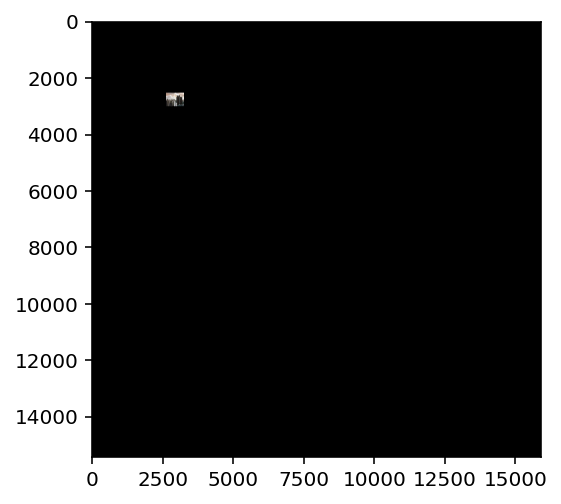

In [123]:
img1 = cv2.imread('im01.jpg')
img2 = cv2.imread('im02.jpg')
superH = ransac()
computeHomographyAndConcat1(img1, img2, superH)